In [1]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client
import traceback

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
{'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI', 'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
{'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN', 'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
{'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4', 'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
{'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr', 'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
{'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY', 'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
{'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B', 'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
{'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh', 'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
{'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7', 'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
{'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF', 'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
{'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g', 'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
{'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q', 'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
{'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS', 'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
{'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9', 'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [4]:
coin_list = []
full_coin_list = []
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    full_coin_list.append(s['symbol'])
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [5]:
new_coin_list = []
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>10 or float(vol['priceChangePercent'])<-10:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['XTZUSDT', 'ATOMUSDT']


In [14]:
_LIMIT_ = 1000
_SYMBOL_ = 'DOGEUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close,close_max,close_min = [],[],[]
_MINETS_ = 60
_INTERVAL_ = "30m"
for i in range(1, 37):
    print(round(i/37*100,2),'%',TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*i)), TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*(i-1))))

    _klines_ = bot.futuresKlines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
    )
    _klines_ = klines_parsing(_klines_)
    for i in _klines_:
        close_max.append(i['High'])
        close_min.append(i['Low'])
print(close_max, close_min)

2.7 % 2023-03-15 18:18:16 2023-03-15 19:18:16
5.41 % 2023-03-15 17:18:16 2023-03-15 18:18:16
8.11 % 2023-03-15 16:18:16 2023-03-15 17:18:16
10.81 % 2023-03-15 15:18:16 2023-03-15 16:18:16
13.51 % 2023-03-15 14:18:16 2023-03-15 15:18:16
16.22 % 2023-03-15 13:18:16 2023-03-15 14:18:16
18.92 % 2023-03-15 12:18:16 2023-03-15 13:18:16
21.62 % 2023-03-15 11:18:16 2023-03-15 12:18:16
24.32 % 2023-03-15 10:18:16 2023-03-15 11:18:16
27.03 % 2023-03-15 09:18:16 2023-03-15 10:18:16
29.73 % 2023-03-15 08:18:16 2023-03-15 09:18:16
32.43 % 2023-03-15 07:18:16 2023-03-15 08:18:16
35.14 % 2023-03-15 06:18:16 2023-03-15 07:18:16
37.84 % 2023-03-15 05:18:16 2023-03-15 06:18:16
40.54 % 2023-03-15 04:18:16 2023-03-15 05:18:16
43.24 % 2023-03-15 03:18:16 2023-03-15 04:18:16
45.95 % 2023-03-15 02:18:16 2023-03-15 03:18:16
48.65 % 2023-03-15 01:18:16 2023-03-15 02:18:16
51.35 % 2023-03-15 00:18:16 2023-03-15 01:18:16
54.05 % 2023-03-14 23:18:16 2023-03-15 00:18:16
56.76 % 2023-03-14 22:18:16 2023-03-14 23:18

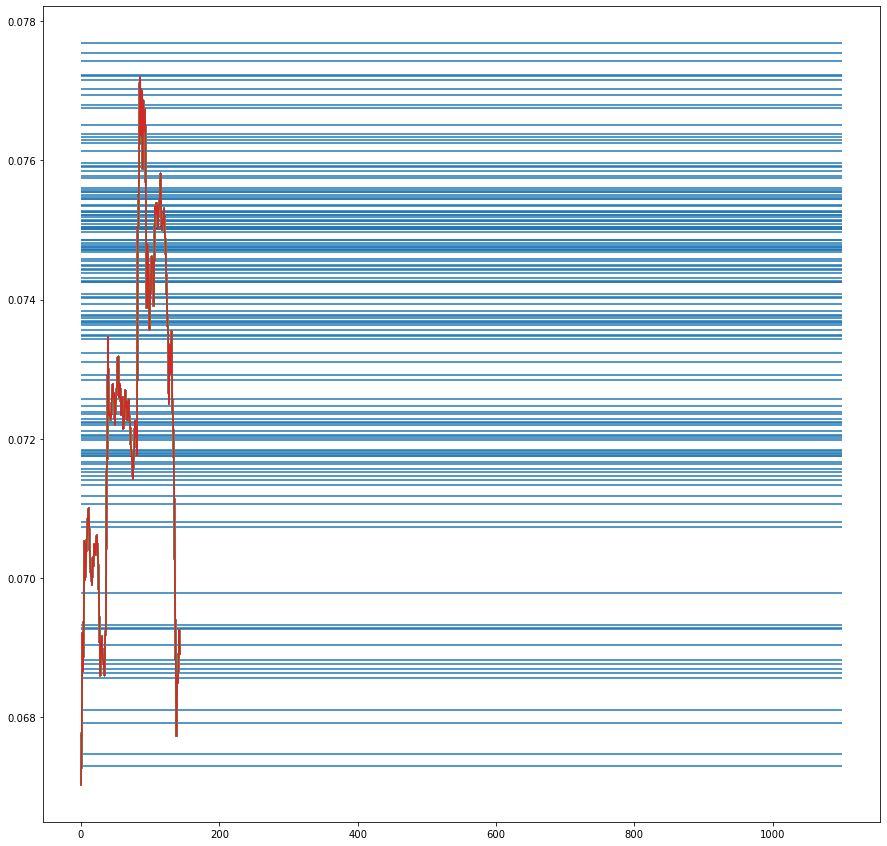

In [15]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [16]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
print(close_max_min)

[0.06928, 0.06927, 0.06876, 0.06882, 0.06932, 0.06869, 0.07118, 0.06978, 0.07239, 0.07211, 0.07376, 0.07311, 0.07427, 0.07404, 0.07348, 0.07356, 0.07402, 0.07367, 0.07472, 0.07431, 0.07515, 0.07501, 0.07544, 0.07544, 0.07528, 0.07535, 0.07585, 0.07526, 0.07554, 0.07596, 0.07536, 0.07545, 0.07551, 0.0756, 0.07577, 0.07558, 0.07475, 0.07545, 0.07497, 0.07485, 0.07468, 0.07476, 0.07426, 0.07455, 0.07471, 0.07444, 0.07504, 0.07513, 0.07675, 0.07596, 0.07694, 0.07694, 0.07702, 0.07715, 0.07721, 0.07722, 0.07755, 0.07743, 0.07651, 0.07768, 0.07535, 0.07625, 0.07229, 0.07229, 0.07229, 0.07236, 0.07178, 0.07201, 0.07204, 0.07175, 0.07223, 0.07199, 0.06857, 0.06863, 0.06792, 0.06792, 0.0673, 0.06747, 0.06904, 0.06811, 0.0708, 0.07073, 0.07247, 0.07224, 0.07182, 0.07291, 0.07206, 0.07257, 0.07343, 0.0722, 0.07393, 0.07363, 0.07479, 0.07448, 0.07504, 0.07501, 0.07471, 0.07482, 0.07513, 0.07471, 0.07518, 0.07547, 0.07486, 0.07509, 0.07526, 0.07502, 0.07522, 0.07503, 0.07369, 0.07459, 0.07449, 0.07

In [17]:
df = pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный', 'Заработали с сделки'])
df

Empty DataFrame
Columns: [Монета, Тип операции, bids or asks, Цена входа, Время входа, Цена выхода, Время выхода, Правильный Неправильный, Заработали с сделки]
Index: []

In [18]:
def nearest_value(items, fuchers_last_price, type_found):
    max_list = []
    min_list = []
    for item in items:
        # для поиска цены больше текущей
        if type_found == 'больше':
            if item > fuchers_last_price:
                max_list.append(item)
        # для поиска цены меньше текущей
        if type_found == 'меньше':
            if item < fuchers_last_price:
                min_list.append(item)       
    if type_found == 'меньше':
        return max(min_list)
    if type_found == 'больше':
        return min(max_list)

def end_zeros(n):
    d = str(n)
    count = 0
    for i in d[len(d):0:-1]:
        if i == '0':
            count += 1
        else:
            break
    return count

def glass_parser(glass, number):
    for en1, i in enumerate(glass):
        if str(number) in i:
            break
    return en1, i

def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where]==value:
            return(index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

def open_value_monitor(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, types, parts_left, new_glass):
    global earn_for_cycle
    global is_cycle_break
    new_glass_count = float(glass_parser(new_glass, start_futures)[1][1])
    if start_futures == fuchers_last_price and new_glass_count<old_glass_count:
        if types == 1:
            earn_for_cycle = profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)
            is_cycle_break = True
        elif types == 2:
            earn_for_cycle = profit_calculate_for_cycle(start_futures, end, lots_part*parts_left, taker, maker)
            is_cycle_break = True

def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit

def profit_calculate_for_cycle(reduced, deductible, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)+start_sum
    return start_sum

def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit, change_for_new_stop_loss):#Пробой asks и отcкок bids
    global earn_for_cycle    
    global is_cycle_break   
    true_answeres_after = []
    is_cycle_break = False    
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker+taker
    part_of_take_profit = lots/parts
    parts_left = parts
    gap_take = (take_profit-commission_costs)/parts
    lots_part = lots/parts 
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
#     spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
#     start_spot = spot_last_price
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start_futures)
    print('Время  открытия сделки', TimeNow())
#     ans_after = [commission_costs<x<fuchers_last_price*(1+take_profit) for x in asks]
#     for i in range(len(ans_after)):
#         if ans_after[i]:
#             true_answeres_after.append(ans_after[i])
#     if len(true_answeres_after)>0: 
#         nearest_value_after = min(true_answeres_after, key=lambda x:abs(x-float(fuchers_last_price)))
#         while True:    
#             fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
#             spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])           
#             if fuchers_last_price >= nearest_value_after - tick_size*gap:
#                 end = fuchers_last_price
#                 end_time = TimeNow()                
#                 earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part*parts_left, taker, maker)
#                 if earn_for_cycle >= 0:
#                     right_answer += 1
#                     print('Закрылись в плюс', f'sell {type_operation}', end)
#                 else:
#                     false_answer+=1
#                     print('Закрылись в минус', f'sell {type_operation}', end)
#                 print('Время  закрытия сделки', TimeNow())
#                 df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
#                 break                    
            
#             elif fuchers_last_price<start_futures*(1-stop_loss):
#                 end = fuchers_last_price
#                 end_time = TimeNow()                
#                 earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part*parts_left, taker, maker)                
#                 false_answer+=1
#                 print('Закрылись в минус', f'sell {type_operation}', end)
#                 print('Время  закрытия сделки', TimeNow())
#                 df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
#                 break      
#     else:
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])

#         if fuchers_last_price > start_futures*(1+commission_costs + gap_take):
#             stop_loss = 0
        
        if fuchers_last_price >= start_futures*(1+take_profit*change_for_new_stop_loss):
            stop_loss = -commission_costs
        
        if fuchers_last_price<start_futures*(1-stop_loss) and start_futures > fuchers_last_price:
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part*parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print('Закрылись в плюс', f'sell {type_operation}', end)
            else:
                false_answer+=1
                print('Закрылись в минус', f'sell {type_operation}', end)
            print('Время  закрытия сделки', TimeNow())
            df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
            break           
            
        if fuchers_last_price > start_futures*(1+(commission_costs+gap_take*number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print('Закрылись в плюс', f'sell {type_operation}', end)
            else:
                false_answer+=1
                print('Закрылись в минус', f'sell {type_operation}', end)
            print('Время  закрытия сделки', TimeNow())
            df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, True, earn_for_cycle]
            break
#             if for_timer == 0:
#                 end = fuchers_last_price
#                 timer = Timer(3.0, open_value_monitor, args=(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, 1, parts_left, new_glass,), kwargs=None)
#                 timer.start()
#                 for_timer += 1

#             if is_cycle_break:
#                 print('За цикл заработали/потеряли', earn_for_cycle)
#                 profit += earn_for_cycle
#                 start_sum += earn_for_cycle
#                 return profit, start_sum, right_answer, false_answer
#                 break        
    print('За цикл заработали/потеряли', earn_for_cycle)
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer

def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit, change_for_new_stop_loss): #Пробой bids и отcкок asks
    global earn_for_cycle    
    global is_cycle_break   
    true_answeres_after = []
    is_cycle_break = False    
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker+taker
    part_of_take_profit = lots/parts
    parts_left = parts
    gap_take = (take_profit-commission_costs)/parts
    lots_part = lots/parts 
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
#     spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
#     start_spot = spot_last_price
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start_futures)
    print('Время  открытия сделки', TimeNow())
#     ans_after = [commission_costs<x<fuchers_last_price*(1-take_profit) for x in bids]
#     for i in range(len(ans_after)):
#         if ans_after[i]:
#             true_answeres_after.append(ans_after[i])
#     if len(true_answeres_after)>0: 
#         nearest_value_after = min(true_answeres_after, key=lambda x:abs(x-float(fuchers_last_price)))
#         while True:
#             fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
#             spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])           
#             if fuchers_last_price <= nearest_value_after + tick_size*gap:
#                 end = fuchers_last_price
#                 end_time = TimeNow()                
#                 earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)
#                 if earn_for_cycle >= 0:
#                     right_answer += 1
#                     print('Закрылись в плюс', f'sell {type_operation}', end)
#                 else:
#                     false_answer+=1
#                     print('Закрылись в минус', f'sell {type_operation}', end)
#                 print('Время  закрытия сделки', TimeNow())
#                 df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
#                 break                    
            
#             elif fuchers_last_price>start_futures*(1+stop_loss):
#                 end = fuchers_last_price
#                 end_time = TimeNow()                
#                 earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)                
#                 false_answer+=1
#                 print('Закрылись в минус', f'sell {type_operation}', end)
#                 print('Время  закрытия сделки', TimeNow())
#                 df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
#                 break                 
#     else:    
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
        
#         if fuchers_last_price < start_futures*(1+commission_costs+gap_take):
#             stop_loss = 0
        
        if fuchers_last_price >= start_futures*(1+take_profit*change_for_new_stop_loss):
            stop_loss = -commission_costs
        
        if fuchers_last_price < start_futures*(1-(commission_costs+gap_take*number_take)):
            end=fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)

        if fuchers_last_price>start_futures*(1+stop_loss) and start_futures < fuchers_last_price:
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part*parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print('Закрылись в плюс', f'sell {type_operation}', end)
            else:
                false_answer+=1
                print('Закрылись в минус', f'sell {type_operation}', end)
            print('Время  закрытия сделки', TimeNow())
            df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
            break

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print('Закрылись в плюс', f'sell {type_operation}', end)
            else:
                false_answer+=1
                print('Закрылись в минус', f'sell {type_operation}', end)
            print('Время  закрытия сделки', TimeNow())
            df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, True, earn_for_cycle]
            break 

#         if for_timer == 0:
#             end = fuchers_last_price
#             timer = Timer(3.0, open_value_monitor, args=(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, 2, parts_left, new_glass,), kwargs=None)
#             timer.start()
#             for_timer += 1

#         if is_cycle_break:
#             print('За цикл заработали/потеряли', earn_for_cycle)
#             profit += earn_for_cycle
#             start_sum += earn_for_cycle
#             return profit, start_sum, right_answer, false_answer                
#             break
    print('За цикл заработали/потеряли', earn_for_cycle)
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer


In [20]:
iteration = 0
profit = 0
start_sum = 20
#lots=10
how_more_mean_vol_for_rebound = 7 # Можно потом поменять на 6.5 или 7
# how_more_mean_vol_for_breakdown = 8
number_in_info = find_list(_SYMBOL_, full_coin_list)[0] #
gap = 10
gap_2 = 7
gap_for_min_max = 3
change_for_new_stop_loss = 0.5
parts = 7
stop_loss = 0.002 # 0.0015
take_profit = 0.005
right_answer = 0
false_answer = 0
bot_number = 0
maker = 0.000162
taker = 0.000324
close_max_copy = close_max.copy()
close_min_copy = close_min.copy()
max_min = close_max_copy + close_min_copy
BOT_LIST = client_create(_API_LIST_)
before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close'] 

while True:
    try:
        bids = []
        asks = []
        zero_list = []
#         new_close_max = []
#         new_close_min = []
#         true_answeres_before = []
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
#         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        tick_size = float(BOT_LIST[bot_number].futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
        bids_asks_list_vol = []
        close_max_min_list_vol = []
        new_glass = glass['bids'] + glass['asks']
        
        for i in new_glass:
            if end_zeros(i[0]) >=2:
                zero_list.append(float(i[0]))        
        
        for j in glass['bids']:
            bids_asks_list_vol.append(j[1])
#             close_max_min_list_vol.append(j[1])
        for z in glass['asks']:
            bids_asks_list_vol.append(z[1])
#             close_max_min_list_vol.append(z[1])
            
        bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)
        mean_for_rebound = np.mean(bids_asks_list_vol)*how_more_mean_vol_for_rebound 
        
        for u in glass['bids']:
            if float(u[1])>=mean_for_rebound:# and float(u[1])<mean_for_breakdown:
                bids.append(u[0])
#             elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_max_copy:
#                 new_close_max.append(float(u[0]))
        for f in glass['asks']:
            if float(f[1])>=mean_for_rebound:# and float(f[1])<mean_for_breakdown:
                asks.append(f[0])
#             elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_min_copy:
#                 new_close_min.append(float(u[0]))         
        
        if int(TimeNow()[17:19]) >= 20 and int(TimeNow()[17:19]) <= 25:
            before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']        
        
        if (TimeNow()[14:16] == '30' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10) or (TimeNow()[14:16] == '00' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10):
            print('Обновляем min и max')
            for i in range(1, 37):
                print(round(i/37*100,2),'%',TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*i)), TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*(i-1))))
                _klines_ = bot.futuresKlines(
                            symbol=_SYMBOL_,
                            limit=_MINETS_,
                            interval=_INTERVAL_,
                            startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                            endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
                )
                _klines_ = klines_parsing(_klines_)
                for i in _klines_:
                    close_max.append(i['High'])
                    close_min.append(i['Low'])
            close_max_min = close_max+close_min
            counter_max_min = Counter(close_max_min)
            close_max_copy = close_max.copy()
            close_min_copy = close_min.copy() 
            max_min = close_max_copy + close_min_copy
        
        iteration+=1
        if bot_number == 12:
            bot_number = 0
        bot_number += 1
               
#         close_max_min_list_vol = np.array(close_max_min_list_vol).astype(np.float)
#         mean_for_breakdown = np.mean(close_max_min_list_vol)*how_more_mean_vol_for_breakdown           

        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_close_max = nearest_value(max_min, fuchers_last_price, 'больше')
        nearest_close_min = nearest_value(max_min, fuchers_last_price, 'меньше')
#         nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(fuchers_last_price)))
#         nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(fuchers_last_price)))    
#         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        
        if nearest_close_max < nearest_close_min:
            auxiliary_variable_for_nearest_close_min = nearest_close_min
            nearest_close_min = nearest_close_max
            nearest_close_max = auxiliary_variable_for_nearest_close_min

        if fuchers_last_price == nearest_close_max + tick_size * gap_for_min_max and nearest_close_max in asks:# and before_price < fuchers_last_price:# or (fuchers_last_price in zero_list and fuchers_last_price in asks and before_price < fuchers_last_price):
            old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
            time.sleep(0.5)
            if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit, change_for_new_stop_loss)
            list(asks).clear()
            list(bids).clear()

#         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_close_min - tick_size * gap_for_min_max and nearest_close_min in bids:# and before_price >fuchers_last_price:# or (fuchers_last_price in zero_list and fuchers_last_price in bids and before_price > fuchers_last_price):
            old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
            time.sleep(0.5)
            if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit, change_for_new_stop_loss)
            list(asks).clear()
            list(bids).clear()
                
#         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price <= nearest_bids + tick_size*gap and fuchers_last_price >= nearest_bids + tick_size*gap_2 and before_price>nearest_bids + tick_size*gap and nearest_bids not in close_max_copy and nearest_bids not in close_min_copy:# and nearest_bids not in zero_list:
#             ans_before = [fuchers_last_price<x<fuchers_last_price*(1+(maker+taker)) for x in asks]
#             for i in range(len(ans_before)):
#                 if ans_before[i]:
#                     true_answeres_before.append(ans_before[i]) 
#             if len(true_answeres_before)==0:                      
            old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
            profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit, change_for_new_stop_loss) 
            list(asks).clear()
            list(bids).clear()

#         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price >= nearest_asks - tick_size*gap and fuchers_last_price <= nearest_asks - tick_size*gap_2 and before_price<nearest_asks - tick_size*gap and nearest_asks not in close_max_copy and nearest_asks not in close_min_copy:# and nearest_asks not in zero_list:
#             ans_before = [fuchers_last_price*(1-(maker+taker))<x<fuchers_last_price for x in bids]
#             for i in range(len(ans_before)):
#                 if ans_before[i]:
#                     true_answeres_before.append(ans_before[i]) 
#             if len(true_answeres_before)==0:            
            old_glass_count= float(glass_parser(new_glass, fuchers_last_price)[1][1]) #float(find_list(str(fuchers_last_price), glass['bids'])[1][1])
            profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit, change_for_new_stop_loss)
            list(asks).clear()
            list(bids).clear()

        if iteration % 5 == 0:
            list(bids).clear()
            list(asks).clear()
#             list(new_close_max).clear()
#             list(new_close_min).clear()
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        print('Время', TimeNow())
        print('Текущая цена', fuchers_last_price)
        print('Ближайший уровень сопротивления', nearest_close_max)
        print('Ближайший уровень поддержки', nearest_close_min)
        print('Торгуемый объем для отскока', mean_for_rebound)
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        print('#########################################')
    except Exception as err:
        print(traceback.format_exc())

Время 2023-03-15 22:21:42
Текущая цена 0.0689
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2071799.884
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.27576197387515
#########################################
Время 2023-03-15 22:21:45
Текущая цена 0.06886
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2069681.9499999997
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.4443799012489
#########################################
Время 2023-03-15 22:21:48
Текущая цена 0.06886
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2067366.994
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.4443799012489
#########################################
Время 2023-03-1

Время 2023-03-15 22:22:59
Текущая цена 0.06882
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2066934.9540000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.65542799011774
#########################################
Время 2023-03-15 22:23:02
Текущая цена 0.06881
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2067231.565
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.65542799011774
#########################################
Время 2023-03-15 22:23:05
Текущая цена 0.06884
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2067716.434
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.5287623474724
#########################################
Время 2023-03

Время 2023-03-15 22:24:10
Текущая цена 0.06891
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2048594.926
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.2336380786533
#########################################
Время 2023-03-15 22:24:14
Текущая цена 0.06896
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1988460.019
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.02320185614855
#########################################
Время 2023-03-15 22:24:18
Текущая цена 0.06896
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2063081.2650000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.02320185614855
#########################################
Время 2023-03

Время 2023-03-15 22:25:28
Текущая цена 0.06901
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1968144.4440000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.81307056948265
#########################################
Время 2023-03-15 22:25:30
Текущая цена 0.06898
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2049352.2140000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.93911278631487
#########################################
Время 2023-03-15 22:25:33
Текущая цена 0.069
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2053491.3699999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.85507246376807
#########################################


Время 2023-03-15 22:29:46
Текущая цена 0.06922
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1979153.029
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.93383415197917
#########################################
Время 2023-03-15 22:29:49
Текущая цена 0.06922
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1976264.458
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.93383415197917
#########################################
Время 2023-03-15 22:29:52
Текущая цена 0.06921
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1971075.5329999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.93383415197917
#########################################
Время 2023-0

Время 2023-03-15 22:30:57
Текущая цена 0.06922
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1973515.8450000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.93383415197917
#########################################
Время 2023-03-15 22:30:59
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1971686.5559999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.10089621277825
#########################################
Время 2023-03-15 22:31:02
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1964977.5950000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.05911258852433
########################################

Время 2023-03-15 22:32:09
Текущая цена 0.06917
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1955962.477
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.14269191846176
#########################################
Время 2023-03-15 22:32:12
Текущая цена 0.06916
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1950730.0329999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.1844997108155
#########################################
Время 2023-03-15 22:32:15
Текущая цена 0.06921
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1953316.75
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.97558156335793
#########################################
Время 2023-03-

Время 2023-03-15 22:33:27
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1977986.626
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.85037550548816
#########################################
Время 2023-03-15 22:33:30
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1981824.8379999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.7669650591972
#########################################
Время 2023-03-15 22:33:33
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1986044.256
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.80866425992775
#########################################
Время 2023-03

Время 2023-03-15 22:34:42
Текущая цена 0.06923
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1985261.257
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 288.8920988010978
#########################################
Время 2023-03-15 22:34:45
Текущая цена 0.06921
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1983363.5779999997
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.01734104046244
#########################################
Время 2023-03-15 22:34:48
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1984352.7059999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.05911258852433
#########################################
Время 

Время 2023-03-15 22:35:57
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1989594.439
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.10089621277825
#########################################
Время 2023-03-15 22:36:01
Текущая цена 0.06914
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1994944.616
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.1844997108155
#########################################
Время 2023-03-15 22:36:04
Текущая цена 0.06913
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1980211.5340000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.30999566035007
#########################################
Время 2023-03

Время 2023-03-15 22:37:13
Текущая цена 0.06908
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1975478.323
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.51939779965255
#########################################
Время 2023-03-15 22:37:16
Текущая цена 0.06901
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1965316.234
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.6451846488052
#########################################
Время 2023-03-15 22:37:19
Текущая цена 0.06898
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1958669.881
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 289.85507246376807
#########################################
Время 2023-03-15 22:

Время 2023-03-15 22:38:28
Текущая цена 0.06889
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2069731.692
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.31789809841774
#########################################
Время 2023-03-15 22:38:31
Текущая цена 0.06888
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2077937.0920000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.36004645760744
#########################################
Время 2023-03-15 22:38:34
Текущая цена 0.0689
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2069125.016
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.27576197387515
#########################################
Время 2023-03

Время 2023-03-15 22:39:40
Текущая цена 0.06892
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2063849.823
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.1915264074289
#########################################
Время 2023-03-15 22:39:44
Текущая цена 0.06888
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2087376.3960000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.31789809841774
#########################################
Время 2023-03-15 22:39:47
Текущая цена 0.06888
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2098184.9280000003
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.40220705677365
#########################################
Время 

Время 2023-03-15 22:40:59
Текущая цена 0.06874
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 2093424.0879999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.9514111143439
#########################################
Время 2023-03-15 22:41:02
Текущая цена 0.06873
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 2093888.0410000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 290.9937436345119
#########################################
Время 2023-03-15 22:41:04
Текущая цена 0.06871
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 2095176.3000000003
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.0784456411003
#########################################
В

Время 2023-03-15 22:42:11
Текущая цена 0.06859
Ближайший уровень сопротивления 0.06863
Ближайший уровень поддержки 0.06857
Торгуемый объем для отскока 2080039.1500000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.5451895043732
#########################################
Время 2023-03-15 22:42:14
Текущая цена 0.06854
Ближайший уровень сопротивления 0.06863
Ближайший уровень поддержки 0.06857
Торгуемый объем для отскока 2031895.2149999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.8004085205719
#########################################
Время 2023-03-15 22:42:16
Текущая цена 0.06851
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2064563.137
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.9281856663261
#########################################
Время 20

Время 2023-03-15 22:43:31
Текущая цена 0.06848
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2081752.022
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 292.05607476635515
#########################################
Время 2023-03-15 22:43:34
Текущая цена 0.0685
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2086437.1010000003
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.970802919708
#########################################
Время 2023-03-15 22:43:37
Текущая цена 0.06849
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2091755.176
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 292.01343261790043
#########################################
Время 2023-03-1

Время 2023-03-15 22:44:51
Текущая цена 0.06852
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2096820.5440000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.75784099197665
#########################################
Время 2023-03-15 22:44:53
Текущая цена 0.06852
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2086891.856
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.8855808523059
#########################################
Время 2023-03-15 22:44:56
Текущая цена 0.06853
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2086592.7110000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 291.84298847220197
#########################################
Время 

Время 2023-03-15 22:52:03
Текущая цена 0.06838
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2076626.7970000003
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 292.35933406480166
#########################################
Время 2023-03-15 22:52:07
Текущая цена 0.06841
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2079994.07
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 292.2311250307139
#########################################
Время 2023-03-15 22:52:10
Текущая цена 0.06841
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2084416.313
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.9915312

Время 2023-03-15 22:53:13
Текущая цена 0.06847
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2092122.816
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 291.9750440098019
#########################################
Время 2023-03-15 22:53:15
Текущая цена 0.06846
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2090829.132
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 292.01769300834263
#########################################
Время 2023-03-15 22:53:20
Текущая цена 0.06847
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2090990.3699999999
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531

Время 2023-03-15 22:54:38
Текущая цена 0.06853
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2110018.0429999996
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 291.71941140159254
#########################################
Время 2023-03-15 22:54:45
Текущая цена 0.06857
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2079355.4529999997
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 291.5492381996665
#########################################
Время 2023-03-15 22:54:50
Текущая цена 0.06856
Ближайший уровень сопротивления 0.06857
Ближайший уровень поддержки 0.06811
Торгуемый объем для отскока 2106706.567
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19

Время 2023-03-15 22:56:11
Текущая цена 0.06864
Ближайший уровень сопротивления 0.06869
Ближайший уровень поддержки 0.06863
Торгуемый объем для отскока 2101778.546
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 291.25191234485914
#########################################
Время 2023-03-15 22:56:14
Текущая цена 0.06866
Ближайший уровень сопротивления 0.06869
Ближайший уровень поддержки 0.06863
Торгуемый объем для отскока 2101733.158
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 291.1246725404272
#########################################
Время 2023-03-15 22:56:17
Текущая цена 0.06869
Ближайший уровень сопротивления 0.06869
Ближайший уровень поддержки 0.06863
Торгуемый объем для отскока 2111070.2970000003
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531

Время 2023-03-15 22:57:35
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2099675.963
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 290.5745823161502
#########################################
Время 2023-03-15 22:57:39
Текущая цена 0.06881
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2103388.6229999997
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263351135 Кол-во торгуемых лотов: 290.5323537763572
#########################################
Время 2023-03-15 22:57:42
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2104783.198
Заработали: -0.008468736648864059
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.991531263

Время 2023-03-15 23:00:42
Текущая цена 0.06886
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2064854.3930000002
Заработали: -0.058892227393414605
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 19.941107772606586 Кол-во торгуемых лотов: 289.5891340779347
#########################################
Время 2023-03-15 23:00:45
Текущая цена 0.06887
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2068930.374
Заработали: -0.058892227393414605
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 19.941107772606586 Кол-во торгуемых лотов: 289.54708541609676
#########################################
Время 2023-03-15 23:00:48
Текущая цена 0.06887
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2066012.886
Заработали: -0.058892227393414605
Правильных ответов: 0 Неправильных ответов: 2
Конечеая сумма: 19.941107

Время 2023-03-15 23:35:34
Текущая цена 0.06914
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1985333.1609999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.87932216726085
#########################################
Время 2023-03-15 23:35:37
Текущая цена 0.06912
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1990172.9049999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.9211100049821
#########################################
Время 2023-03-15 23:35:39
Текущая цена 0.06913
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1989656.487
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97

Время 2023-03-15 23:36:41
Текущая цена 0.06917
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1956103.3800000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.7540311499843
#########################################
Время 2023-03-15 23:36:44
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1954363.5860000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.712291625389
#########################################
Время 2023-03-15 23:36:46
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1959037.5839999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 

Время 2023-03-15 23:37:48
Текущая цена 0.06928
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1931184.3599999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.29555910283506
#########################################
Время 2023-03-15 23:37:52
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1935414.0470000003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.4621076638419
#########################################
Время 2023-03-15 23:37:56
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1946263.004
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97

Время 2023-03-15 23:39:01
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1949250.7859999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.12920275020787
#########################################
Время 2023-03-15 23:39:04
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1965701.92
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.087643655624
#########################################
Время 2023-03-15 23:39:07
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1967803.2989999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-15 23:50:39
Текущая цена 0.06923
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1953736.449
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.5037748756957
#########################################
Время 2023-03-15 23:50:42
Текущая цена 0.06923
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1949288.6630000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.5037748756957
#########################################
Время 2023-03-15 23:50:45
Текущая цена 0.06922
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1965096.0489999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-15 23:52:48
Текущая цена 0.06916
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1987989.0310000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.79578274500307
#########################################
Время 2023-03-15 23:52:51
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1981991.8930000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.712291625389
#########################################
Время 2023-03-15 23:52:54
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1982779.19
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-15 23:53:54
Текущая цена 0.06916
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1982739.927
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.79578274500307
#########################################
Время 2023-03-15 23:53:57
Текущая цена 0.06914
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1986234.824
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.87932216726085
#########################################
Время 2023-03-15 23:54:00
Текущая цена 0.06914
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1984783.2550000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-15 23:55:10
Текущая цена 0.06915
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1985419.639
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.87932216726085
#########################################
Время 2023-03-15 23:55:12
Текущая цена 0.06915
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1988024.129
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.837546415682
#########################################
Время 2023-03-15 23:55:16
Текущая цена 0.06915
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1991672.5779999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731163346

Время 2023-03-15 23:56:16
Текущая цена 0.06909
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1971237.9610000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 289.0883823222523
#########################################
Время 2023-03-15 23:56:18
Текущая цена 0.06908
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1975768.69
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 289.1302306694327
#########################################
Время 2023-03-15 23:56:21
Текущая цена 0.06908
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1963491.5299999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-15 23:57:25
Текущая цена 0.06911
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1975802.6750000003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 289.0047219598381
#########################################
Время 2023-03-15 23:57:27
Текущая цена 0.0691
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1980389.817
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 289.0465460874734
#########################################
Время 2023-03-15 23:57:30
Текущая цена 0.06909
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1984676.6519999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-15 23:58:32
Текущая цена 0.06908
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1973016.864
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 289.1302306694327
#########################################
Время 2023-03-15 23:58:35
Текущая цена 0.06908
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1974557.7040000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 289.1302306694327
#########################################
Время 2023-03-15 23:58:38
Текущая цена 0.06907
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1988641.7249999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-15 23:59:40
Текущая цена 0.06913
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1951765.2070000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.9211100049821
#########################################
Время 2023-03-15 23:59:44
Текущая цена 0.06912
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1952966.3930000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.9629099340916
#########################################
Время 2023-03-15 23:59:47
Текущая цена 0.06913
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1962110.9689999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма:

Время 2023-03-16 00:00:59
Текущая цена 0.0692
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1967778.8059999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.62884876653777
#########################################
Время 2023-03-16 00:01:02
Текущая цена 0.0692
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1970983.7769999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.62884876653777
#########################################
Время 2023-03-16 00:01:05
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1966961.052
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-16 00:12:26
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1888413.996
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.3788093364772
#########################################
Время 2023-03-16 00:12:29
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1887632.9849999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.3788093364772
#########################################
Время 2023-03-16 00:12:32
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1884371.3000000003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-16 00:13:36
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1880909.562
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.33717821054444
#########################################
Время 2023-03-16 00:13:39
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1873461.1069999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.33717821054444
#########################################
Время 2023-03-16 00:13:41
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1875087.389
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 00:14:41
Текущая цена 0.06928
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1872285.6460000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.29555910283506
#########################################
Время 2023-03-16 00:14:43
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1873591.167
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.29555910283506
#########################################
Время 2023-03-16 00:14:46
Текущая цена 0.06928
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1879791.529
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 00:15:44
Текущая цена 0.06928
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1874377.512
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.29555910283506
#########################################
Время 2023-03-16 00:15:46
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1884112.93
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.25395200814563
#########################################
Время 2023-03-16 00:15:49
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1871870.3569999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 00:16:50
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1872691.5269999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.25395200814563
#########################################
Время 2023-03-16 00:16:55
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1879696.378
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.25395200814563
#########################################
Время 2023-03-16 00:16:58
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1882489.063
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 00:18:02
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1872899.441
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:18:05
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1870515.927
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:18:08
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1860431.426
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 К

Время 2023-03-16 00:19:10
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1871203.7189999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7970653406976
#########################################
Время 2023-03-16 00:19:14
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1870959.993
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7556019974703
#########################################
Время 2023-03-16 00:19:18
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1867450.613
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644

Время 2023-03-16 00:20:16
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1870051.8480000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.71415059989073
#########################################
Время 2023-03-16 00:20:19
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1865718.9109999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.71415059989073
#########################################
Время 2023-03-16 00:20:22
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1870347.0310000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумм

Время 2023-03-16 00:21:21
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1871024.6519999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.92152709592636
#########################################
Время 2023-03-16 00:21:25
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1859086.698
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.92152709592636
#########################################
Время 2023-03-16 00:21:29
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1855297.57
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 00:22:30
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1886059.6649999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.2123569212758
#########################################
Время 2023-03-16 00:22:33
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1882910.5749999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.25395200814563
#########################################
Время 2023-03-16 00:22:35
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1874054.623
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-16 00:23:34
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1868073.9700000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.25395200814563
#########################################
Время 2023-03-16 00:23:37
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1864502.052
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.2123569212758
#########################################
Время 2023-03-16 00:23:40
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1871299.738
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633464

Время 2023-03-16 00:24:41
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1855291.935
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.12920275020787
#########################################
Время 2023-03-16 00:24:43
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1855931.133
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 00:24:46
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1896025.502
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413

Время 2023-03-16 00:25:46
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06928
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1858229.373
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.25395200814563
#########################################
Время 2023-03-16 00:25:48
Текущая цена 0.06928
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1888959.429
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.29555910283506
#########################################
Время 2023-03-16 00:25:51
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1881692.624
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413

Время 2023-03-16 00:26:51
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1891762.67
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.17077383702804
#########################################
Время 2023-03-16 00:26:56
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1854012.993
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.33717821054444
#########################################
Время 2023-03-16 00:26:59
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1846575.003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 

Время 2023-03-16 00:28:00
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1866626.923
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.3788093364772
#########################################
Время 2023-03-16 00:28:03
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1866642.7010000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.33717821054444
#########################################
Время 2023-03-16 00:28:06
Текущая цена 0.06929
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1863998.864
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 00:29:07
Текущая цена 0.06922
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1863798.93
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.54545412661673
#########################################
Время 2023-03-16 00:29:10
Текущая цена 0.06923
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1861040.6430000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.5037748756957
#########################################
Время 2023-03-16 00:29:13
Текущая цена 0.06921
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1862973.9730000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

54.05 % 2023-03-14 23:18:16 2023-03-15 00:18:16
56.76 % 2023-03-14 22:18:16 2023-03-14 23:18:16
59.46 % 2023-03-14 21:18:16 2023-03-14 22:18:16
62.16 % 2023-03-14 20:18:16 2023-03-14 21:18:16
64.86 % 2023-03-14 19:18:16 2023-03-14 20:18:16
67.57 % 2023-03-14 18:18:16 2023-03-14 19:18:16
70.27 % 2023-03-14 17:18:16 2023-03-14 18:18:16
72.97 % 2023-03-14 16:18:16 2023-03-14 17:18:16
75.68 % 2023-03-14 15:18:16 2023-03-14 16:18:16
78.38 % 2023-03-14 14:18:16 2023-03-14 15:18:16
81.08 % 2023-03-14 13:18:16 2023-03-14 14:18:16
83.78 % 2023-03-14 12:18:16 2023-03-14 13:18:16
86.49 % 2023-03-14 11:18:16 2023-03-14 12:18:16
89.19 % 2023-03-14 10:18:16 2023-03-14 11:18:16
91.89 % 2023-03-14 09:18:16 2023-03-14 10:18:16
94.59 % 2023-03-14 08:18:16 2023-03-14 09:18:16
97.3 % 2023-03-14 07:18:16 2023-03-14 08:18:16
Время 2023-03-16 00:30:18
Текущая цена 0.06916
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1855791.4130000002
Заработали: -0.

Время 2023-03-16 00:31:18
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1865629.381
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.79578274500307
#########################################
Время 2023-03-16 00:31:21
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1866041.6460000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.6705641659837
#########################################
Время 2023-03-16 00:31:24
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1867373.9000000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97

Время 2023-03-16 00:32:27
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1860775.2799999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.42045248583986
#########################################
Время 2023-03-16 00:32:30
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1863993.7189999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.42045248583986
#########################################
Время 2023-03-16 00:32:33
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1862535.7100000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумм

Время 2023-03-16 00:33:33
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1863781.1570000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.4621076638419
#########################################
Время 2023-03-16 00:33:35
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1865034.8290000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.4621076638419
#########################################
Время 2023-03-16 00:33:38
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1865421.8379999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма:

Время 2023-03-16 00:34:39
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1864893.24
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.17077383702804
#########################################
Время 2023-03-16 00:34:41
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1861580.9239999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.2123569212758
#########################################
Время 2023-03-16 00:34:44
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1866244.6530000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-16 00:35:43
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1862000.07
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.00456142241404
#########################################
Время 2023-03-16 00:35:46
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1865827.859
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 00:35:48
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1863960.623
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 

Время 2023-03-16 00:36:55
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1867635.077
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 00:36:58
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1866092.683
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 00:37:01
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1878801.141
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413

Время 2023-03-16 00:38:02
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1877248.324
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.96303827342
#########################################
Время 2023-03-16 00:38:06
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1874573.5470000003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.96303827342
#########################################
Время 2023-03-16 00:38:08
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1875152.314
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633464441

Время 2023-03-16 00:39:07
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1868342.427
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.92152709592636
#########################################
Время 2023-03-16 00:39:10
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1872608.199
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.92152709592636
#########################################
Время 2023-03-16 00:39:13
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1872076.0239999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 00:40:13
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1871906.071
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:40:16
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1872622.983
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:40:18
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1865803.499
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 К

Время 2023-03-16 00:41:20
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1870542.856
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.6727111427972
#########################################
Время 2023-03-16 00:41:23
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1852847.5839999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.6727111427972
#########################################
Время 2023-03-16 00:41:27
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1830342.514
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731163346

Время 2023-03-16 00:42:28
Текущая цена 0.06954
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1869796.0050000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.2176637136096
#########################################
Время 2023-03-16 00:42:30
Текущая цена 0.06953
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1862713.8390000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.25897216517205
#########################################
Время 2023-03-16 00:42:33
Текущая цена 0.06953
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1867496.1969999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма

Время 2023-03-16 00:43:33
Текущая цена 0.06952
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1879075.205
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.3002925006389
#########################################
Время 2023-03-16 00:43:36
Текущая цена 0.06952
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1880027.688
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.3002925006389
#########################################
Время 2023-03-16 00:43:38
Текущая цена 0.06952
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1896808.9070000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731163346

Время 2023-03-16 00:44:42
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1901974.27
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.46569278417405
#########################################
Время 2023-03-16 00:44:44
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1899404.2829999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.46569278417405
#########################################
Время 2023-03-16 00:44:47
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1900189.823
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 00:45:52
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1895917.6530000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.6312836210313
#########################################
Время 2023-03-16 00:45:54
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1900763.991
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.6312836210313
#########################################
Время 2023-03-16 00:45:57
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1901883.4659999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-16 00:47:01
Текущая цена 0.06947
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1880396.441
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.5070726161568
#########################################
Время 2023-03-16 00:47:03
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1882397.496
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.46569278417405
#########################################
Время 2023-03-16 00:47:06
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1889860.5950000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 00:48:08
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1889381.438
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.46569278417405
#########################################
Время 2023-03-16 00:48:11
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1879176.0749999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.54846436286226
#########################################
Время 2023-03-16 00:48:14
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1895896.2959999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9

Время 2023-03-16 00:49:16
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1897343.4619999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:49:18
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1893232.929
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7970653406976
#########################################
Время 2023-03-16 00:49:21
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1894877.1099999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-16 00:50:22
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1910807.3390000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.00456142241404
#########################################
Время 2023-03-16 00:50:25
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1912861.426
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.00456142241404
#########################################
Время 2023-03-16 00:50:28
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1912704.8429999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9

Время 2023-03-16 00:51:34
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1870581.846
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.96303827342
#########################################
Время 2023-03-16 00:51:36
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1883734.349
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.96303827342
#########################################
Время 2023-03-16 00:51:39
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904979.9510000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633464441

Время 2023-03-16 00:52:40
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904869.82
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8800278847566
#########################################
Время 2023-03-16 00:52:42
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1912389.185
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8800278847566
#########################################
Время 2023-03-16 00:52:45
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1913121.77
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол

Время 2023-03-16 00:53:49
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1909826.632
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.17077383702804
#########################################
Время 2023-03-16 00:53:52
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1905459.7799999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.17077383702804
#########################################
Время 2023-03-16 00:53:55
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1905496.488
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 00:54:57
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904304.92
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7556019974703
#########################################
Время 2023-03-16 00:55:00
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1907381.448
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.96303827342
#########################################
Время 2023-03-16 00:55:03
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1923373.011
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-

Время 2023-03-16 00:56:06
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1916805.9190000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.92152709592636
#########################################
Время 2023-03-16 00:56:10
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1898438.2829999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:56:13
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1897791.3429999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма:

Время 2023-03-16 00:57:15
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1906709.5950000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.00456142241404
#########################################
Время 2023-03-16 00:57:18
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1913513.266
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.00456142241404
#########################################
Время 2023-03-16 00:57:20
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1909070.366
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 00:58:24
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1915206.8390000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7970653406976
#########################################
Время 2023-03-16 00:58:27
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1919013.614
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 00:58:30
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1915644.248
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633464

Время 2023-03-16 00:59:31
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1916952.1560000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 00:59:33
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1910451.249
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.92152709592636
#########################################
Время 2023-03-16 00:59:37
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1906533.363
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 01:00:43
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1910936.6010000003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8800278847566
#########################################
Время 2023-03-16 01:00:46
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1906764.937
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7556019974703
#########################################
Время 2023-03-16 01:00:49
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1900661.0
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644

Время 2023-03-16 01:01:47
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1917515.565
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.087643655624
#########################################
Время 2023-03-16 01:01:50
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1918719.2850000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.087643655624
#########################################
Время 2023-03-16 01:01:53
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1918276.8569999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311

Время 2023-03-16 01:02:54
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1912918.154
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 01:02:57
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1913119.901
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8800278847566
#########################################
Время 2023-03-16 01:02:59
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1909296.76
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Ко

Время 2023-03-16 01:03:58
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1914629.7029999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.6312836210313
#########################################
Время 2023-03-16 01:04:00
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1913678.144
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.71415059989073
#########################################
Время 2023-03-16 01:04:03
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1919061.501
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334

Время 2023-03-16 01:05:04
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1867480.881
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.9700622793738
#########################################
Время 2023-03-16 01:05:08
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1896771.5760000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.9288368717772
#########################################
Время 2023-03-16 01:05:11
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1903609.5329999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-16 01:06:17
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1908040.0359999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.722887376463
#########################################
Время 2023-03-16 01:06:20
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1902914.9649999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.6405903364583
#########################################
Время 2023-03-16 01:06:23
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1907654.196
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731

Время 2023-03-16 01:07:27
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1907955.1400000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.88762330715906
#########################################
Время 2023-03-16 01:07:29
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904922.9640000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.9288368717772
#########################################
Время 2023-03-16 01:07:32
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1902435.1010000003
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма

Время 2023-03-16 01:08:32
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1913796.626
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.0112995350541
#########################################
Время 2023-03-16 01:08:34
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1897241.073
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.9288368717772
#########################################
Время 2023-03-16 01:08:37
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1908091.01
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Ко

Время 2023-03-16 01:09:38
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1925482.055
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.09380961110264
#########################################
Время 2023-03-16 01:09:41
Текущая цена 0.0696
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1930731.733
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.9288368717772
#########################################
Время 2023-03-16 01:09:44
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1909757.8219999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731163346

Время 2023-03-16 01:10:46
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1933745.6600000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.8052316864505
#########################################
Время 2023-03-16 01:10:49
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1928359.566
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.8464215804167
#########################################
Время 2023-03-16 01:10:52
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1921440.6400000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973

Время 2023-03-16 01:11:52
Текущая цена 0.06965
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1930858.489
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.76405362016385
#########################################
Время 2023-03-16 01:11:55
Текущая цена 0.06965
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1929862.4730000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.76405362016385
#########################################
Время 2023-03-16 01:11:57
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1929813.4659999998
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9

Время 2023-03-16 01:12:54
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1928174.311
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.8464215804167
#########################################
Время 2023-03-16 01:12:57
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1922264.7780000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 286.9288368717772
#########################################
Время 2023-03-16 01:12:59
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1930680.92
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633464

Время 2023-03-16 01:19:04
Текущая цена 0.06945
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1925785.435
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.5898680294372
#########################################
Время 2023-03-16 01:19:07
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1915627.119
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.6312836210313
#########################################
Время 2023-03-16 01:19:09
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1922779.502
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 К

Время 2023-03-16 01:20:11
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1929575.935
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.00456142241404
#########################################
Время 2023-03-16 01:20:14
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1926407.4130000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 01:20:17
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1920225.3350000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9

Время 2023-03-16 01:21:15
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1921159.24
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7970653406976
#########################################
Время 2023-03-16 01:21:18
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1928010.364
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7970653406976
#########################################
Время 2023-03-16 01:21:21
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1922743.7880000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731163346444

Время 2023-03-16 01:22:23
Текущая цена 0.0695
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1932195.251
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.38296884380446
#########################################
Время 2023-03-16 01:22:26
Текущая цена 0.0695
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1941976.309
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.38296884380446
#########################################
Время 2023-03-16 01:22:29
Текущая цена 0.06949
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1940202.859
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 К

Время 2023-03-16 01:23:34
Текущая цена 0.06947
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1940629.3900000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.46569278417405
#########################################
Время 2023-03-16 01:23:37
Текущая цена 0.06947
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1949680.621
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.5070726161568
#########################################
Время 2023-03-16 01:23:40
Текущая цена 0.06947
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946952.2029999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97

Время 2023-03-16 01:24:41
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946677.397
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.54846436286226
#########################################
Время 2023-03-16 01:24:43
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946236.0749999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.54846436286226
#########################################
Время 2023-03-16 01:24:46
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1957974.6969999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9

Время 2023-03-16 01:25:48
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1948390.892
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7556019974703
#########################################
Время 2023-03-16 01:25:50
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1951099.99
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7556019974703
#########################################
Время 2023-03-16 01:25:53
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946506.499
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Ко

Время 2023-03-16 01:26:54
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1945618.381
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8800278847566
#########################################
Время 2023-03-16 01:26:57
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1938444.2349999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7556019974703
#########################################
Время 2023-03-16 01:27:01
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1957287.99
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644

Время 2023-03-16 01:28:04
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1937169.3249999997
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.7970653406976
#########################################
Время 2023-03-16 01:28:06
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946345.3450000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 287.8385406347372
#########################################
Время 2023-03-16 01:28:09
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1934977.7230000002
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 

Время 2023-03-16 01:29:10
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1943469.8290000001
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.04609654808786
#########################################
Время 2023-03-16 01:29:13
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1950843.496
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.087643655624
#########################################
Время 2023-03-16 01:29:15
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1949253.327
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.9731163346

94.59 % 2023-03-14 08:18:16 2023-03-14 09:18:16
97.3 % 2023-03-14 07:18:16 2023-03-14 08:18:16
Время 2023-03-16 01:30:16
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1941431.121
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.33717821054444
#########################################
Время 2023-03-16 01:30:18
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1923451.145
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.42045248583986
#########################################
Время 2023-03-16 01:30:21
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1935944.493
Заработали: -0.026

Время 2023-03-16 01:31:23
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1957041.632
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.12920275020787
#########################################
Время 2023-03-16 01:31:27
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1923423.9849999999
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.973116334644413 Кол-во торгуемых лотов: 288.17077383702804
#########################################
Время 2023-03-16 01:31:31
Текущая цена 0.06931
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1932103.635
Заработали: -0.02688366535558744
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 19.97311633

Время 2023-03-16 01:36:47
Текущая цена 0.06872
Ближайший уровень сопротивления 0.06869
Ближайший уровень поддержки 0.06863
Торгуемый объем для отскока 2012506.426
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.973190462841863 Кол-во торгуемых лотов: 290.64596133355445
#########################################
Время 2023-03-16 01:36:51
Текущая цена 0.06875
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 2014076.7710000002
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.973190462841863 Кол-во торгуемых лотов: 290.51913400497256
#########################################
Время 2023-03-16 01:36:55
Текущая цена 0.06877
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 2008376.8249999997
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.9

Время 2023-03-16 01:37:55
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2041220.1460000002
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.973190462841863 Кол-во торгуемых лотов: 290.30800091339916
#########################################
Время 2023-03-16 01:37:58
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2035631.4160000002
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.973190462841863 Кол-во торгуемых лотов: 290.30800091339916
#########################################
Время 2023-03-16 01:38:01
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 2039646.0210000002
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 

Время 2023-03-16 01:39:04
Текущая цена 0.0689
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2027284.4689999998
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.973190462841863 Кол-во торгуемых лотов: 289.88665403253793
#########################################
Время 2023-03-16 01:39:07
Текущая цена 0.06891
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2031640.4079999998
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 19.973190462841863 Кол-во торгуемых лотов: 289.8445866034228
#########################################
Время 2023-03-16 01:39:11
Текущая цена 0.06894
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 2036744.9619999998
Заработали: -0.02680953715813714
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма:

Время 2023-03-16 02:04:27
Текущая цена 0.06949
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1935939.138
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.19760966503816
#########################################
Время 2023-03-16 02:04:31
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1936257.3369999998
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.2388010308506
#########################################
Время 2023-03-16 02:04:33
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1933345.127
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235

Время 2023-03-16 02:05:36
Текущая цена 0.06949
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1922292.813
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.19760966503816
#########################################
Время 2023-03-16 02:05:39
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1923638.696
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.3212193438454
#########################################
Время 2023-03-16 02:05:41
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1915728.8499999999
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235

Время 2023-03-16 02:06:43
Текущая цена 0.06945
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1925425.2149999999
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.3624463012743
#########################################
Время 2023-03-16 02:06:45
Текущая цена 0.06945
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1925658.763
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.3624463012743
#########################################
Время 2023-03-16 02:06:48
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1919783.67
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 К

Время 2023-03-16 02:07:52
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1907297.644
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.7753697999063
#########################################
Время 2023-03-16 02:07:54
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904728.3989999997
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.6926898605089
#########################################
Время 2023-03-16 02:07:57
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1903540.548
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 

Время 2023-03-16 02:09:01
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1925027.9649999999
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.5274729235485
#########################################
Время 2023-03-16 02:09:04
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1914364.529
Заработали: -0.11212810437649663
Правильных ответов: 3 Неправильных ответов: 6
Конечеая сумма: 19.8878718956235 Кол-во торгуемых лотов: 286.4861984388289
#########################################
Работаем на отскок buy asks 0.06942
Время  открытия сделки 2023-03-16 02:09:06
Закрылись в минус sell asks 0.06956
Время  закрытия сделки 2023-03-16 02:18:32
За цикл заработали/потеряли -0.02153614240825495
Время 2023-03-16 02:18:32
Текущая цена 0.06956
Ближайший уровень соп

Время 2023-03-16 02:21:44
Текущая цена 0.06969
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1879971.779
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.31369567411747
#########################################
Время 2023-03-16 02:21:47
Текущая цена 0.06969
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1887851.2170000002
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.31369567411747
#########################################
Время 2023-03-16 02:21:49
Текущая цена 0.0697
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1877730.603
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451

Время 2023-03-16 02:22:51
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1894202.3379999998
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.35449844330145
#########################################
Время 2023-03-16 02:22:53
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1895749.6809999999
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.31369567411747
#########################################
Время 2023-03-16 02:22:56
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1887526.795
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.8

Время 2023-03-16 02:23:58
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1891239.7349999999
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.35449844330145
#########################################
Время 2023-03-16 02:24:01
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1891653.1549999998
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.4361391261735
#########################################
Время 2023-03-16 02:24:03
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1890368.242
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.81

Время 2023-03-16 02:25:05
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1860674.9139999999
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.3953129256387
#########################################
Время 2023-03-16 02:25:08
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1861584.417
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.3953129256387
#########################################
Время 2023-03-16 02:25:11
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1857051.5320000001
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813

Время 2023-03-16 02:26:15
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904080.759
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.6404460785698
#########################################
Время 2023-03-16 02:26:17
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1900486.5530000003
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 284.599561211279
#########################################
Время 2023-03-16 02:26:20
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1898642.858
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.81382145152

Время 2023-03-16 02:27:24
Текущая цена 0.06947
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1901948.279
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 285.2140701242154
#########################################
Время 2023-03-16 02:27:27
Текущая цена 0.06947
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1899202.83
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Кол-во торгуемых лотов: 285.2140701242154
#########################################
Время 2023-03-16 02:27:30
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1912307.173
Заработали: -0.18617854847075038
Правильных ответов: 3 Неправильных ответов: 8
Конечеая сумма: 19.813821451529247 Ко

Время 2023-03-16 02:33:36
Текущая цена 0.06965
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1888215.441
Заработали: -0.21169656394535055
Правильных ответов: 3 Неправильных ответов: 9
Конечеая сумма: 19.788303436054647 Кол-во торгуемых лотов: 284.11060209697985
#########################################
Время 2023-03-16 02:33:38
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1887203.7170000002
Заработали: -0.21169656394535055
Правильных ответов: 3 Неправильных ответов: 9
Конечеая сумма: 19.788303436054647 Кол-во торгуемых лотов: 284.1513991392109
#########################################
Время 2023-03-16 02:33:41
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1895144.048
Заработали: -0.21169656394535055
Правильных ответов: 3 Неправильных ответов: 9
Конечеая сумма: 19.788303436

Время 2023-03-16 02:37:12
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1912496.1660000002
Заработали: -0.16939088437376876
Правильных ответов: 4 Неправильных ответов: 9
Конечеая сумма: 19.830609115626228 Кол-во торгуемых лотов: 285.74364719922517
#########################################
Время 2023-03-16 02:37:15
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1915171.2089999998
Заработали: -0.16939088437376876
Правильных ответов: 4 Неправильных ответов: 9
Конечеая сумма: 19.830609115626228 Кол-во торгуемых лотов: 285.74364719922517
#########################################
Время 2023-03-16 02:37:18
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1904541.0860000001
Заработали: -0.16939088437376876
Правильных ответов: 4 Неправильных ответов: 9
Конечеая сумма:

Время 2023-03-16 02:45:57
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1933729.308
Заработали: -0.12597760766786326
Правильных ответов: 5 Неправильных ответов: 9
Конечеая сумма: 19.874022392332133 Кол-во торгуемых лотов: 286.906631908938
#########################################
Время 2023-03-16 02:46:01
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1945408.3390000002
Заработали: -0.12597760766786326
Правильных ответов: 5 Неправильных ответов: 9
Конечеая сумма: 19.874022392332133 Кол-во торгуемых лотов: 286.9480564876138
#########################################
Время 2023-03-16 02:46:04
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1939877.366
Заработали: -0.12597760766786326
Правильных ответов: 5 Неправильных ответов: 9
Конечеая сумма: 19.87402239233

Работаем на отскок buy asks 0.06938
Время  открытия сделки 2023-03-16 02:47:02
Закрылись в минус sell asks 0.06955
Время  закрытия сделки 2023-03-16 02:49:15
За цикл заработали/потеряли -0.03912715652508091
Время 2023-03-16 02:49:16
Текущая цена 0.06955
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1927085.6709999999
Заработали: -0.16510476419294418
Правильных ответов: 5 Неправильных ответов: 10
Конечеая сумма: 19.834895235807053 Кол-во торгуемых лотов: 286.45174967327955
#########################################
Время 2023-03-16 02:49:19
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1867721.548
Заработали: -0.16510476419294418
Правильных ответов: 5 Неправильных ответов: 10
Конечеая сумма: 19.834895235807053 Кол-во торгуемых лотов: 285.06604248069925
#########################################
Время 2023-03-16 02:49:21
Текущая цена 0.06956
Ближайший уро

Время 2023-03-16 02:54:03
Текущая цена 0.06949
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1817297.293
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 285.09117152769585
#########################################
Время 2023-03-16 02:54:06
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1810718.1260000002
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 285.1322036479503
#########################################
Время 2023-03-16 02:54:09
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1781905.8739999998
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19

Время 2023-03-16 02:55:13
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1795205.433
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.35460757082797
#########################################
Время 2023-03-16 02:55:17
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1790926.6130000001
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.35460757082797
#########################################
Время 2023-03-16 02:55:20
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1803811.121
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.81098

Время 2023-03-16 02:56:22
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1784964.02
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.5997056379771
#########################################
Время 2023-03-16 02:56:25
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1814957.704
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.5997056379771
#########################################
Время 2023-03-16 02:56:28
Текущая цена 0.06965
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1798452.1870000002
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.81098550

Время 2023-03-16 02:57:32
Текущая цена 0.06969
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1796380.53
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.27300200114195
#########################################
Время 2023-03-16 02:57:35
Текущая цена 0.06969
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1791831.412
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.27300200114195
#########################################
Время 2023-03-16 02:57:38
Текущая цена 0.06969
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1799259.798
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.8109855094595

Время 2023-03-16 02:58:37
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1793255.9610000001
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.47710381188375
#########################################
Время 2023-03-16 02:58:40
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1794664.403
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.47710381188375
#########################################
Время 2023-03-16 02:58:43
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1800721.727
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.81098

Время 2023-03-16 02:59:47
Текущая цена 0.06965
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1786710.205
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.43626000659845
#########################################
Время 2023-03-16 02:59:50
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1783741.078
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.5179593488379
#########################################
Время 2023-03-16 02:59:52
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1782357.094
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.8109855094595

Время 2023-03-16 03:00:55
Текущая цена 0.06954
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1759879.478
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.84522659179845
#########################################
Время 2023-03-16 03:00:58
Текущая цена 0.06953
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1756482.5599999998
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.92716107377515
#########################################
Время 2023-03-16 03:01:02
Текущая цена 0.06953
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1781489.234
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.81098

Время 2023-03-16 03:02:05
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1777280.736
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.68149891449326
#########################################
Время 2023-03-16 03:02:07
Текущая цена 0.0696
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1778317.947
Заработали: -0.18901449054041244
Правильных ответов: 5 Неправильных ответов: 11
Конечеая сумма: 19.810985509459584 Кол-во торгуемых лотов: 284.6405964002814
#########################################
Работаем на отскок buy asks 0.06956
Время  открытия сделки 2023-03-16 03:02:10
Закрылись в минус sell asks 0.0697
Время  закрытия сделки 2023-03-16 03:04:03
За цикл заработали/потеряли -0.04136861380666428
Время 2023-03-16 03:04:03
Текущая цена 0.06971
Ближайший уровень сопро

Работаем на отскок buy asks 0.06959
Время  открытия сделки 2023-03-16 03:07:44
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_r

Работаем на отскок buy asks 0.0697
Время  открытия сделки 2023-03-16 03:15:55
Закрылись в минус sell asks 0.06984
Время  закрытия сделки 2023-03-16 03:17:51
За цикл заработали/потеряли -0.049295163827958455
Время 2023-03-16 03:17:51
Текущая цена 0.06984
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1827869.778
Заработали: -0.2911895623424228
Правильных ответов: 6 Неправильных ответов: 14
Конечеая сумма: 19.708810437657572 Кол-во торгуемых лотов: 283.4735380413993
#########################################
Работаем на отскок buy asks 0.06984
Время  открытия сделки 2023-03-16 03:17:56
Закрылись в минус sell asks 0.06998
Время  закрытия сделки 2023-03-16 03:20:15
За цикл заработали/потеряли -0.04184106468747798
Время 2023-03-16 03:20:15
Текущая цена 0.06999
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1826132.847
Заработали: -0.3330306270299008
Правильных ответов: 6 Неправил

Время 2023-03-16 03:33:55
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1823489.906
Заработали: -0.29203726106747147
Правильных ответов: 7 Неправильных ответов: 15
Конечеая сумма: 19.707962738932522 Кол-во торгуемых лотов: 283.0790396284476
#########################################
Время 2023-03-16 03:33:58
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1791464.094
Заработали: -0.29203726106747147
Правильных ответов: 7 Неправильных ответов: 15
Конечеая сумма: 19.707962738932522 Кол-во торгуемых лотов: 283.24177549486234
#########################################
Время 2023-03-16 03:34:01
Текущая цена 0.0696
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1832861.884
Заработали: -0.29203726106747147
Правильных ответов: 7 Неправильных ответов: 15
Конечеая сумма: 19.70796273893252

Время 2023-03-16 03:35:01
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1834750.631
Заработали: -0.29203726106747147
Правильных ответов: 7 Неправильных ответов: 15
Конечеая сумма: 19.707962738932522 Кол-во торгуемых лотов: 283.64943492994416
#########################################
Работаем на отскок buy bids 0.06943
Время  открытия сделки 2023-03-16 03:35:03
Закрылись в плюс sell bids 0.06975
Время  закрытия сделки 2023-03-16 03:40:33
За цикл заработали/потеряли 0.040282920935353385
Время 2023-03-16 03:40:34
Текущая цена 0.06975
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1831975.9989999998
Заработали: -0.25175434013211806
Правильных ответов: 8 Неправильных ответов: 15
Конечеая сумма: 19.748245659867877 Кол-во торгуемых лотов: 283.00724648707194
#########################################
Работаем на отскок buy asks 0.06979
Время  открытия сделки 20

Время 2023-03-16 03:45:30
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1776740.098
Заработали: -0.17003649562795514
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82996350437204 Кол-во торгуемых лотов: 286.3532636010402
#########################################
Время 2023-03-16 03:45:32
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1777041.742
Заработали: -0.17003649562795514
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82996350437204 Кол-во торгуемых лотов: 286.4359887963605
#########################################
Время 2023-03-16 03:45:35
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1731820.314
Заработали: -0.17003649562795514
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.8299635043720

Время 2023-03-16 03:46:36
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1758924.244
Заработали: -0.17003649562795514
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82996350437204 Кол-во торгуемых лотов: 285.73434444340114
#########################################
Время 2023-03-16 03:46:39
Текущая цена 0.06936
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1764556.234
Заработали: -0.17003649562795514
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82996350437204 Кол-во торгуемых лотов: 285.85791414692284
#########################################
Время 2023-03-16 03:46:41
Текущая цена 0.06934
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1765823.031
Заработали: -0.17003649562795514
Правильных ответов: 10 Неправильных ответов: 15
Конечеая сумма: 19.82996350437

Время 2023-03-16 03:48:55
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1756270.67
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.774580077138808 Кол-во торгуемых лотов: 283.872811902653
#########################################
Время 2023-03-16 03:48:59
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1763715.702
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.774580077138808 Кол-во торгуемых лотов: 283.872811902653
#########################################
Время 2023-03-16 03:49:03
Текущая цена 0.06969
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1762193.993
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.77458007713880

Время 2023-03-16 03:50:54
Текущая цена 0.06972
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1758798.951
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.774580077138808 Кол-во торгуемых лотов: 283.6285151626335
#########################################
Время 2023-03-16 03:50:58
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1763718.397
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.774580077138808 Кол-во торгуемых лотов: 283.99511815508845
#########################################
Время 2023-03-16 03:51:02
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1760211.656
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.7745800771

Время 2023-03-16 03:52:32
Текущая цена 0.06952
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1836508.52
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.774580077138808 Кол-во торгуемых лотов: 284.4444775192579
#########################################
Время 2023-03-16 03:52:36
Текущая цена 0.06955
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1834104.804
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.774580077138808 Кол-во торгуемых лотов: 284.36267007677316
#########################################
Время 2023-03-16 03:52:38
Текущая цена 0.06951
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1831612.153
Заработали: -0.22541992286118545
Правильных ответов: 10 Неправильных ответов: 16
Конечеая сумма: 19.77458007713

Время 2023-03-16 03:57:27
Текущая цена 0.06932
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1853920.7189999998
Заработали: -0.17946340377317438
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.82053659622682 Кол-во торгуемых лотов: 285.8456388264612
#########################################
Время 2023-03-16 03:57:30
Текущая цена 0.0693
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1833540.4989999998
Заработали: -0.17946340377317438
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.82053659622682 Кол-во торгуемых лотов: 286.0106290941821
#########################################
Время 2023-03-16 03:57:33
Текущая цена 0.06933
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1849641.934
Заработали: -0.17946340377317438
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.

Время 2023-03-16 03:58:38
Текущая цена 0.06907
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1847854.477
Заработали: -0.17946340377317438
Правильных ответов: 11 Неправильных ответов: 16
Конечеая сумма: 19.82053659622682 Кол-во торгуемых лотов: 286.83844567622026
#########################################
Работаем на отскок buy bids 0.06904
Время  открытия сделки 2023-03-16 03:58:42
Закрылись в плюс sell bids 0.0694
Время  закрытия сделки 2023-03-16 04:01:04
За цикл заработали/потеряли 0.044486221572965244
Время 2023-03-16 04:01:05
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1841382.648
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.865022817799783 Кол-во торгуемых лотов: 286.28077270211537
#########################################
Время 2023-03-16 04:01:08
Текущая цена 0.06937
Ближайший уровень соп

Время 2023-03-16 04:02:06
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1832075.476
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.865022817799783 Кол-во торгуемых лотов: 286.3220354251915
#########################################
Время 2023-03-16 04:02:09
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1829027.599
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.865022817799783 Кол-во торгуемых лотов: 286.1570558599796
#########################################
Время 2023-03-16 04:02:11
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1820935.158
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.86502281779

Время 2023-03-16 04:11:58
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1806731.353
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.865022817799783 Кол-во торгуемых лотов: 286.28077270211537
#########################################
Время 2023-03-16 04:12:01
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1815288.048
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.865022817799783 Кол-во торгуемых лотов: 286.28077270211537
#########################################
Время 2023-03-16 04:12:05
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1791701.982
Заработали: -0.13497718220020913
Правильных ответов: 12 Неправильных ответов: 16
Конечеая сумма: 19.8650228177

Время 2023-03-16 04:15:10
Текущая цена 0.06919
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1830755.4160000002
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 287.7657058506567
#########################################
Время 2023-03-16 04:15:14
Текущая цена 0.06915
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1839017.1940000001
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 287.9321646826744
#########################################
Время 2023-03-16 04:15:19
Текущая цена 0.0692
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1831916.9679999999
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая с

Время 2023-03-16 04:16:29
Текущая цена 0.06892
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1920529.4849999999
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 288.8511415611045
#########################################
Время 2023-03-16 04:16:32
Текущая цена 0.06894
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1931114.017
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 288.80924264297846
#########################################
Время 2023-03-16 04:16:35
Текущая цена 0.06897
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1917882.939
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910

Время 2023-03-16 04:17:37
Текущая цена 0.06879
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 1911409.5350000001
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 289.5652877807873
#########################################
Время 2023-03-16 04:17:40
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 1927934.022
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 289.39693586928684
#########################################
Время 2023-03-16 04:17:42
Текущая цена 0.0688
Ближайший уровень сопротивления 0.06882
Ближайший уровень поддержки 0.06876
Торгуемый объем для отскока 1932052.073
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.91050

Время 2023-03-16 04:18:43
Текущая цена 0.06894
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1923678.68
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 288.80924264297846
#########################################
Время 2023-03-16 04:18:46
Текущая цена 0.06893
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1935414.2289999998
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 288.8511415611045
#########################################
Время 2023-03-16 04:18:48
Текущая цена 0.06889
Ближайший уровень сопротивления 0.06904
Ближайший уровень поддержки 0.06882
Торгуемый объем для отскока 1924041.1609999998
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 

Время 2023-03-16 04:19:50
Текущая цена 0.06872
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 1937265.75
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 289.6495372098769
#########################################
Время 2023-03-16 04:19:53
Текущая цена 0.06873
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 1945647.305
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 289.733835678215
#########################################
Время 2023-03-16 04:19:55
Текущая цена 0.06877
Ближайший уровень сопротивления 0.06876
Ближайший уровень поддержки 0.06869
Торгуемый объем для отскока 1952309.52
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.91050918780693

Время 2023-03-16 04:20:56
Текущая цена 0.06912
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1844136.189
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 288.01546633598923
#########################################
Время 2023-03-16 04:20:58
Текущая цена 0.06914
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1844141.5790000001
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 287.973809485203
#########################################
Время 2023-03-16 04:21:01
Текущая цена 0.06916
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1834816.4100000001
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 

Время 2023-03-16 04:22:15
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1840524.9239999999
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 286.89494506926417
#########################################
Время 2023-03-16 04:22:20
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1847669.628
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма: 19.910509187806934 Кол-во торгуемых лотов: 287.01901669031184
#########################################
Время 2023-03-16 04:22:24
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1848288.2040000001
Заработали: -0.08949081219305922
Правильных ответов: 13 Неправильных ответов: 16
Конечеая сумма:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\agd01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\agd01\anaco

Время 2023-03-16 04:42:23
Текущая цена 0.06923
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1863331.057
Заработали: -0.056069259709670284
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.943930740290323 Кол-во торгуемых лотов: 288.0822004953102
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ss

Время 2023-03-16 04:42:29
Текущая цена 0.06922
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1856221.9130000002
Заработали: -0.056069259709670284
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.943930740290323 Кол-во торгуемых лотов: 288.1238188426802
#########################################
Время 2023-03-16 04:42:32
Текущая цена 0.06924
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1854044.682
Заработали: -0.056069259709670284
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.943930740290323 Кол-во торгуемых лотов: 288.04059416941544
#########################################
Время 2023-03-16 04:42:36
Текущая цена 0.06925
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1852785.123
Заработали: -0.056069259709670284
Правильных ответов: 14 Неправильных ответов: 17
Конечеая сумма: 19.

Работаем на отскок buy asks 0.06931
Время  открытия сделки 2023-03-16 04:43:48
Закрылись в минус sell asks 0.06947
Время  закрытия сделки 2023-03-16 04:45:08
За цикл заработали/потеряли -0.046283994387835516
Время 2023-03-16 04:45:08
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06928
Торгуемый объем для отскока 1862624.491
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646745902488 Кол-во торгуемых лотов: 287.7496860523781
#########################################
Время 2023-03-16 04:45:12
Текущая цена 0.06945
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1830080.644
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646745902488 Кол-во торгуемых лотов: 286.503192885565
#########################################
Время 2023-03-16 04:45:15
Текущая цена 0.06944
Ближайший уровень сопр

Время 2023-03-16 04:46:20
Текущая цена 0.06913
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1842173.1300000001
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646745902488 Кол-во торгуемых лотов: 287.53824777315737
#########################################
Время 2023-03-16 04:46:24
Текущая цена 0.06917
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1801153.83
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646745902488 Кол-во торгуемых лотов: 287.66295714764334
#########################################
Время 2023-03-16 04:46:28
Текущая цена 0.06918
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1843150.365
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646

Время 2023-03-16 04:47:45
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1862964.327
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646745902488 Кол-во торгуемых лотов: 286.54445198592293
#########################################
Время 2023-03-16 04:47:48
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1858001.054
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.897646745902488 Кол-во торгуемых лотов: 286.54445198592293
#########################################
Время 2023-03-16 04:47:51
Текущая цена 0.06942
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1859098.6400000001
Заработали: -0.1023532540975058
Правильных ответов: 14 Неправильных ответов: 18
Конечеая сумма: 19.89764

Время 2023-03-16 04:53:53
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1846262.9149999998
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.276669988215
#########################################
Время 2023-03-16 04:53:57
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1843414.811
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.31766390544277
#########################################
Время 2023-03-16 04:54:01
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1833347.2149999999
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 

Время 2023-03-16 04:55:11
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1845947.257
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.1947174831911
#########################################
Время 2023-03-16 04:55:15
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1839218.458
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 284.99004207233764
#########################################
Время 2023-03-16 04:55:18
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1822555.798
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.8552562311

Время 2023-03-16 04:56:30
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1846248.621
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.0309536488625
#########################################
Время 2023-03-16 04:56:33
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1843633.8059999999
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.0309536488625
#########################################
Время 2023-03-16 04:56:36
Текущая цена 0.06966
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1840734.1609999998
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 

Время 2023-03-16 04:57:48
Текущая цена 0.06957
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1836599.7159999998
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.35866960591784
#########################################
Время 2023-03-16 04:57:52
Текущая цена 0.06957
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1840596.2680000002
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма: 19.855256231179762 Кол-во торгуемых лотов: 285.3996870947213
#########################################
Время 2023-03-16 04:57:55
Текущая цена 0.06957
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1846433.148
Заработали: -0.14474376882023018
Правильных ответов: 14 Неправильных ответов: 19
Конечеая сумма:

Время 2023-03-16 05:11:02
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1885751.434
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.2167636343777
#########################################
Время 2023-03-16 05:11:05
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1891186.99
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.25731586284763
#########################################
Время 2023-03-16 05:11:09
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1883630.2799999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.782690939

Время 2023-03-16 05:12:23
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1917444.333
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.2978797058754
#########################################
Время 2023-03-16 05:12:27
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1917260.3030000003
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.25731586284763
#########################################
Время 2023-03-16 05:12:30
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1928533.2289999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.7

Время 2023-03-16 05:13:42
Текущая цена 0.06987
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1928395.3429999999
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.1356940011633
#########################################
Время 2023-03-16 05:13:45
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1912006.824
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.05467076636546
#########################################
Время 2023-03-16 05:13:48
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1926456.4760000003
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.782

Время 2023-03-16 05:15:03
Текущая цена 0.06995
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1938339.8369999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.8523154112279
#########################################
Время 2023-03-16 05:15:06
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1920714.852
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.8523154112279
#########################################
Время 2023-03-16 05:15:09
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1931961.99
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.7826909398

Время 2023-03-16 05:16:17
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930036.731
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.25731586284763
#########################################
Время 2023-03-16 05:16:21
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1917788.25
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.2167636343777
#########################################
Время 2023-03-16 05:16:25
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1920121.1609999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.782690939

Время 2023-03-16 05:17:36
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1912344.8399999999
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.2978797058754
#########################################
Время 2023-03-16 05:17:40
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1918742.119
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.2978797058754
#########################################
Время 2023-03-16 05:17:45
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1916193.0269999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78

Время 2023-03-16 05:18:58
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1911852.642
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.3790422555691
#########################################
Время 2023-03-16 05:19:01
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1925998.753
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.3790422555691
#########################################
Время 2023-03-16 05:19:04
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1920335.067
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 К

Время 2023-03-16 05:20:14
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1921347.6590000002
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.2978797058754
#########################################
Время 2023-03-16 05:20:17
Текущая цена 0.06982
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930221.8390000002
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.33845516845145
#########################################
Время 2023-03-16 05:20:20
Текущая цена 0.06982
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1931646.892
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.7

Время 2023-03-16 05:21:33
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1914168.375
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.3790422555691
#########################################
Время 2023-03-16 05:21:37
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1915239.571
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 283.3790422555691
#########################################
Время 2023-03-16 05:21:40
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1921203.452
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 К

Время 2023-03-16 05:22:52
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1919568.609
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.933222824103
#########################################
Время 2023-03-16 05:22:55
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1925411.187
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.933222824103
#########################################
Время 2023-03-16 05:22:58
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1924903.3369999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986

Время 2023-03-16 05:24:12
Текущая цена 0.07005
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1904574.5320000001
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.408150461974
#########################################
Время 2023-03-16 05:24:16
Текущая цена 0.07003
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1890842.9749999999
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.4888039391872
#########################################
Время 2023-03-16 05:24:19
Текущая цена 0.07003
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1891750.511
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.782

Время 2023-03-16 05:25:31
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1898830.57
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.28725656194746
#########################################
Время 2023-03-16 05:25:36
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1895550.23
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.36784099145416
#########################################
Время 2023-03-16 05:25:39
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1895273.387
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 К

Время 2023-03-16 05:26:54
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1898969.002
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.2469815931128
#########################################
Время 2023-03-16 05:26:57
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1899231.257
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.2067181149969
#########################################
Время 2023-03-16 05:27:00
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1906443.238
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Ко

Время 2023-03-16 05:28:12
Текущая цена 0.07018
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876519.365
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 281.88502336650436
#########################################
Время 2023-03-16 05:28:15
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1896298.131
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 281.9251950956432
#########################################
Время 2023-03-16 05:28:18
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1889828.5559999999
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093

Время 2023-03-16 05:29:31
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1890263.9700000002
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.1664661226826
#########################################
Время 2023-03-16 05:29:35
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1888053.8390000002
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.1664661226826
#########################################
Время 2023-03-16 05:29:40
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1881497.31
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.7826

Время 2023-03-16 05:30:50
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869781.5920000002
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.5695034975186
#########################################
Время 2023-03-16 05:30:53
Текущая цена 0.07
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1877768.221
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.6098705694468
#########################################
Время 2023-03-16 05:30:56
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876636.258
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.782690939861

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\agd01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\agd01\anaco

Время 2023-03-16 05:31:35
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1861525.9529999997
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.28725656194746
#########################################
Время 2023-03-16 05:31:38
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1878197.398
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.28725656194746
#########################################
Время 2023-03-16 05:31:41
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1879308.0879999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.

Время 2023-03-16 05:32:51
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1877206.121
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.2469815931128
#########################################
Время 2023-03-16 05:32:54
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1874749.3309999998
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.2469815931128
#########################################
Время 2023-03-16 05:32:57
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1877570.3030000003
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78

Время 2023-03-16 05:34:06
Текущая цена 0.07004
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1871602.635
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.44847144290804
#########################################
Время 2023-03-16 05:34:10
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1875174.434
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 Кол-во торгуемых лотов: 282.5291479557452
#########################################
Время 2023-03-16 05:34:15
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876285.516
Заработали: -0.2173090601387137
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 19.78269093986128 

Время 2023-03-16 05:38:28
Текущая цена 0.07026
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1880987.8569999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.16866506707095
#########################################
Время 2023-03-16 05:38:31
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1883304.08
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.12851014106167
#########################################
Время 2023-03-16 05:38:36
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1872016.9510000001
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.82

Время 2023-03-16 05:39:46
Текущая цена 0.07032
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1884386.7910000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.9279068204267
#########################################
Время 2023-03-16 05:39:48
Текущая цена 0.07031
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876368.2349999999
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.9680046595421
#########################################
Время 2023-03-16 05:39:52
Текущая цена 0.07032
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876376.2289999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма:

Время 2023-03-16 05:41:01
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859369.099
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.12851014106167
#########################################
Время 2023-03-16 05:41:04
Текущая цена 0.07028
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1867626.9149999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.08836664217995
#########################################
Время 2023-03-16 05:41:07
Текущая цена 0.07028
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860411.938
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.82517040

Время 2023-03-16 05:42:17
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1850158.6600000001
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8878203840808
#########################################
Время 2023-03-16 05:42:22
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1862367.003
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.0081139062931
#########################################
Время 2023-03-16 05:42:27
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1866896.073
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.82517040761

Время 2023-03-16 05:43:37
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1861148.6530000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:43:40
Текущая цена 0.07032
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852589.445
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.0081139062931
#########################################
Время 2023-03-16 05:43:44
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869645.9670000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.8251

Время 2023-03-16 05:44:53
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857770.929
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:44:56
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863222.739
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:44:59
Текущая цена 0.07037
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1839515.7829999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.8251704076

Время 2023-03-16 05:46:12
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1856567.167
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.04823456554846
#########################################
Время 2023-03-16 05:46:15
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855552.923
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 282.04823456554846
#########################################
Время 2023-03-16 05:46:19
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1849297.9120000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407

Время 2023-03-16 05:47:30
Текущая цена 0.07037
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1858380.307
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.72758856916874
#########################################
Время 2023-03-16 05:47:33
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1853328.9250000003
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:47:36
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1847258.7349999999
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825

Время 2023-03-16 05:48:44
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859327.19
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8878203840808
#########################################
Время 2023-03-16 05:48:49
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1861880.1039999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8878203840808
#########################################
Время 2023-03-16 05:48:52
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1865192.952
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.82517040761

Время 2023-03-16 05:50:05
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857883.993
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:50:08
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1858043.502
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:50:11
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1858033.548
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 К

Время 2023-03-16 05:51:19
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1868046.5719999997
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8878203840808
#########################################
Время 2023-03-16 05:51:23
Текущая цена 0.07031
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1862776.7829999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.9279068204267
#########################################
Время 2023-03-16 05:51:27
Текущая цена 0.07032
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1865349.395
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825

Время 2023-03-16 05:52:42
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1862076.2089999998
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.80768170024743
#########################################
Время 2023-03-16 05:52:45
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863023.897
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.8477453456412
#########################################
Время 2023-03-16 05:52:48
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1865685.3320000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.82

Время 2023-03-16 05:53:55
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860596.1430000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.5675388100043
#########################################
Время 2023-03-16 05:53:59
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1867349.6099999999
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.60753419903983
#########################################
Время 2023-03-16 05:54:02
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869040.362
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Время 2023-03-16 05:54:28
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1866087.1739999999
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.5675388100043
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\uti

Время 2023-03-16 05:54:59
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869923.2650000001
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.5275547800682
#########################################
Время 2023-03-16 05:55:02
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1867400.731
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.5675388100043
#########################################
Время 2023-03-16 05:55:06
Текущая цена 0.07042
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1865447.997
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.8251704076

Время 2023-03-16 05:56:15
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869824.684
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.4476207781432
#########################################
Время 2023-03-16 05:56:18
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1858400.2010000001
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.4076707964855
#########################################
Время 2023-03-16 05:56:21
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859780.9090000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825

Время 2023-03-16 05:57:33
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1846797.0500000003
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.2878888707776
#########################################
Время 2023-03-16 05:57:37
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1851855.824
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.2878888707776
#########################################
Время 2023-03-16 05:57:40
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1853506.886
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.8251704076

Время 2023-03-16 05:58:53
Текущая цена 0.0705
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860150.019
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.16820887267625
#########################################
Время 2023-03-16 05:58:56
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1862665.133
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 281.2479842192141
#########################################
Время 2023-03-16 05:58:59
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863736.9239999999
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.8251704076

54.05 % 2023-03-14 23:18:16 2023-03-15 00:18:16
56.76 % 2023-03-14 22:18:16 2023-03-14 23:18:16
59.46 % 2023-03-14 21:18:16 2023-03-14 22:18:16
62.16 % 2023-03-14 20:18:16 2023-03-14 21:18:16
64.86 % 2023-03-14 19:18:16 2023-03-14 20:18:16
67.57 % 2023-03-14 18:18:16 2023-03-14 19:18:16
70.27 % 2023-03-14 17:18:16 2023-03-14 18:18:16
72.97 % 2023-03-14 16:18:16 2023-03-14 17:18:16
75.68 % 2023-03-14 15:18:16 2023-03-14 16:18:16
78.38 % 2023-03-14 14:18:16 2023-03-14 15:18:16
81.08 % 2023-03-14 13:18:16 2023-03-14 14:18:16
83.78 % 2023-03-14 12:18:16 2023-03-14 13:18:16
86.49 % 2023-03-14 11:18:16 2023-03-14 12:18:16
89.19 % 2023-03-14 10:18:16 2023-03-14 11:18:16
91.89 % 2023-03-14 09:18:16 2023-03-14 10:18:16
94.59 % 2023-03-14 08:18:16 2023-03-14 09:18:16
97.3 % 2023-03-14 07:18:16 2023-03-14 08:18:16
Время 2023-03-16 06:00:17
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855837.6620000002
Заработали: -0.

Время 2023-03-16 06:01:33
Текущая цена 0.07059
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1841183.365
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 280.84955953552065
#########################################
Время 2023-03-16 06:01:36
Текущая цена 0.07066
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1847764.2889999999
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.825170407612404 Кол-во торгуемых лотов: 280.57133325236913
#########################################
Время 2023-03-16 06:01:39
Текущая цена 0.07067
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1851527.0340000002
Заработали: -0.174829592387587
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 19.8

Время 2023-03-16 06:05:52
Текущая цена 0.07037
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870596.07
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.3887892339997
#########################################
Время 2023-03-16 06:05:55
Текущая цена 0.07037
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859501.2870000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.34866008958676
#########################################
Время 2023-03-16 06:06:00
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1865583.1600000001
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Время 2023-03-16 06:07:17
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1856467.4030000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.9115080521746
#########################################
Время 2023-03-16 06:07:20
Текущая цена 0.07025
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1861327.629
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.8712302178847
#########################################
Время 2023-03-16 06:07:23
Текущая цена 0.07024
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1880621.624
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Время 2023-03-16 06:08:33
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1875288.6739999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.4289297868404
#########################################
Время 2023-03-16 06:08:36
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1877491.9659999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.4289297868404
#########################################
Время 2023-03-16 06:08:40
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1872604.986
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Время 2023-03-16 06:09:54
Текущая цена 0.07038
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1886035.5920000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.30854234873857
#########################################
Время 2023-03-16 06:09:58
Текущая цена 0.07038
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1885143.512
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.30854234873857
#########################################
Время 2023-03-16 06:10:02
Текущая цена 0.07037
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1888884.634
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688

Время 2023-03-16 06:11:14
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1892916.4730000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.9115080521746
#########################################
Время 2023-03-16 06:11:17
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1878459.2119999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 282.99209814135054
#########################################
Время 2023-03-16 06:11:21
Текущая цена 0.0702
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1886174.738
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Время 2023-03-16 06:12:34
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870674.75
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.43616562773497
#########################################
Время 2023-03-16 06:12:36
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1844315.767
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.39573827562714
#########################################
Время 2023-03-16 06:12:41
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1846771.353
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422

Время 2023-03-16 06:13:53
Текущая цена 0.07
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1885728.474
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.80053150270277
#########################################
Время 2023-03-16 06:13:56
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1884813.0210000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.80053150270277
#########################################
Время 2023-03-16 06:13:59
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1887686.08
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521

Время 2023-03-16 06:34:58
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1889255.438
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.5979904439655
#########################################
Время 2023-03-16 06:35:01
Текущая цена 0.07007
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1897294.833
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.55751691885575
#########################################
Время 2023-03-16 06:35:04
Текущая цена 0.07007
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1882302.261
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875210504

Время 2023-03-16 06:36:19
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1923001.5980000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.9627727669604
#########################################
Время 2023-03-16 06:36:22
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1923527.375
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.9627727669604
#########################################
Время 2023-03-16 06:36:26
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1919287.9719999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Время 2023-03-16 06:37:37
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930688.9629999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.532080918004
#########################################
Время 2023-03-16 06:37:40
Текущая цена 0.06982
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930300.7289999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.57283314958784
#########################################
Время 2023-03-16 06:37:43
Текущая цена 0.06973
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1925278.18
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.

Время 2023-03-16 06:38:55
Текущая цена 0.06973
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1920118.9700000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.9401292199085
#########################################
Время 2023-03-16 06:38:58
Текущая цена 0.06973
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1921109.673
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.9401292199085
#########################################
Время 2023-03-16 06:39:01
Текущая цена 0.06975
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1929731.3420000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Время 2023-03-16 06:40:11
Текущая цена 0.06978
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1916450.123
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.7359588779625
#########################################
Время 2023-03-16 06:40:14
Текущая цена 0.06978
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1917957.4540000001
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.7359588779625
#########################################
Время 2023-03-16 06:40:17
Текущая цена 0.06978
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1927693.9640000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\agd01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\agd01\anaco

Время 2023-03-16 06:42:23
Текущая цена 0.06991
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1923010.5719999997
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.20648277076555
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\u

Время 2023-03-16 06:42:59
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1933429.253
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.0033620712439
#########################################
Время 2023-03-16 06:43:03
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930898.193
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.0033620712439
#########################################
Время 2023-03-16 06:43:06
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930069.5399999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Время 2023-03-16 06:44:15
Текущая цена 0.07
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1896718.509
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.84107443577454
#########################################
Время 2023-03-16 06:44:19
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1888157.1590000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.80053150270277
#########################################
Время 2023-03-16 06:44:24
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1890739.333
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688752

Время 2023-03-16 06:45:36
Текущая цена 0.06991
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1925168.4619999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.20648277076555
#########################################
Время 2023-03-16 06:45:40
Текущая цена 0.06991
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1927039.4640000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.16583539050663
#########################################
Время 2023-03-16 06:45:43
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1932108.7170000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая 

Время 2023-03-16 06:46:58
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1934782.08
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.2878124267309
#########################################
Время 2023-03-16 06:47:02
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1939356.2230000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.2878124267309
#########################################
Время 2023-03-16 06:47:06
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1925104.636
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875210

Время 2023-03-16 06:48:18
Текущая цена 0.06988
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1929553.3390000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.32849471242446
#########################################
Время 2023-03-16 06:48:21
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930668.026
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.2878124267309
#########################################
Время 2023-03-16 06:48:24
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1929515.2870000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 06:49:34
Текущая цена 0.0698
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1932303.758
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.65437264332695
#########################################
Время 2023-03-16 06:49:37
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1938822.2070000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.6135970563561
#########################################
Время 2023-03-16 06:49:40
Текущая цена 0.0698
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1933736.315
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688752

Время 2023-03-16 06:50:49
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1940168.083
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.0845755004893
#########################################
Время 2023-03-16 06:50:53
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1942962.259
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.0845755004893
#########################################
Время 2023-03-16 06:50:56
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1941728.5370000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Время 2023-03-16 06:52:04
Текущая цена 0.06993
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1933460.564
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.12519963540996
#########################################
Время 2023-03-16 06:52:07
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1934772.9589999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.16583539050663
#########################################
Время 2023-03-16 06:52:10
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1932510.118
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688

Время 2023-03-16 06:53:20
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1949922.2260000003
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.409894224223
#########################################
Время 2023-03-16 06:53:24
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1940945.356
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.409894224223
#########################################
Время 2023-03-16 06:53:29
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1942816.512
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521

Время 2023-03-16 06:54:41
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1947816.682
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.2878124267309
#########################################
Время 2023-03-16 06:54:44
Текущая цена 0.06988
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1946224.812
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.32849471242446
#########################################
Время 2023-03-16 06:54:47
Текущая цена 0.06988
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1941339.4559999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887

Время 2023-03-16 06:55:57
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1928636.759
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.6135970563561
#########################################
Время 2023-03-16 06:56:00
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1946912.177
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.6135970563561
#########################################
Время 2023-03-16 06:56:03
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1938665.512
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688752105042

Время 2023-03-16 06:57:16
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1893790.248
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.76000015001745
#########################################
Время 2023-03-16 06:57:19
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1908854.437
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.80053150270277
#########################################
Время 2023-03-16 06:57:23
Текущая цена 0.07004
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1917058.6679999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688

Время 2023-03-16 06:58:34
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1916552.0429999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.76000015001745
#########################################
Время 2023-03-16 06:58:37
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1920286.389
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.76000015001745
#########################################
Время 2023-03-16 06:58:40
Текущая цена 0.07003
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1920693.0890000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 

Время 2023-03-16 06:59:51
Текущая цена 0.06999
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1947582.224
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.88162895419663
#########################################
Время 2023-03-16 06:59:55
Текущая цена 0.07
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1946061.887
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.84107443577454
#########################################
Время 2023-03-16 06:59:59
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1884271.0250000001
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688752

Время 2023-03-16 07:01:08
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1910157.7739999997
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.5979904439655
#########################################
Время 2023-03-16 07:01:11
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1905218.441
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.5979904439655
#########################################
Время 2023-03-16 07:01:14
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1913363.683
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Время 2023-03-16 07:02:22
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1899316.2929999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.5979904439655
#########################################
Время 2023-03-16 07:02:26
Текущая цена 0.07005
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1894957.0850000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.63847552468553
#########################################
Время 2023-03-16 07:02:29
Текущая цена 0.07005
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1902454.6099999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая с

Время 2023-03-16 07:03:45
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1932312.375
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.04396298076085
#########################################
Время 2023-03-16 07:03:48
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1932468.4469999997
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.0033620712439
#########################################
Время 2023-03-16 07:03:51
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1933464.7710000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 07:05:01
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1942526.901
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.49134035658966
#########################################
Время 2023-03-16 07:05:04
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1929260.8439999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.49134035658966
#########################################
Время 2023-03-16 07:05:07
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1927710.365
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688

Время 2023-03-16 07:06:16
Текущая цена 0.0698
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930054.987
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.57283314958784
#########################################
Время 2023-03-16 07:06:19
Текущая цена 0.06978
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1895155.227
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.7359588779625
#########################################
Время 2023-03-16 07:06:23
Текущая цена 0.0698
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1920522.051
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422

Время 2023-03-16 07:07:32
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1942438.0779999997
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.92219506293543
#########################################
Время 2023-03-16 07:07:34
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1934572.542
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.92219506293543
#########################################
Время 2023-03-16 07:07:37
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1940262.52
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887

Время 2023-03-16 07:08:49
Текущая цена 0.07004
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1912423.7650000001
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.5979904439655
#########################################
Время 2023-03-16 07:08:54
Текущая цена 0.07004
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1916162.08
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.63847552468553
#########################################
Время 2023-03-16 07:08:57
Текущая цена 0.07005
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1912031.121
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Время 2023-03-16 07:10:08
Текущая цена 0.07007
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1909120.955
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.51705494440955
#########################################
Время 2023-03-16 07:10:11
Текущая цена 0.07007
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1908130.007
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.55751691885575
#########################################
Время 2023-03-16 07:10:14
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1894949.7349999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688

Время 2023-03-16 07:11:24
Текущая цена 0.07003
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1901573.2119999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.80053150270277
#########################################
Время 2023-03-16 07:11:27
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860116.0269999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 283.80053150270277
#########################################
Время 2023-03-16 07:11:30
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870948.8699999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая 

Время 2023-03-16 07:12:42
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1937021.2820000001
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.49134035658966
#########################################
Время 2023-03-16 07:12:46
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1945783.266
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.6135970563561
#########################################
Время 2023-03-16 07:12:49
Текущая цена 0.06978
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1922963.7349999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 07:13:57
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1935497.7319999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.4506114603325
#########################################
Время 2023-03-16 07:14:00
Текущая цена 0.06988
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1921888.7940000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.32849471242446
#########################################
Время 2023-03-16 07:14:04
Текущая цена 0.06991
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1918757.939
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 07:15:15
Текущая цена 0.06982
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1930913.8800000001
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.57283314958784
#########################################
Время 2023-03-16 07:15:19
Текущая цена 0.0698
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1925158.9629999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.6951599155211
#########################################
Время 2023-03-16 07:15:23
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1929851.749
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19

Время 2023-03-16 07:16:37
Текущая цена 0.06975
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1924010.6690000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.85842595704975
#########################################
Время 2023-03-16 07:16:40
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1876196.763
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.1855204608041
#########################################
Время 2023-03-16 07:16:43
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1928185.364
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887

Время 2023-03-16 07:17:54
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1926996.792
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.51336701399947
#########################################
Время 2023-03-16 07:17:58
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1926674.498
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.51336701399947
#########################################
Время 2023-03-16 07:18:02
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1943915.736
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050

Время 2023-03-16 07:19:14
Текущая цена 0.0696
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1935527.853
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.3493495692119
#########################################
Время 2023-03-16 07:19:18
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1930658.3309999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.4313347292662
#########################################
Время 2023-03-16 07:19:21
Текущая цена 0.06961
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1928270.596
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688752

Время 2023-03-16 07:20:33
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1932216.118
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.3903362611925
#########################################
Время 2023-03-16 07:20:36
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1938473.355
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.3493495692119
#########################################
Время 2023-03-16 07:20:39
Текущая цена 0.0696
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1939493.815
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422

Время 2023-03-16 07:21:52
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1934521.6519999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.5544008408195
#########################################
Время 2023-03-16 07:21:56
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1935802.743
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.51336701399947
#########################################
Время 2023-03-16 07:21:59
Текущая цена 0.06959
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1943188.0299999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 07:23:11
Текущая цена 0.06973
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1940422.687
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.9401292199085
#########################################
Время 2023-03-16 07:23:14
Текущая цена 0.06973
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1941440.0180000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.9401292199085
#########################################
Время 2023-03-16 07:23:17
Текущая цена 0.06973
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1949691.898
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Время 2023-03-16 07:24:28
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1932885.626
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.1855204608041
#########################################
Время 2023-03-16 07:24:30
Текущая цена 0.06967
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1944647.621
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.1855204608041
#########################################
Время 2023-03-16 07:24:33
Текущая цена 0.06964
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1936378.003
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688752105042

Время 2023-03-16 07:25:41
Текущая цена 0.0697
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1936082.6099999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.0627720301897
#########################################
Время 2023-03-16 07:25:45
Текущая цена 0.0697
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946841.8339999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.0627720301897
#########################################
Время 2023-03-16 07:25:48
Текущая цена 0.0697
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1936442.508
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86

Время 2023-03-16 07:26:55
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1943871.937
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.4506114603325
#########################################
Время 2023-03-16 07:26:58
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1940580.376
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.49134035658966
#########################################
Время 2023-03-16 07:27:03
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1951312.811
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875210504

Время 2023-03-16 07:28:15
Текущая цена 0.06988
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1949842.188
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.32849471242446
#########################################
Время 2023-03-16 07:28:18
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1947306.298
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.32849471242446
#########################################
Время 2023-03-16 07:28:22
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1948248.2249999999
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.8688

Время 2023-03-16 07:29:32
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1953714.9659999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.77676953567754
#########################################
Время 2023-03-16 07:29:35
Текущая цена 0.06979
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1931860.133
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.6951599155211
#########################################
Время 2023-03-16 07:29:38
Текущая цена 0.06979
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1944505.4019999998
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 07:30:50
Текущая цена 0.06971
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1944883.7940000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.0218793645707
#########################################
Время 2023-03-16 07:30:53
Текущая цена 0.06972
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946430.766
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 284.98099842949256
#########################################
Время 2023-03-16 07:30:56
Текущая цена 0.06972
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1947938.1460000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 1

Время 2023-03-16 07:32:07
Текущая цена 0.06965
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1939065.016
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.2674114932408
#########################################
Время 2023-03-16 07:32:10
Текущая цена 0.06968
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1930463.311
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.1445925732523
#########################################
Время 2023-03-16 07:32:13
Текущая цена 0.0697
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1942841.432
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422

Время 2023-03-16 07:33:30
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1927396.492
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.3493495692119
#########################################
Время 2023-03-16 07:33:34
Текущая цена 0.06963
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1921660.5380000002
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.86887521050422 Кол-во торгуемых лотов: 285.3493495692119
#########################################
Время 2023-03-16 07:33:38
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1921606.365
Заработали: -0.13112478949576842
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 19.868875

Работаем на отскок buy bids 0.06953
Время  открытия сделки 2023-03-16 07:34:47
Закрылись в минус sell bids 0.06938
Время  закрытия сделки 2023-03-16 07:43:17
За цикл заработали/потеряли -0.03495822188605102
Время 2023-03-16 07:43:18
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1923654.369
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.8736954254565
#########################################
Время 2023-03-16 07:43:21
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1945705.272
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.9149054147062
#########################################
Время 2023-03-16 07:43:25
Текущая цена 0.06938
Ближайший уровень сопр

Время 2023-03-16 07:44:33
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1960416.017
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.62668474392524
#########################################
Время 2023-03-16 07:44:36
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1959959.099
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.66782354339864
#########################################
Время 2023-03-16 07:44:39
Текущая цена 0.06945
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1954600.606
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861

Время 2023-03-16 07:45:49
Текущая цена 0.06943
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1957864.867
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.66782354339864
#########################################
Время 2023-03-16 07:45:52
Текущая цена 0.06944
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1947738.492
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.62668474392524
#########################################
Время 2023-03-16 07:45:55
Текущая цена 0.06946
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1957580.8699999999
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.8339

Время 2023-03-16 07:47:06
Текущая цена 0.06948
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1914869.8800000001
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.5033394071998
#########################################
Время 2023-03-16 07:47:11
Текущая цена 0.06951
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1947000.5869999998
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.4622479651435
#########################################
Время 2023-03-16 07:47:15
Текущая цена 0.06951
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1966245.148
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19

Время 2023-03-16 07:48:27
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1950192.426
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.01102153496436
#########################################
Время 2023-03-16 07:48:31
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1945500.0459999999
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.05198316496364
#########################################
Время 2023-03-16 07:48:35
Текущая цена 0.06958
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1951280.2119999998
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 

Время 2023-03-16 07:49:48
Текущая цена 0.06951
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1955153.767
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.33904457802
#########################################
Время 2023-03-16 07:49:52
Текущая цена 0.06953
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1950414.116
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.33904457802
#########################################
Время 2023-03-16 07:49:56
Текущая цена 0.06953
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1948468.564
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Ко

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\agd01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\agd01\anaco

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Время 2023-03-16 07:54:36
Текущая цена 0.06935
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1944858.307
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.99736104712576
#########################################
Время 2023-03-16 07:54:40
Текущая цена 0.06937
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1946468.7550000001
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.9149054147062
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, i

Время 2023-03-16 07:54:46
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1952102.5719999997
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.95612728688246
#########################################
Время 2023-03-16 07:54:49
Текущая цена 0.06939
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1954984.5909999998
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.8324973139959
#########################################
Время 2023-03-16 07:54:52
Текущая цена 0.06938
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1955224.747
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 1

Время 2023-03-16 07:56:00
Текущая цена 0.0694
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1958603.437
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.79131107518975
#########################################
Время 2023-03-16 07:56:03
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1955561.881
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.83391698861817 Кол-во торгуемых лотов: 285.7501367039068
#########################################
Время 2023-03-16 07:56:06
Текущая цена 0.06941
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1950153.1069999998
Заработали: -0.16608301138181944
Правильных ответов: 16 Неправильных ответов: 22
Конечеая сумма: 19.833916

59.46 % 2023-03-14 21:18:16 2023-03-14 22:18:16
62.16 % 2023-03-14 20:18:16 2023-03-14 21:18:16
64.86 % 2023-03-14 19:18:16 2023-03-14 20:18:16
67.57 % 2023-03-14 18:18:16 2023-03-14 19:18:16
70.27 % 2023-03-14 17:18:16 2023-03-14 18:18:16
72.97 % 2023-03-14 16:18:16 2023-03-14 17:18:16
75.68 % 2023-03-14 15:18:16 2023-03-14 16:18:16
78.38 % 2023-03-14 14:18:16 2023-03-14 15:18:16
81.08 % 2023-03-14 13:18:16 2023-03-14 14:18:16
83.78 % 2023-03-14 12:18:16 2023-03-14 13:18:16
86.49 % 2023-03-14 11:18:16 2023-03-14 12:18:16
89.19 % 2023-03-14 10:18:16 2023-03-14 11:18:16
91.89 % 2023-03-14 09:18:16 2023-03-14 10:18:16
94.59 % 2023-03-14 08:18:16 2023-03-14 09:18:16
97.3 % 2023-03-14 07:18:16 2023-03-14 08:18:16
Работаем на отскок buy asks 0.0696
Время  открытия сделки 2023-03-16 08:00:20
Закрылись в минус sell asks 0.06974
Время  закрытия сделки 2023-03-16 08:21:47
За цикл заработали/потеряли -0.009618738724475485
Время 2023-03-16 08:21:47
Текущая цена 0.06974
Ближайший уровень сопротивл

Время 2023-03-16 08:22:58
Текущая цена 0.06977
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1941266.481
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 283.5319582524254
#########################################
Время 2023-03-16 08:23:01
Текущая цена 0.06979
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1936562.887
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 283.4507053628273
#########################################
Время 2023-03-16 08:23:05
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1926455.1809999999
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.782024

Время 2023-03-16 08:24:11
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1886151.0500000003
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 283.04513846432565
#########################################
Время 2023-03-16 08:24:14
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1868983.9280000003
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 283.0046455975925
#########################################
Время 2023-03-16 08:24:17
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1886890.3480000002
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая су

Время 2023-03-16 08:25:06
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859021.2970000003
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.8427899238164
#########################################
Время 2023-03-16 08:25:10
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1861128.234
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.76193149330646
#########################################
Время 2023-03-16 08:25:13
Текущая цена 0.06996
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863290.002
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202

Время 2023-03-16 08:26:24
Текущая цена 0.07
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842583.106
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.6003532467388
#########################################
Время 2023-03-16 08:26:27
Текущая цена 0.07002
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1847312.096
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.5599875342339
#########################################
Время 2023-03-16 08:26:30
Текущая цена 0.07003
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1815068.0590000001
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.782024727

Время 2023-03-16 08:27:38
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1824181.828
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.31803521152733
#########################################
Время 2023-03-16 08:27:41
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1812205.927
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.15696373230236
#########################################
Время 2023-03-16 08:27:44
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1808845.479
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727

Время 2023-03-16 08:28:53
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1828293.467
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.15696373230236
#########################################
Время 2023-03-16 08:28:58
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1827867.944
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.15696373230236
#########################################
Время 2023-03-16 08:29:01
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1836808.127
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727

35.14 % 2023-03-15 06:18:16 2023-03-15 07:18:16
37.84 % 2023-03-15 05:18:16 2023-03-15 06:18:16
40.54 % 2023-03-15 04:18:16 2023-03-15 05:18:16
43.24 % 2023-03-15 03:18:16 2023-03-15 04:18:16
45.95 % 2023-03-15 02:18:16 2023-03-15 03:18:16
48.65 % 2023-03-15 01:18:16 2023-03-15 02:18:16
51.35 % 2023-03-15 00:18:16 2023-03-15 01:18:16
54.05 % 2023-03-14 23:18:16 2023-03-15 00:18:16
56.76 % 2023-03-14 22:18:16 2023-03-14 23:18:16
59.46 % 2023-03-14 21:18:16 2023-03-14 22:18:16
62.16 % 2023-03-14 20:18:16 2023-03-14 21:18:16
64.86 % 2023-03-14 19:18:16 2023-03-14 20:18:16
67.57 % 2023-03-14 18:18:16 2023-03-14 19:18:16
70.27 % 2023-03-14 17:18:16 2023-03-14 18:18:16
72.97 % 2023-03-14 16:18:16 2023-03-14 17:18:16
75.68 % 2023-03-14 15:18:16 2023-03-14 16:18:16
78.38 % 2023-03-14 14:18:16 2023-03-14 15:18:16
81.08 % 2023-03-14 13:18:16 2023-03-14 14:18:16
83.78 % 2023-03-14 12:18:16 2023-03-14 13:18:16
86.49 % 2023-03-14 11:18:16 2023-03-14 12:18:16
89.19 % 2023-03-14 10:18:16 2023-03-14 1

Время 2023-03-16 08:31:31
Текущая цена 0.07013
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1789497.948
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.0362806853681
#########################################
Время 2023-03-16 08:31:34
Текущая цена 0.07015
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1796059.482
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 282.0362806853681
#########################################
Время 2023-03-16 08:31:38
Текущая цена 0.07015
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1820086.9610000001
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.782024

Время 2023-03-16 08:32:51
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1800771.658
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 281.51451155929584
#########################################
Время 2023-03-16 08:32:54
Текущая цена 0.07025
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1808313.745
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 281.59465803945506
#########################################
Время 2023-03-16 08:32:58
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1810552.7510000002
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.7820

Время 2023-03-16 08:34:05
Текущая цена 0.07021
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1832421.2480000001
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 281.7550879827905
#########################################
Время 2023-03-16 08:34:09
Текущая цена 0.07022
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1830559.6609999998
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 19.78202472727172 Кол-во торгуемых лотов: 281.71496336188716
#########################################
Время 2023-03-16 08:34:12
Текущая цена 0.07022
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1830581.298
Заработали: -0.21797527272827136
Правильных ответов: 16 Неправильных ответов: 24
Конечеая сумма: 1

Время 2023-03-16 08:42:08
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1814369.4379999998
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 281.97962367485326
#########################################
Время 2023-03-16 08:42:11
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855497.812
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 281.97962367485326
#########################################
Время 2023-03-16 08:42:14
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863011.8219999997
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 1

Время 2023-03-16 08:43:23
Текущая цена 0.06995
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1856403.08
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.06024686961376
#########################################
Время 2023-03-16 08:43:27
Текущая цена 0.06995
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855357.9659999998
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.06024686961376
#########################################
Время 2023-03-16 08:43:31
Текущая цена 0.06995
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1864066.4000000001
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19

Время 2023-03-16 08:44:42
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855178.8989999997
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.302393311339
#########################################
Время 2023-03-16 08:44:45
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852590.5440000002
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.42362250972633
#########################################
Время 2023-03-16 08:44:49
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860991.573
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.

Время 2023-03-16 08:45:57
Текущая цена 0.06987
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857346.7780000002
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.3832012098108
#########################################
Время 2023-03-16 08:46:01
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1866465.6709999999
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.42362250972633
#########################################
Время 2023-03-16 08:46:04
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869388.073
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19

Время 2023-03-16 08:47:14
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860803.07
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.06024686961376
#########################################
Время 2023-03-16 08:47:17
Текущая цена 0.06999
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857994.0050000001
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 281.8990465570722
#########################################
Время 2023-03-16 08:47:20
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852767.6300000001
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.

Время 2023-03-16 08:59:15
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1828220.856
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.302393311339
#########################################
Время 2023-03-16 08:59:18
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1824222.274
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 282.302393311339
#########################################
Время 2023-03-16 08:59:21
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1827192.241
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 

Время 2023-03-16 09:00:31
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1832828.508
Заработали: -0.2698857314705063
Правильных ответов: 16 Неправильных ответов: 25
Конечеая сумма: 19.730114268529483 Кол-во торгуемых лотов: 281.4566942728885
#########################################
Работаем на отскок buy bids 0.07013
Время  открытия сделки 2023-03-16 09:00:34
Закрылись в плюс sell bids 0.07044
Время  закрытия сделки 2023-03-16 09:05:20
За цикл заработали/потеряли 0.04063351100433804
Время 2023-03-16 09:05:21
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1833125.3429999999
Заработали: -0.22925222046616828
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 19.77074777953382 Кол-во торгуемых лотов: 280.6750110666357
#########################################
Время 2023-03-16 09:05:26
Текущая цена 0.07046
Ближайший уровень 

Время 2023-03-16 09:06:32
Текущая цена 0.07028
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1804312.0410000002
Заработали: -0.22925222046616828
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 19.77074777953382 Кол-во торгуемых лотов: 281.313998001335
#########################################
Время 2023-03-16 09:06:35
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1794199.099
Заработали: -0.22925222046616828
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 19.77074777953382 Кол-во торгуемых лотов: 281.23396556947114
#########################################
Время 2023-03-16 09:06:39
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1804686.037
Заработали: -0.22925222046616828
Правильных ответов: 17 Неправильных ответов: 25
Конечеая сумма: 19.7707477

Время 2023-03-16 09:28:50
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1825333.741
Заработали: -0.23030073431505055
Правильных ответов: 18 Неправильных ответов: 26
Конечеая сумма: 19.769699265684938 Кол-во торгуемых лотов: 282.06162456391695
#########################################
Время 2023-03-16 09:28:53
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1822156.5250000001
Заработали: -0.23030073431505055
Правильных ответов: 18 Неправильных ответов: 26
Конечеая сумма: 19.769699265684938 Кол-во торгуемых лотов: 282.06162456391695
#########################################
Время 2023-03-16 09:28:58
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1824726.806
Заработали: -0.23030073431505055
Правильных ответов: 18 Неправильных ответов: 26
Конечеая сумма: 19.76

13.51 % 2023-03-15 14:18:16 2023-03-15 15:18:16
16.22 % 2023-03-15 13:18:16 2023-03-15 14:18:16
18.92 % 2023-03-15 12:18:16 2023-03-15 13:18:16
21.62 % 2023-03-15 11:18:16 2023-03-15 12:18:16
24.32 % 2023-03-15 10:18:16 2023-03-15 11:18:16
27.03 % 2023-03-15 09:18:16 2023-03-15 10:18:16
29.73 % 2023-03-15 08:18:16 2023-03-15 09:18:16
32.43 % 2023-03-15 07:18:16 2023-03-15 08:18:16
35.14 % 2023-03-15 06:18:16 2023-03-15 07:18:16
37.84 % 2023-03-15 05:18:16 2023-03-15 06:18:16
40.54 % 2023-03-15 04:18:16 2023-03-15 05:18:16
43.24 % 2023-03-15 03:18:16 2023-03-15 04:18:16
45.95 % 2023-03-15 02:18:16 2023-03-15 03:18:16
48.65 % 2023-03-15 01:18:16 2023-03-15 02:18:16
51.35 % 2023-03-15 00:18:16 2023-03-15 01:18:16
54.05 % 2023-03-14 23:18:16 2023-03-15 00:18:16
56.76 % 2023-03-14 22:18:16 2023-03-14 23:18:16
59.46 % 2023-03-14 21:18:16 2023-03-14 22:18:16
62.16 % 2023-03-14 20:18:16 2023-03-14 21:18:16
64.86 % 2023-03-14 19:18:16 2023-03-14 20:18:16
67.57 % 2023-03-14 18:18:16 2023-03-14 1

Время 2023-03-16 09:42:00
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1818699.617
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.2309755891615
#########################################
Время 2023-03-16 09:42:05
Текущая цена 0.06995
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1818535.824
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.2309755891615
#########################################
Время 2023-03-16 09:42:08
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1811894.273
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.80917443270595

Время 2023-03-16 09:43:19
Текущая цена 0.06994
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1810439.064
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.2309755891615
#########################################
Время 2023-03-16 09:43:23
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1817740.925
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.31199131444447
#########################################
Время 2023-03-16 09:43:29
Текущая цена 0.06991
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1824540.6269999999
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174

Время 2023-03-16 09:44:39
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1818222.518
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.4336018415504
#########################################
Время 2023-03-16 09:44:42
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1820739.494
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.4336018415504
#########################################
Время 2023-03-16 09:44:45
Текущая цена 0.06991
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1812950.2089999998
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.8091744

Время 2023-03-16 09:45:52
Текущая цена 0.06976
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1818447.659
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 283.961789459661
#########################################
Время 2023-03-16 09:45:55
Текущая цена 0.06975
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1846382.93
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432705955 Кол-во торгуемых лотов: 284.0025008273255
#########################################
Время 2023-03-16 09:45:58
Текущая цена 0.06976
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1866558.2110000001
Заработали: -0.1908255672940343
Правильных ответов: 19 Неправильных ответов: 26
Конечеая сумма: 19.809174432

Закрылись в минус sell asks 0.07068
Время  закрытия сделки 2023-03-16 10:40:02
За цикл заработали/потеряли -0.03482148033896068
Время 2023-03-16 10:40:02
Текущая цена 0.07072
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1805202.42
Заработали: -0.27525653025167507
Правильных ответов: 21 Неправильных ответов: 29
Конечеая сумма: 19.724743469748308 Кол-во торгуемых лотов: 280.1583007243339
#########################################
Время 2023-03-16 10:40:05
Текущая цена 0.07066
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1665557.495
Заработали: -0.27525653025167507
Правильных ответов: 21 Неправильных ответов: 29
Конечеая сумма: 19.724743469748308 Кол-во торгуемых лотов: 279.11056275291224
#########################################
Время 2023-03-16 10:40:09
Текущая цена 0.07068
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отс

Время 2023-03-16 10:47:34
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1846945.7929999998
Заработали: -0.23296283377992227
Правильных ответов: 22 Неправильных ответов: 29
Конечеая сумма: 19.76703716622006 Кол-во торгуемых лотов: 280.5426790550676
#########################################
Время 2023-03-16 10:47:37
Текущая цена 0.07047
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1840488.6639999999
Заработали: -0.23296283377992227
Правильных ответов: 22 Неправильных ответов: 29
Конечеая сумма: 19.76703716622006 Кол-во торгуемых лотов: 280.5028688267356
#########################################
Время 2023-03-16 10:47:40
Текущая цена 0.07047
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1846199.7189999998
Заработали: -0.23296283377992227
Правильных ответов: 22 Неправильных ответов: 29
Конечеая су

Работаем на отскок buy asks 0.07044
Время  открытия сделки 2023-03-16 11:02:30
Закрылись в плюс sell asks 0.07013
Время  закрытия сделки 2023-03-16 11:22:30
За цикл заработали/потеряли 0.04210433021064238
Время 2023-03-16 11:22:30
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1796603.592
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 280.5426790550676
#########################################
Время 2023-03-16 11:22:33
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1829223.746
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.54373836015833
#########################################
Время 2023-03-16 11:22:37
Текущая цена 0.07012
Ближайший уровень сопроти

Время 2023-03-16 11:23:56
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1826228.978
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.50344404493296
#########################################
Время 2023-03-16 11:23:59
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1832242.314
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.54373836015833
#########################################
Время 2023-03-16 11:24:02
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1835747.0459999999
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.809141

Время 2023-03-16 11:25:18
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1856251.887
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.54373836015833
#########################################
Время 2023-03-16 11:25:21
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1849690.423
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.54373836015833
#########################################
Время 2023-03-16 11:25:25
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1847443.626
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307

Время 2023-03-16 11:26:43
Текущая цена 0.07022
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1835941.366
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.10113210525066
#########################################
Время 2023-03-16 11:26:46
Текущая цена 0.07022
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842203.692
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.10113210525066
#########################################
Время 2023-03-16 11:26:49
Текущая цена 0.07024
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1838205.25
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 

Время 2023-03-16 11:28:05
Текущая цена 0.07021
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842349.019
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.1413117281114
#########################################
Время 2023-03-16 11:28:08
Текущая цена 0.0702
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1848770.063
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.18150279815814
#########################################
Время 2023-03-16 11:28:11
Текущая цена 0.0702
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1849155.861
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Ко

Время 2023-03-16 11:29:23
Текущая цена 0.07019
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1846364.639
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.22170532028355
#########################################
Время 2023-03-16 11:29:27
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1844168.3190000001
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.34238164810006
#########################################
Время 2023-03-16 11:29:30
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852545.478
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.809141

Время 2023-03-16 11:30:37
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863021.3000000003
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.06096392468606
#########################################
Время 2023-03-16 11:30:40
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857912.574
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 281.9004055276889
#########################################
Время 2023-03-16 11:30:43
Текущая цена 0.07026
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852696.958
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414

Время 2023-03-16 11:34:03
Текущая цена 0.07021
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860251.3369999998
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.1413117281114
#########################################
Время 2023-03-16 11:34:06
Текущая цена 0.07021
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1856153.565
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.1413117281114
#########################################
Время 2023-03-16 11:34:09
Текущая цена 0.07021
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1851508.6660000002
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8

Время 2023-03-16 11:35:25
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870495.9700000002
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.06096392468606
#########################################
Время 2023-03-16 11:35:28
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870680.3429999999
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая сумма: 19.8091414964307 Кол-во торгуемых лотов: 282.06096392468606
#########################################
Время 2023-03-16 11:35:33
Текущая цена 0.07026
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1880243.8059999999
Заработали: -0.19085850356927989
Правильных ответов: 23 Неправильных ответов: 29
Конечеая су

Время 2023-03-16 11:39:05
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1871362.3249999997
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.56235039136374
#########################################
Время 2023-03-16 11:39:09
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869721.371
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.56235039136374
#########################################
Время 2023-03-16 11:39:13
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1824979.912
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.7543

Время 2023-03-16 11:40:23
Текущая цена 0.07043
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876547.939
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.4826791290063
#########################################
Время 2023-03-16 11:40:27
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1853829.054
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.40305310228416
#########################################
Время 2023-03-16 11:40:30
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1872845.8279999997
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439

Время 2023-03-16 11:41:43
Текущая цена 0.07043
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852157.083
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.4826791290063
#########################################
Время 2023-03-16 11:41:46
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1853694.0869999998
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.44286046359906
#########################################
Время 2023-03-16 11:41:50
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855274.526
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439

Время 2023-03-16 11:43:03
Текущая цена 0.07043
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1856731.387
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.4826791290063
#########################################
Время 2023-03-16 11:43:06
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1851982.7200000002
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.44286046359906
#########################################
Время 2023-03-16 11:43:09
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1849745.5340000002
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 1

Время 2023-03-16 11:44:19
Текущая цена 0.07043
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1845652.193
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.4826791290063
#########################################
Время 2023-03-16 11:44:23
Текущая цена 0.07043
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1847112.827
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.4826791290063
#########################################
Время 2023-03-16 11:44:27
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1845793.292
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592

Время 2023-03-16 11:45:37
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842003.24
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.56235039136374
#########################################
Время 2023-03-16 11:45:40
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842801.639
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.75439509105592 Кол-во торгуемых лотов: 280.56235039136374
#########################################
Время 2023-03-16 11:45:43
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1845556.4049999998
Заработали: -0.24560490894406256
Правильных ответов: 23 Неправильных ответов: 30
Конечеая сумма: 19.754395

Время 2023-03-16 12:18:23
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1769927.2850000001
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 Кол-во торгуемых лотов: 282.79748267498496
#########################################
Время 2023-03-16 12:18:27
Текущая цена 0.06987
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1782173.603
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 Кол-во торгуемых лотов: 282.83795748286747
#########################################
Время 2023-03-16 12:18:30
Текущая цена 0.0699
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1779997.079
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.761888089

Время 2023-03-16 12:19:38
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1776731.075
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 Кол-во торгуемых лотов: 283.0810498399649
#########################################
Время 2023-03-16 12:19:40
Текущая цена 0.06979
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1781534.9649999999
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 Кол-во торгуемых лотов: 283.16217351093206
#########################################
Время 2023-03-16 12:19:44
Текущая цена 0.06981
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1787861.292
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808

Время 2023-03-16 12:20:49
Текущая цена 0.06975
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1785145.026
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 Кол-во торгуемых лотов: 283.3245604204724
#########################################
Время 2023-03-16 12:20:52
Текущая цена 0.06976
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1782879.917
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 Кол-во торгуемых лотов: 283.2839462346323
#########################################
Время 2023-03-16 12:20:54
Текущая цена 0.06978
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1788575.383
Заработали: -0.2381119106720307
Правильных ответов: 24 Неправильных ответов: 31
Конечеая сумма: 19.76188808932795 К

Время 2023-03-16 12:37:29
Текущая цена 0.07004
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1769460.3360000001
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Кол-во торгуемых лотов: 281.32912001835234
#########################################
Время 2023-03-16 12:37:32
Текущая цена 0.07004
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1779819.307
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Кол-во торгуемых лотов: 281.32912001835234
#########################################
Время 2023-03-16 12:37:36
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1764960.197
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.704291566

Время 2023-03-16 12:38:51
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1783847.2820000001
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Кол-во торгуемых лотов: 280.8079174303178
#########################################
Время 2023-03-16 12:38:54
Текущая цена 0.07018
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1784668.767
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Кол-во торгуемых лотов: 280.76790490289824
#########################################
Время 2023-03-16 12:38:57
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1782501.175
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660

Время 2023-03-16 12:40:13
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1783999.658
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Кол-во торгуемых лотов: 281.12842867863316
#########################################
Время 2023-03-16 12:40:17
Текущая цена 0.07009
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1790266.772
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Кол-во торгуемых лотов: 281.12842867863316
#########################################
Время 2023-03-16 12:40:20
Текущая цена 0.07007
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1777316.485
Заработали: -0.2957084339145792
Правильных ответов: 24 Неправильных ответов: 33
Конечеая сумма: 19.7042915660854 Ко

Время 2023-03-16 12:41:59
Текущая цена 0.07025
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1737440.6840000001
Заработали: -0.34745479877687047
Правильных ответов: 24 Неправильных ответов: 34
Конечеая сумма: 19.652545201223106 Кол-во торгуемых лотов: 279.7515331134961
#########################################
Время 2023-03-16 12:42:04
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1757954.6600000001
Заработали: -0.34745479877687047
Правильных ответов: 24 Неправильных ответов: 34
Конечеая сумма: 19.652545201223106 Кол-во торгуемых лотов: 279.6321172627078
#########################################
Время 2023-03-16 12:42:07
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1759555.147
Заработали: -0.34745479877687047
Правильных ответов: 24 Неправильных ответов: 34
Конечеая сумма: 

Время 2023-03-16 12:42:58
Текущая цена 0.07038
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1687879.242
Заработали: -0.34745479877687047
Правильных ответов: 24 Неправильных ответов: 34
Конечеая сумма: 19.652545201223106 Кол-во торгуемых лотов: 279.23479967637263
#########################################
Время 2023-03-16 12:43:01
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1712355.617
Заработали: -0.34745479877687047
Правильных ответов: 24 Неправильных ответов: 34
Конечеая сумма: 19.652545201223106 Кол-во торгуемых лотов: 279.1554716082827
#########################################
Время 2023-03-16 12:43:04
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1481409.2510000002
Заработали: -0.34745479877687047
Правильных ответов: 24 Неправильных ответов: 34
Конечеая сумма: 19.6525

Время 2023-03-16 12:44:26
Текущая цена 0.0708
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1657776.057
Заработали: -0.3936239941141782
Правильных ответов: 24 Неправильных ответов: 35
Конечеая сумма: 19.6063760058858 Кол-во торгуемых лотов: 276.7307834281694
#########################################
Время 2023-03-16 12:44:29
Текущая цена 0.0708
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.07073
Торгуемый объем для отскока 1660498.483
Заработали: -0.3936239941141782
Правильных ответов: 24 Неправильных ответов: 35
Конечеая сумма: 19.6063760058858 Кол-во торгуемых лотов: 276.9262147723983
#########################################
Время 2023-03-16 12:44:33
Текущая цена 0.0708
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1664529.846
Заработали: -0.3936239941141782
Правильных ответов: 24 Неправильных ответов: 35
Конечеая сумма: 19.6063760058858 Кол-во то

Закрылись в плюс sell bids 0.07041
Время  закрытия сделки 2023-03-16 13:00:10
За цикл заработали/потеряли 0.017148049241188797
Время 2023-03-16 13:00:11
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1789102.798
Заработали: -0.3345889442301527
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 19.665411055769827 Кол-во торгуемых лотов: 279.29855213421143
#########################################
Время 2023-03-16 13:00:15
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1692365.493
Заработали: -0.3345889442301527
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 19.665411055769827 Кол-во торгуемых лотов: 279.29855213421143
#########################################
Время 2023-03-16 13:00:18
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отско

Время 2023-03-16 13:01:28
Текущая цена 0.07026
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1700021.204
Заработали: -0.3345889442301527
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 19.665411055769827 Кол-во торгуемых лотов: 279.89483426942536
#########################################
Время 2023-03-16 13:01:31
Текущая цена 0.0702
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1673779.443
Заработали: -0.3345889442301527
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 19.665411055769827 Кол-во торгуемых лотов: 280.1340606235018
#########################################
Время 2023-03-16 13:01:34
Текущая цена 0.07019
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1628905.397
Заработали: -0.3345889442301527
Правильных ответов: 26 Неправильных ответов: 35
Конечеая сумма: 19.66541105576982

Время 2023-03-16 13:05:43
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1818530.07
Заработали: -0.3403994405531877
Правильных ответов: 27 Неправильных ответов: 36
Конечеая сумма: 19.65960055944679 Кол-во торгуемых лотов: 278.74096922510694
#########################################
Время 2023-03-16 13:05:47
Текущая цена 0.07052
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1821834.378
Заработали: -0.3403994405531877
Правильных ответов: 27 Неправильных ответов: 36
Конечеая сумма: 19.65960055944679 Кол-во торгуемых лотов: 278.780495738043
#########################################
Время 2023-03-16 13:05:50
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1800560.601
Заработали: -0.3403994405531877
Правильных ответов: 27 Неправильных ответов: 36
Конечеая сумма: 19.65960055944679 Ко

Время 2023-03-16 13:12:44
Текущая цена 0.07047
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1831441.731
Заработали: -0.33721027010970284
Правильных ответов: 28 Неправильных ответов: 36
Конечеая сумма: 19.662789729890275 Кол-во торгуемых лотов: 279.02355229019827
#########################################
Время 2023-03-16 13:12:48
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1844520.923
Заработали: -0.33721027010970284
Правильных ответов: 28 Неправильных ответов: 36
Конечеая сумма: 19.662789729890275 Кол-во торгуемых лотов: 278.98396325042955
#########################################
Время 2023-03-16 13:12:51
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1835539.6010000003
Заработали: -0.33721027010970284
Правильных ответов: 28 Неправильных ответов: 36
Конечеая сумма: 19.66

Закрылись в плюс sell asks 0.07046
Время  закрытия сделки 2023-03-16 14:08:01
За цикл заработали/потеряли 0.046105058348913715
Время 2023-03-16 14:08:02
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1824693.829
Заработали: -0.380396727756166
Правильных ответов: 30 Неправильных ответов: 39
Конечеая сумма: 19.61960327224381 Кол-во торгуемых лотов: 276.07190710712126
#########################################
Время 2023-03-16 14:08:06
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1848555.0719999997
Заработали: -0.380396727756166
Правильных ответов: 30 Неправильных ответов: 39
Конечеая сумма: 19.61960327224381 Кол-во торгуемых лотов: 278.5292912016441
#########################################
Время 2023-03-16 14:08:09
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отс

Время 2023-03-16 14:09:34
Текущая цена 0.07061
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1888418.301
Заработали: -0.380396727756166
Правильных ответов: 30 Неправильных ответов: 39
Конечеая сумма: 19.61960327224381 Кол-во торгуемых лотов: 277.85870658892236
#########################################
Время 2023-03-16 14:09:37
Текущая цена 0.07064
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1887034.52
Заработали: -0.380396727756166
Правильных ответов: 30 Неправильных ответов: 39
Конечеая сумма: 19.61960327224381 Кол-во торгуемых лотов: 277.85870658892236
#########################################
Время 2023-03-16 14:09:40
Текущая цена 0.07066
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863418.935
Заработали: -0.380396727756166
Правильных ответов: 30 Неправильных ответов: 39
Конечеая сумма: 19.61960327224381 Кол

Время 2023-03-16 14:42:15
Текущая цена 0.07079
Ближайший уровень сопротивления 0.0708
Ближайший уровень поддержки 0.07073
Торгуемый объем для отскока 1846972.0779999997
Заработали: -0.38993320381154845
Правильных ответов: 30 Неправильных ответов: 40
Конечеая сумма: 19.61006679618843 Кол-во торгуемых лотов: 277.01747134042137
#########################################
Время 2023-03-16 14:42:18
Текущая цена 0.07079
Ближайший уровень сопротивления 0.0708
Ближайший уровень поддержки 0.07073
Торгуемый объем для отскока 1855664.2159999998
Заработали: -0.38993320381154845
Правильных ответов: 30 Неправильных ответов: 40
Конечеая сумма: 19.61006679618843 Кол-во торгуемых лотов: 277.01747134042137
#########################################
Время 2023-03-16 14:42:21
Текущая цена 0.0708
Ближайший уровень сопротивления 0.0708
Ближайший уровень поддержки 0.07073
Торгуемый объем для отскока 1846142.3260000001
Заработали: -0.38993320381154845
Правильных ответов: 30 Неправильных ответов: 40
Конечеая сумм

Время 2023-03-16 15:07:36
Текущая цена 0.07054
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1858088.5050000001
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651530104674457 Кол-во торгуемых лотов: 278.5870442964907
#########################################
Время 2023-03-16 15:07:40
Текущая цена 0.0705
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1850622.494
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651530104674457 Кол-во торгуемых лотов: 278.7451078677228
#########################################
Время 2023-03-16 15:07:43
Текущая цена 0.07054
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1867850.8800000001
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 1

Время 2023-03-16 15:08:53
Текущая цена 0.07051
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1892363.228
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651530104674457 Кол-во торгуемых лотов: 278.70557516202604
#########################################
Время 2023-03-16 15:08:56
Текущая цена 0.07052
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1879716.4540000001
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651530104674457 Кол-во торгуемых лотов: 278.66605366810063
#########################################
Время 2023-03-16 15:09:00
Текущая цена 0.0705
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1885235.317
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651

Время 2023-03-16 15:10:12
Текущая цена 0.0706
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1873131.302
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651530104674457 Кол-во торгуемых лотов: 278.35028476876005
#########################################
Время 2023-03-16 15:10:16
Текущая цена 0.0706
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1871123.6600000001
Заработали: -0.34846989532552275
Правильных ответов: 31 Неправильных ответов: 40
Конечеая сумма: 19.651530104674457 Кол-во торгуемых лотов: 278.35028476876005
#########################################
Работаем на отскок buy asks 0.07057
Время  открытия сделки 2023-03-16 15:10:19
Закрылись в плюс sell asks 0.07024
Время  закрытия сделки 2023-03-16 15:24:07
За цикл заработали/потеряли 0.0437648410842406
Время 2023-03-16 15:24:07
Текущая цена 0.07021
Ближайший уровен

Время 2023-03-16 15:25:06
Текущая цена 0.07024
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1800048.3129999998
Заработали: -0.30470505424128214
Правильных ответов: 32 Неправильных ответов: 40
Конечеая сумма: 19.695294945758697 Кол-во торгуемых лотов: 280.3999849908698
#########################################
Время 2023-03-16 15:25:09
Текущая цена 0.07021
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1902373.6549999998
Заработали: -0.30470505424128214
Правильных ответов: 32 Неправильных ответов: 40
Конечеая сумма: 19.695294945758697 Кол-во торгуемых лотов: 280.51979697705025
#########################################
Время 2023-03-16 15:25:15
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1908201.631
Заработали: -0.30470505424128214
Правильных ответов: 32 Неправильных ответов: 40
Конечеая сумма:

Время 2023-03-16 15:29:38
Текущая цена 0.0707
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1835742.727
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 277.1870102447743
#########################################
Время 2023-03-16 15:29:43
Текущая цена 0.07069
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1840887.4749999999
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 277.1870102447743
#########################################
Время 2023-03-16 15:29:46
Текущая цена 0.07071
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857475.676
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.5971216243

Время 2023-03-16 15:30:51
Текущая цена 0.0705
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1795006.675
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 277.97335637312824
#########################################
Время 2023-03-16 15:30:54
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1780120.048
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 278.05223644020344
#########################################
Время 2023-03-16 15:30:57
Текущая цена 0.0705
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1802257.0999999999
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.597121624

Время 2023-03-16 15:31:58
Текущая цена 0.07041
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1770069.112
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 278.32866956832186
#########################################
Время 2023-03-16 15:32:01
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1772256.9340000001
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 278.3682048907037
#########################################
Время 2023-03-16 15:32:04
Текущая цена 0.07042
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1777535.298
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.597121624

Время 2023-03-16 15:33:15
Текущая цена 0.07043
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1783381.824
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 278.2496326040826
#########################################
Время 2023-03-16 15:33:18
Текущая цена 0.07047
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1745309.8739999998
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.59712162430554 Кол-во торгуемых лотов: 278.0916932638788
#########################################
Время 2023-03-16 15:33:20
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1772252.321
Заработали: -0.4028783756944389
Правильных ответов: 32 Неправильных ответов: 42
Конечеая сумма: 19.597121624

Время 2023-03-16 15:39:29
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1950475.989
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710748 Кол-во торгуемых лотов: 278.1002885000106
#########################################
Время 2023-03-16 15:39:33
Текущая цена 0.0705
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1947356.6489999997
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710748 Кол-во торгуемых лотов: 277.98193116343805
#########################################
Время 2023-03-16 15:39:36
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1952814.647
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.5949463

Время 2023-03-16 15:40:39
Текущая цена 0.07024
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1955625.7910000002
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710748 Кол-во торгуемых лотов: 278.9316203232846
#########################################
Время 2023-03-16 15:40:42
Текущая цена 0.07024
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1968119.8599999999
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710748 Кол-во торгуемых лотов: 278.9713315448569
#########################################
Время 2023-03-16 15:40:45
Текущая цена 0.07025
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1965332.9149999998
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сум

Время 2023-03-16 15:41:49
Текущая цена 0.07018
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1967932.645
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710748 Кол-во торгуемых лотов: 279.20983653050365
#########################################
Время 2023-03-16 15:41:52
Текущая цена 0.07019
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1971823.497
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710748 Кол-во торгуемых лотов: 279.17005738297115
#########################################
Время 2023-03-16 15:41:55
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1961694.315
Заработали: -0.4050536722892313
Правильных ответов: 33 Неправильных ответов: 43
Конечеая сумма: 19.594946327710

Время 2023-03-16 15:44:04
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1969923.8930000002
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19.551139788341555 Кол-во торгуемых лотов: 278.863782461012
#########################################
Время 2023-03-16 15:44:08
Текущая цена 0.07014
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1979701.892
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19.551139788341555 Кол-во торгуемых лотов: 278.7445079603872
#########################################
Время 2023-03-16 15:44:12
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1980278.1739999999
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 1

Время 2023-03-16 15:45:14
Текущая цена 0.06997
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1995856.5969999998
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19.551139788341555 Кол-во торгуемых лотов: 279.421749154517
#########################################
Время 2023-03-16 15:45:17
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2001072.1010000003
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19.551139788341555 Кол-во торгуемых лотов: 279.421749154517
#########################################
Время 2023-03-16 15:45:19
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1987953.478
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19

Время 2023-03-16 15:46:21
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1979976.103
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19.551139788341555 Кол-во торгуемых лотов: 279.7816226150766
#########################################
Время 2023-03-16 15:46:24
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1984627.8059999999
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 19.551139788341555 Кол-во торгуемых лотов: 279.9017865188483
#########################################
Время 2023-03-16 15:46:27
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1983378.5860000001
Заработали: -0.44886021165842405
Правильных ответов: 33 Неправильных ответов: 44
Конечеая сумма: 

Время 2023-03-16 15:49:10
Текущая цена 0.06978
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2004530.507
Заработали: -0.4819157954849306
Правильных ответов: 33 Неправильных ответов: 45
Конечеая сумма: 19.51808420451505 Кол-во торгуемых лотов: 279.6687806922918
#########################################
Время 2023-03-16 15:49:13
Текущая цена 0.06975
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1995989.6600000001
Заработали: -0.4819157954849306
Правильных ответов: 33 Неправильных ответов: 45
Конечеая сумма: 19.51808420451505 Кол-во торгуемых лотов: 279.82916422243795
#########################################
Время 2023-03-16 15:49:15
Текущая цена 0.06977
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 2005459.827
Заработали: -0.4819157954849306
Правильных ответов: 33 Неправильных ответов: 45
Конечеая сумма: 19.51808420

Время 2023-03-16 15:50:21
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2005946.7119999998
Заработали: -0.4819157954849306
Правильных ответов: 33 Неправильных ответов: 45
Конечеая сумма: 19.51808420451505 Кол-во торгуемых лотов: 279.4285498141024
#########################################
Время 2023-03-16 15:50:24
Текущая цена 0.06986
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2012331.2159999998
Заработали: -0.4819157954849306
Правильных ответов: 33 Неправильных ответов: 45
Конечеая сумма: 19.51808420451505 Кол-во торгуемых лотов: 279.3885514531212
#########################################
Работаем на отскок buy asks 0.06989
Время  открытия сделки 2023-03-16 15:50:30
Закрылись в минус sell asks 0.07003
Время  закрытия сделки 2023-03-16 15:50:51
За цикл заработали/потеряли -0.04858973024235139
Время 2023-03-16 15:50:51
Текущая цена 0.07001
Ближайший 

Время 2023-03-16 15:55:36
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1972205.27
Заработали: -0.5368769508416107
Правильных ответов: 34 Неправильных ответов: 47
Конечеая сумма: 19.46312304915837 Кол-во торгуемых лотов: 278.7215100838947
#########################################
Время 2023-03-16 15:55:39
Текущая цена 0.06984
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1978934.4679999999
Заработали: -0.5368769508416107
Правильных ответов: 34 Неправильных ответов: 47
Конечеая сумма: 19.46312304915837 Кол-во торгуемых лотов: 278.681601505704
#########################################
Время 2023-03-16 15:55:41
Текущая цена 0.06983
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1970646.9019999998
Заработали: -0.5368769508416107
Правильных ответов: 34 Неправильных ответов: 47
Конечеая сумма: 19.4631

Время 2023-03-16 15:56:42
Текущая цена 0.0698
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1997554.377
Заработали: -0.5368769508416107
Правильных ответов: 34 Неправильных ответов: 47
Конечеая сумма: 19.46312304915837 Кол-во торгуемых лотов: 278.841304429203
#########################################
Время 2023-03-16 15:56:44
Текущая цена 0.06977
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 1998504.501
Заработали: -0.5368769508416107
Правильных ответов: 34 Неправильных ответов: 47
Конечеая сумма: 19.46312304915837 Кол-во торгуемых лотов: 278.9612017938709
#########################################
Время 2023-03-16 15:56:47
Текущая цена 0.06979
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 2004860.452
Заработали: -0.5368769508416107
Правильных ответов: 34 Неправильных ответов: 47
Конечеая сумма: 19.46312304915837 Кол

Время 2023-03-16 16:16:00
Текущая цена 0.06992
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1882800.878
Заработали: -0.6159630293397562
Правильных ответов: 35 Неправильных ответов: 50
Конечеая сумма: 19.384036970660222 Кол-во торгуемых лотов: 277.23165003804667
#########################################
Время 2023-03-16 16:16:02
Текущая цена 0.06989
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1882337.926
Заработали: -0.6159630293397562
Правильных ответов: 35 Неправильных ответов: 50
Конечеая сумма: 19.384036970660222 Кол-во торгуемых лотов: 277.3903401639986
#########################################
Время 2023-03-16 16:16:05
Текущая цена 0.06985
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870478.4629999998
Заработали: -0.6159630293397562
Правильных ответов: 35 Неправильных ответов: 50
Конечеая сумма: 19.384036

Время 2023-03-16 16:20:20
Текущая цена 0.06914
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1912334.3260000001
Заработали: -0.5746526491545192
Правильных ответов: 36 Неправильных ответов: 50
Конечеая сумма: 19.42534735084546 Кол-во торгуемых лотов: 280.9567160955375
#########################################
Время 2023-03-16 16:20:29
Текущая цена 0.06926
Ближайший уровень сопротивления 0.06927
Ближайший уровень поддержки 0.06904
Торгуемый объем для отскока 1972163.5500000003
Заработали: -0.5746526491545192
Правильных ответов: 36 Неправильных ответов: 50
Конечеая сумма: 19.42534735084546 Кол-во торгуемых лотов: 280.469929986218
#########################################
Время 2023-03-16 16:20:32
Текущая цена 0.06927
Ближайший уровень сопротивления 0.06932
Ближайший уровень поддержки 0.06927
Торгуемый объем для отскока 1986235.7829999998
Заработали: -0.5746526491545192
Правильных ответов: 36 Неправильных ответов: 50
Конечеая сумма:

Время 2023-03-16 16:24:54
Текущая цена 0.06962
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 2035640.747
Заработали: -0.6470208386540737
Правильных ответов: 36 Неправильных ответов: 52
Конечеая сумма: 19.352979161345907 Кол-во торгуемых лотов: 277.9003325868166
#########################################
Работаем на отскок buy asks 0.06967
Время  открытия сделки 2023-03-16 16:24:58
Закрылись в минус sell asks 0.06981
Время  закрытия сделки 2023-03-16 16:27:45
За цикл заработали/потеряли -0.020915468436197814
Время 2023-03-16 16:27:46
Текущая цена 0.06981
Ближайший уровень сопротивления 0.06978
Ближайший уровень поддержки 0.06932
Торгуемый объем для отскока 2042590.9629999998
Заработали: -0.6679363070902715
Правильных ответов: 36 Неправильных ответов: 53
Конечеая сумма: 19.33206369290971 Кол-во торгуемых лотов: 277.78066831270144
#########################################
Время 2023-03-16 16:27:50
Текущая цена 0.0698
Ближайший урове

Время 2023-03-16 16:38:40
Текущая цена 0.06998
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1998691.996
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.64403104945046
#########################################
Время 2023-03-16 16:38:44
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2005554.4179999998
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.5652756120077
#########################################
Время 2023-03-16 16:38:46
Текущая цена 0.07001
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1967036.8339999998
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19

Время 2023-03-16 16:39:58
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1937182.891
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.1721725084243
#########################################
Время 2023-03-16 16:40:02
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1963601.2829999998
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.25070337957396
#########################################
Время 2023-03-16 16:40:05
Текущая цена 0.07008
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1955524.438
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.2895692

Время 2023-03-16 16:41:05
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1961248.387
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.1721725084243
#########################################
Время 2023-03-16 16:41:07
Текущая цена 0.0701
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1986200.4190000002
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.1721725084243
#########################################
Время 2023-03-16 16:41:10
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1987688.4719999998
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.28

Время 2023-03-16 16:42:18
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1990515.4849999999
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 274.93684852965424
#########################################
Время 2023-03-16 16:42:21
Текущая цена 0.07013
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1982907.5839999998
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая сумма: 19.289569292840543 Кол-во торгуемых лотов: 275.05446018594813
#########################################
Время 2023-03-16 16:42:25
Текущая цена 0.07014
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1991083.1709999999
Заработали: -0.7104307071594387
Правильных ответов: 36 Неправильных ответов: 55
Конечеая с

Работаем на отскок buy asks 0.07013
Время  открытия сделки 2023-03-16 16:43:28
Закрылись в минус sell asks 0.07032
Время  закрытия сделки 2023-03-16 16:53:17
За цикл заработали/потеряли -0.01448371245790469
Время 2023-03-16 16:53:18
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1984888.108
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 275.05446018594813
#########################################
Время 2023-03-16 16:53:21
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1950741.8350000002
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 274.1442978293648
#########################################
Время 2023-03-16 16:53:24
Текущая цена 0.07032
Ближайший урове

Время 2023-03-16 16:54:24
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2001177.052
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.98842331745044
#########################################
Время 2023-03-16 16:54:27
Текущая цена 0.07036
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1993106.346
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.94948238178847
#########################################
Время 2023-03-16 16:54:29
Текущая цена 0.07036
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 2001126.148
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382

Время 2023-03-16 16:55:35
Текущая цена 0.07038
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1960140.889
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.8716337081932
#########################################
Время 2023-03-16 16:55:38
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1960797.769
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.7938292667988
#########################################
Время 2023-03-16 16:55:41
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1955640.603
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 

Время 2023-03-16 16:56:41
Текущая цена 0.07055
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1956229.758
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.21170206070354
#########################################
Время 2023-03-16 16:56:45
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1957014.136
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.28917595892017
#########################################
Время 2023-03-16 16:56:48
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1954046.5980000002
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.27508

Время 2023-03-16 16:57:54
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1946959.6720000003
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.1729815813866
#########################################
Время 2023-03-16 16:57:56
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1935676.5820000002
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая сумма: 19.275085580382637 Кол-во торгуемых лотов: 273.28917595892017
#########################################
Время 2023-03-16 16:57:59
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1943267.7110000001
Заработали: -0.7249144196173434
Правильных ответов: 36 Неправильных ответов: 56
Конечеая су

Время 2023-03-16 17:04:28
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855190.9949999999
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241502952272317 Кол-во торгуемых лотов: 273.5110583123286
#########################################
Время 2023-03-16 17:04:37
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870273.9510000001
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241502952272317 Кол-во торгуемых лотов: 273.5110583123286
#########################################
Время 2023-03-16 17:04:46
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1869392.9659999998
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сум

Время 2023-03-16 17:06:12
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1872271.744
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241502952272317 Кол-во торгуемых лотов: 274.25175245542073
#########################################
Время 2023-03-16 17:06:16
Текущая цена 0.07018
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859478.7820000001
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241502952272317 Кол-во торгуемых лотов: 274.1735957861544
#########################################
Время 2023-03-16 17:06:18
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1864232.8390000002
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19

Время 2023-03-16 17:07:20
Текущая цена 0.07015
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1863626.233
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241502952272317 Кол-во торгуемых лотов: 274.2908475021
#########################################
Время 2023-03-16 17:07:23
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1882072.4719999998
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241502952272317 Кол-во торгуемых лотов: 274.2126685516933
#########################################
Время 2023-03-16 17:07:27
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1881558.5180000002
Заработали: -0.7584970477276634
Правильных ответов: 36 Неправильных ответов: 57
Конечеая сумма: 19.241

Время 2023-03-16 17:31:53
Текущая цена 0.07068
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1868316.2889999999
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 270.67997826672695
#########################################
Время 2023-03-16 17:31:56
Текущая цена 0.07069
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1862360.374
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 270.6416871395142
#########################################
Время 2023-03-16 17:31:59
Текущая цена 0.07066
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860772.382
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086

Время 2023-03-16 17:33:11
Текущая цена 0.07064
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1837006.2550000001
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 270.7565930355542
#########################################
Время 2023-03-16 17:33:14
Текущая цена 0.07063
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1855680.1620000002
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 270.8332511876028
#########################################
Время 2023-03-16 17:33:17
Текущая цена 0.07062
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1859233.9499999997
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма

Время 2023-03-16 17:34:31
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1825341.6230000001
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.14031836582
#########################################
Время 2023-03-16 17:34:35
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1828132.7820000001
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.1787507284516
#########################################
Время 2023-03-16 17:34:38
Текущая цена 0.07051
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1806260.9109999998
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 

Время 2023-03-16 17:35:47
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1815010.638
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.5251328965692
#########################################
Время 2023-03-16 17:35:50
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1800903.3769999999
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.5251328965692
#########################################
Время 2023-03-16 17:35:53
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1808244.851
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.131660863

Время 2023-03-16 17:37:05
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1836578.205
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.4480826318425
#########################################
Время 2023-03-16 17:37:10
Текущая цена 0.07051
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1830906.511
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.33258919149426
#########################################
Время 2023-03-16 17:37:13
Текущая цена 0.07049
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1831374.8390000002
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086

Время 2023-03-16 17:38:28
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842660.6940000001
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.6407903434937
#########################################
Время 2023-03-16 17:38:31
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1841731.276
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.5251328965692
#########################################
Время 2023-03-16 17:38:34
Текущая цена 0.07048
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842359.8900000001
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13

Время 2023-03-16 17:39:45
Текущая цена 0.07052
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857448.4949999999
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.2941132145811
#########################################
Время 2023-03-16 17:39:49
Текущая цена 0.07052
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1853306.9100000001
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма: 19.13166086389226 Кол-во торгуемых лотов: 271.2941132145811
#########################################
Время 2023-03-16 17:39:53
Текущая цена 0.07052
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1852145.0429999998
Заработали: -0.8683391361077184
Правильных ответов: 36 Неправильных ответов: 60
Конечеая сумма

Время 2023-03-16 17:42:19
Текущая цена 0.07079
Ближайший уровень сопротивления 0.0708
Ближайший уровень поддержки 0.07073
Торгуемый объем для отскока 1883589.792
Заработали: -0.9183089955979458
Правильных ответов: 36 Неправильных ответов: 61
Конечеая сумма: 19.081691004402032 Кол-во торгуемых лотов: 269.55348219242876
#########################################
Время 2023-03-16 17:42:23
Текущая цена 0.07085
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1862438.627
Заработали: -0.9183089955979458
Правильных ответов: 36 Неправильных ответов: 61
Конечеая сумма: 19.081691004402032 Кол-во торгуемых лотов: 269.3632270525414
#########################################
Время 2023-03-16 17:42:27
Текущая цена 0.07084
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1863161.4540000001
Заработали: -0.9183089955979458
Правильных ответов: 36 Неправильных ответов: 61
Конечеая сумма: 19.081691004

72.97 % 2023-03-14 16:18:16 2023-03-14 17:18:16
75.68 % 2023-03-14 15:18:16 2023-03-14 16:18:16
78.38 % 2023-03-14 14:18:16 2023-03-14 15:18:16
81.08 % 2023-03-14 13:18:16 2023-03-14 14:18:16
83.78 % 2023-03-14 12:18:16 2023-03-14 13:18:16
86.49 % 2023-03-14 11:18:16 2023-03-14 12:18:16
89.19 % 2023-03-14 10:18:16 2023-03-14 11:18:16
91.89 % 2023-03-14 09:18:16 2023-03-14 10:18:16
94.59 % 2023-03-14 08:18:16 2023-03-14 09:18:16
97.3 % 2023-03-14 07:18:16 2023-03-14 08:18:16
Время 2023-03-16 18:00:21
Текущая цена 0.07066
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1810166.75
Заработали: -0.8996366062069664
Правильных ответов: 37 Неправильных ответов: 62
Конечеая сумма: 19.100363393793014 Кол-во торгуемых лотов: 270.27541239271284
#########################################
Время 2023-03-16 18:00:25
Текущая цена 0.07066
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1798745.

Время 2023-03-16 18:05:15
Текущая цена 0.07045
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1816812.0389999999
Заработали: -0.8598896327630333
Правильных ответов: 38 Неправильных ответов: 62
Конечеая сумма: 19.140110367236947 Кол-во торгуемых лотов: 271.7221801140963
#########################################
Работаем на отскок buy asks 0.07044
Время  открытия сделки 2023-03-16 18:05:18
Закрылись в минус sell asks 0.07061
Время  закрытия сделки 2023-03-16 18:08:22
За цикл заработали/потеряли -0.03647353559128377
Время 2023-03-16 18:08:23
Текущая цена 0.07062
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1830148.817
Заработали: -0.8963631683543171
Правильных ответов: 38 Неправильных ответов: 63
Конечеая сумма: 19.103636831645662 Кол-во торгуемых лотов: 271.68361060662806
#########################################
Работаем на отскок buy asks 0.07062
Время  открытия сделки 20

Время 2023-03-16 19:09:52
Текущая цена 0.07068
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1799622.02
Заработали: -0.8981986529882457
Правильных ответов: 40 Неправильных ответов: 65
Конечеая сумма: 19.101801347011737 Кол-во торгуемых лотов: 270.2957598275327
#########################################
Время 2023-03-16 19:09:56
Текущая цена 0.07068
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1800925.917
Заработали: -0.8981986529882457
Правильных ответов: 40 Неправильных ответов: 65
Конечеая сумма: 19.101801347011737 Кол-во торгуемых лотов: 270.2575176430636
#########################################
Время 2023-03-16 19:09:58
Текущая цена 0.07068
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1791245.533
Заработали: -0.8981986529882457
Правильных ответов: 40 Неправильных ответов: 65
Конечеая сумма: 19.101801347011737

Время 2023-03-16 19:36:14
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1809092.523
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.27960550611886
#########################################
Время 2023-03-16 19:36:17
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1834543.158
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.27960550611886
#########################################
Время 2023-03-16 19:36:22
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1830982.489
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511

Время 2023-03-16 19:37:31
Текущая цена 0.07053
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842029.938
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.39499453440726
#########################################
Время 2023-03-16 19:37:35
Текущая цена 0.07055
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1833043.296
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.3180576117894
#########################################
Время 2023-03-16 19:37:38
Текущая цена 0.07051
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1831892.069
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.1414889645117

Время 2023-03-16 19:38:48
Текущая цена 0.07052
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1832564.706
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.4334793606317
#########################################
Время 2023-03-16 19:38:53
Текущая цена 0.07055
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1826705.6849999998
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.3565206196731
#########################################
Время 2023-03-16 19:38:56
Текущая цена 0.07057
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1821528.646
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.1414889

Время 2023-03-16 19:40:04
Текущая цена 0.07062
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1841229.4600000002
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.0491215592147
#########################################
Время 2023-03-16 19:40:07
Текущая цена 0.07062
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1841182.3569999998
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сумма: 19.141488964511744 Кол-во торгуемых лотов: 271.0491215592147
#########################################
Время 2023-03-16 19:40:10
Текущая цена 0.07061
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1836350.6069999998
Заработали: -0.8585110354882379
Правильных ответов: 41 Неправильных ответов: 65
Конечеая сум

Время 2023-03-16 19:52:04
Текущая цена 0.07081
Ближайший уровень сопротивления 0.0708
Ближайший уровень поддержки 0.07073
Торгуемый объем для отскока 1848529.9700000002
Заработали: -0.8693622443690079
Правильных ответов: 41 Неправильных ответов: 66
Конечеая сумма: 19.130637755630975 Кол-во торгуемых лотов: 270.1685885557262
#########################################
Время 2023-03-16 19:52:07
Текущая цена 0.07081
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1845330.746
Заработали: -0.8693622443690079
Правильных ответов: 41 Неправильных ответов: 66
Конечеая сумма: 19.130637755630975 Кол-во торгуемых лотов: 270.1685885557262
#########################################
Время 2023-03-16 19:52:10
Текущая цена 0.07082
Ближайший уровень сопротивления 0.07106
Ближайший уровень поддержки 0.0708
Торгуемый объем для отскока 1849985.487
Заработали: -0.8693622443690079
Правильных ответов: 41 Неправильных ответов: 66
Конечеая сумма: 19.1306377556

Время 2023-03-16 20:04:11
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1829244.893
Заработали: -0.8281271038520922
Правильных ответов: 42 Неправильных ответов: 66
Конечеая сумма: 19.17187289614789 Кол-во торгуемых лотов: 271.5947428268577
#########################################
Время 2023-03-16 20:04:14
Текущая цена 0.07056
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1825492.851
Заработали: -0.8281271038520922
Правильных ответов: 42 Неправильных ответов: 66
Конечеая сумма: 19.17187289614789 Кол-во торгуемых лотов: 271.7102167821413
#########################################
Время 2023-03-16 20:04:18
Текущая цена 0.07058
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1829097.564
Заработали: -0.8281271038520922
Правильных ответов: 42 Неправильных ответов: 66
Конечеая сумма: 19.17187289614789 К

Время 2023-03-16 20:10:57
Текущая цена 0.07039
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1839883.9760000003
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 272.93338949770924
#########################################
Время 2023-03-16 20:11:00
Текущая цена 0.07038
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1854390.195
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 272.97216946211637
#########################################
Время 2023-03-16 20:11:02
Текущая цена 0.0704
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860162.2899999998
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.2

Время 2023-03-16 20:12:06
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1838956.147
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.12739958407377
#########################################
Время 2023-03-16 20:12:08
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1840329.099
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.12739958407377
#########################################
Время 2023-03-16 20:12:12
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1834320.292
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 

Время 2023-03-16 20:13:23
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1848795.8510000003
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.12739958407377
#########################################
Время 2023-03-16 20:13:26
Текущая цена 0.07035
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1849631.938
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.0885755045309
#########################################
Время 2023-03-16 20:13:29
Текущая цена 0.07036
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1847284.1660000002
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.2

Время 2023-03-16 20:14:36
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1857529.5410000002
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.0885755045309
#########################################
Время 2023-03-16 20:14:40
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1858898.0340000002
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.1662347041625
#########################################
Время 2023-03-16 20:14:42
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1860883.122
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21

Время 2023-03-16 20:15:46
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1772286.082
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.1662347041625
#########################################
Время 2023-03-16 20:15:51
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1833370.63
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.39947754011314
#########################################
Время 2023-03-16 20:15:55
Текущая цена 0.07023
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1803545.233
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 К

Время 2023-03-16 20:17:00
Текущая цена 0.07028
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1843713.1999999997
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.3605760777426
#########################################
Время 2023-03-16 20:17:03
Текущая цена 0.07028
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1850690.1560000002
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21178128674375 Кол-во торгуемых лотов: 273.3605760777426
#########################################
Время 2023-03-16 20:17:05
Текущая цена 0.07027
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1843720.984
Заработали: -0.7882187132562306
Правильных ответов: 43 Неправильных ответов: 66
Конечеая сумма: 19.21

Время 2023-03-16 20:22:11
Текущая цена 0.07055
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1743184.352
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747 Кол-во торгуемых лотов: 271.5240490028734
#########################################
Время 2023-03-16 20:22:15
Текущая цена 0.07059
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1843289.154
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747 Кол-во торгуемых лотов: 271.4471082125637
#########################################
Время 2023-03-16 20:22:18
Текущая цена 0.0706
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1844011.568
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747

Время 2023-03-16 20:40:41
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1842595.7899999998
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747 Кол-во торгуемых лотов: 272.5282631243634
#########################################
Время 2023-03-16 20:40:45
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1849069.257
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747 Кол-во торгуемых лотов: 272.5282631243634
#########################################
Время 2023-03-16 20:40:48
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1841005.2010000001
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.15

Время 2023-03-16 20:41:58
Текущая цена 0.07032
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1876040.642
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747 Кол-во торгуемых лотов: 272.45075224179106
#########################################
Время 2023-03-16 20:42:01
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1873432.3510000003
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736897642747 Кол-во торгуемых лотов: 272.3732854370592
#########################################
Время 2023-03-16 20:42:04
Текущая цена 0.07034
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1873439.498
Заработали: -0.8412631023572332
Правильных ответов: 43 Неправильных ответов: 67
Конечеая сумма: 19.158736

Время 2023-03-16 21:52:51
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1894619.6570000001
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 274.0454075414621
#########################################
Время 2023-03-16 21:52:54
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1892919.7070000002
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 274.0454075414621
#########################################
Время 2023-03-16 21:52:56
Текущая цена 0.07006
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1891665.349
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199

Время 2023-03-16 21:54:01
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1898200.4649999999
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.81091346769585
#########################################
Время 2023-03-16 21:54:06
Текущая цена 0.07012
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1890517.489
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.8499679411615
#########################################
Время 2023-03-16 21:54:09
Текущая цена 0.07011
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1893448.809
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252

Время 2023-03-16 21:55:15
Текущая цена 0.07016
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1898532.195
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.65480690357515
#########################################
Время 2023-03-16 21:55:18
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1898321.0820000002
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.65480690357515
#########################################
Время 2023-03-16 21:55:22
Текущая цена 0.07017
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1893653.7829999998
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.1

Время 2023-03-16 21:56:26
Текущая цена 0.0703
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1899096.647
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.1098328926719
#########################################
Время 2023-03-16 21:56:29
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1899695.2799999998
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.1486876135273
#########################################
Время 2023-03-16 21:56:32
Текущая цена 0.07029
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1904744.8350000002
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.1996

Время 2023-03-16 21:57:38
Текущая цена 0.07031
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1901933.691
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 273.070989224219
#########################################
Время 2023-03-16 21:57:41
Текущая цена 0.07033
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1867960.129
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 272.99333502566236
#########################################
Время 2023-03-16 21:57:44
Текущая цена 0.07032
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1899483.978
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 К

Время 2023-03-16 21:58:49
Текущая цена 0.07044
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1870147.4540000001
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 272.56702516119867
#########################################
Время 2023-03-16 21:58:52
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1877018.276
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.199621252354834 Кол-во торгуемых лотов: 272.45098981630247
#########################################
Время 2023-03-16 21:58:55
Текущая цена 0.07046
Ближайший уровень сопротивления 0.07073
Ближайший уровень поддержки 0.06978
Торгуемый объем для отскока 1886245.3960000002
Заработали: -0.800378747645146
Правильных ответов: 44 Неправильных ответов: 67
Конечеая сумма: 19.1

KeyboardInterrupt: 

In [ ]:
df

In [21]:
df.to_csv (r'таблицы со сделками бота//scalping_bot_4//scalping_bot_version4_3.csv', index = False)

In [12]:
# Код с многопоточностью

def the_final_function(_API_LIST_, close_max, close_min, _SYMBOL_, full_coin_list, df, bot):
    iteration = 0
    profit = 0
    start_sum = 20
    #lots=10
    how_more_mean_vol_for_rebound = 7 # Можно потом поменять на 5 или 7
    # how_more_mean_vol_for_breakdown = 8
    number_in_info = find_list(_SYMBOL_, full_coin_list)[0] #
    gap = 6
    gap_2 = 5
    parts = 7
    stop_loss = 0.0015 # 0.002
    take_profit = 0.005
    right_answer = 0
    false_answer = 0
    bot_number = 0
    maker = 0.000162
    taker = 0.000324
    close_max_copy = close_max.copy()
    close_min_copy = close_min.copy()
    BOT_LIST = client_create(_API_LIST_)
    before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close'] 

    while True:
        try:
            if iteration == 0:
                for i in range(1, 37):
                    _klines_ = bot.futuresKlines(
                                symbol=_SYMBOL_,
                                limit=_MINETS_,
                                interval=_INTERVAL_,
                                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
                    )
                    _klines_ = klines_parsing(_klines_)
                    for i in _klines_:
                        close_max.append(i['High'])
                        close_min.append(i['Low'])
                close_max_min = close_max+close_min
                counter_max_min = Counter(close_max_min)
                close_max_copy = close_max.copy()
                close_min_copy = close_min.copy()                   
                
            bids = []
            asks = []
            zero_list = []
    #         new_close_max = []
    #         new_close_min = []
    #         true_answeres_before = []
            glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
    #         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
            tick_size = float(BOT_LIST[bot_number].futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
            bids_asks_list_vol = []
            close_max_min_list_vol = []
            new_glass = glass['bids'] + glass['asks']

            for i in new_glass:
                if end_zeros(i[0]) >=2:
                    zero_list.append(float(i[0]))        

            for j in glass['bids']:
                bids_asks_list_vol.append(j[1])
                close_max_min_list_vol.append(j[1])
            for z in glass['asks']:
                bids_asks_list_vol.append(z[1])
                close_max_min_list_vol.append(z[1])

            bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)
            mean_for_rebound = np.mean(bids_asks_list_vol)*how_more_mean_vol_for_rebound 

            for u in glass['bids']:
                if float(u[1])>=mean_for_rebound:# and float(u[1])<mean_for_breakdown:
                    bids.append(u[0])
    #             elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_max_copy:
    #                 new_close_max.append(float(u[0]))
            for f in glass['asks']:
                if float(f[1])>=mean_for_rebound:# and float(f[1])<mean_for_breakdown:
                    asks.append(f[0])
    #             elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_min_copy:
    #                 new_close_min.append(float(u[0]))         

            if TimeNow()[17:19] == '20':
                before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']        

            if TimeNow()[14:16] == '30':
                for i in range(1, 37):
                    _klines_ = bot.futuresKlines(
                                symbol=_SYMBOL_,
                                limit=_MINETS_,
                                interval=_INTERVAL_,
                                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
                    )
                    _klines_ = klines_parsing(_klines_)
                    for i in _klines_:
                        close_max.append(i['High'])
                        close_min.append(i['Low'])
                close_max_min = close_max+close_min
                counter_max_min = Counter(close_max_min)
                close_max_copy = close_max.copy()
                close_min_copy = close_min.copy()            

            iteration+=1
            if bot_number == 12:
                bot_number = 0
            bot_number += 1

    #         close_max_min_list_vol = np.array(close_max_min_list_vol).astype(np.float)
    #         mean_for_breakdown = np.mean(close_max_min_list_vol)*how_more_mean_vol_for_breakdown           

            bids = np.array(bids).astype(np.float)
            asks = np.array(asks).astype(np.float)
            nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
            nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
            nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(fuchers_last_price)))
            nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(fuchers_last_price)))    
    #         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
            lots = start_sum / fuchers_last_price

            if fuchers_last_price == nearest_close_max and nearest_close_max in asks and before_price < fuchers_last_price:
                old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
                time.sleep(0.5)
                if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                    profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit)
                list(asks).clear()
                list(bids).clear()

    #         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
            lots = start_sum / fuchers_last_price
            if fuchers_last_price == nearest_close_min and nearest_close_min in bids and before_price >fuchers_last_price:
                old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
                time.sleep(0.5)
                if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                    profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit)
                list(asks).clear()
                list(bids).clear()

    #         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
            lots = start_sum / fuchers_last_price
            if fuchers_last_price <= nearest_bids + tick_size*gap and fuchers_last_price >= nearest_bids + tick_size*gap_2 and before_price>nearest_bids + tick_size*gap and nearest_bids not in close_max_copy and nearest_bids not in close_min_copy:
    #             ans_before = [fuchers_last_price<x<fuchers_last_price*(1+(maker+taker)) for x in asks]
    #             for i in range(len(ans_before)):
    #                 if ans_before[i]:
    #                     true_answeres_before.append(ans_before[i]) 
    #             if len(true_answeres_before)==0:                      
                old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
                profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit) 
                list(asks).clear()
                list(bids).clear()

    #         spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
            lots = start_sum / fuchers_last_price
            if fuchers_last_price >= nearest_asks - tick_size*gap and fuchers_last_price <= nearest_asks - tick_size*gap_2 and before_price<nearest_asks - tick_size*gap and nearest_asks not in close_max_copy and nearest_asks not in close_min_copy:
    #             ans_before = [fuchers_last_price*(1-(maker+taker))<x<fuchers_last_price for x in bids]
    #             for i in range(len(ans_before)):
    #                 if ans_before[i]:
    #                     true_answeres_before.append(ans_before[i]) 
    #             if len(true_answeres_before)==0:            
                old_glass_count= float(glass_parser(new_glass, fuchers_last_price)[1][1]) #float(find_list(str(fuchers_last_price), glass['bids'])[1][1])
                profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit)
                list(asks).clear()
                list(bids).clear()

            if iteration % 10 == 0:
                list(bids).clear()
                list(asks).clear()
    #             list(new_close_max).clear()
    #             list(new_close_min).clear()
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
            print('Монета', _SYMBOL_)
            print('Время', TimeNow())
            print('Текущая цена', fuchers_last_price)
            print('Торгуемый объем для отскока', mean_for_rebound)
            print('Заработали:', profit)
            print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
            print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
            print('#########################################')
        except Exception as err:
            print(traceback.format_exc())
            
for n in range(len(new_coin_list)):
    start_new_thread(the_final_function, (_API_LIST_, close_max, close_min, new_coin_list[n], full_coin_list, df, bot,))
# the_final_function(_SYMBOL_)

Монета TRXUSDT
Время 2023-03-12 16:46:16
Текущая цена 0.05918
Торгуемый объем для отскока 1025495.9820000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.9520108144643
#########################################
Монета ONTUSDT
Время 2023-03-12 16:46:17
Текущая цена 0.1919
Торгуемый объем для отскока 421530.56272066454
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.22094841063054
#########################################
Монета RLCUSDT
Время 2023-03-12 16:46:17
Текущая цена 1.2977
Торгуемый объем для отскока 10306.939299999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.411882561454881
#########################################
Монета TRXUSDT
Время 2023-03-12 16:46:18
Текущая цена 0.05917
Торгуемый объем для отскока 1020605.901
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол

Монета ONTUSDT
Время 2023-03-12 16:46:49
Текущая цена 0.1919
Торгуемый объем для отскока 421357.0085150571
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.22094841063054
#########################################
Монета RLCUSDT
Время 2023-03-12 16:46:50
Текущая цена 1.2984
Торгуемый объем для отскока 9965.7754
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.403573629081947
#########################################
Монета ONTUSDT
Время 2023-03-12 16:46:51
Текущая цена 0.1919
Торгуемый объем для отскока 421319.341536864
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.22094841063054
#########################################
Монета TRXUSDT
Время 2023-03-12 16:46:52
Текущая цена 0.05919
Торгуемый объем для отскока 1021869.7930000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во т

Монета TRXUSDT
Время 2023-03-12 16:47:21
Текущая цена 0.05925
Торгуемый объем для отскока 1020695.011
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.55274261603375
#########################################
Монета ONTUSDT
Время 2023-03-12 16:47:23
Текущая цена 0.192
Торгуемый объем для отскока 420774.51804979256
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.16666666666667
#########################################
Монета RLCUSDT
Время 2023-03-12 16:47:23
Текущая цена 1.2988
Торгуемый объем для отскока 10098.3736
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.398829688943641
#########################################
Монета TRXUSDT
Время 2023-03-12 16:47:24
Текущая цена 0.05926
Торгуемый объем для отскока 1022054.362
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых л

Монета TRXUSDT
Время 2023-03-12 16:47:55
Текущая цена 0.05923
Торгуемый объем для отскока 1022734.937
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.66672294445385
#########################################
Монета ONTUSDT
Время 2023-03-12 16:47:55
Текущая цена 0.192
Торгуемый объем для отскока 419192.35201654595
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.16666666666667
#########################################
Монета RLCUSDT
Время 2023-03-12 16:47:56
Текущая цена 1.2978
Торгуемый объем для отскока 9961.574
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.410695022345507
#########################################
Монета TRXUSDT
Время 2023-03-12 16:47:57
Текущая цена 0.05926
Торгуемый объем для отскока 1016882.307
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лот

Монета RLCUSDT
Время 2023-03-12 16:48:24
Текущая цена 1.2997
Торгуемый объем для отскока 10148.0512
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.388166499961528
#########################################
Монета TRXUSDT
Время 2023-03-12 16:48:25
Текущая цена 0.05933
Торгуемый объем для отскока 1046384.577
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.09758975223326
#########################################
Монета TRXUSDT
Время 2023-03-12 16:48:27
Текущая цена 0.05932
Торгуемый объем для отскока 1045140.7889999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.1544167228591
#########################################
Монета ONTUSDT
Время 2023-03-12 16:48:28
Текущая цена 0.192
Торгуемый объем для отскока 418598.1523760331
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета RLCUSDT
Время 2023-03-12 16:48:57
Текущая цена 1.2987
Торгуемый объем для отскока 10198.6717
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.4000154000154
#########################################
Монета TRXUSDT
Время 2023-03-12 16:48:57
Текущая цена 0.05931
Торгуемый объем для отскока 1043072.737
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.21126285617936
#########################################
Монета ONTUSDT
Время 2023-03-12 16:48:57
Текущая цена 0.1921
Торгуемый объем для отскока 418890.96233230137
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.1124414367517
#########################################
Монета RLCUSDT
Время 2023-03-12 16:48:59
Текущая цена 1.2987
Торгуемый объем для отскока 9998.604000000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемы

Монета ONTUSDT
Время 2023-03-12 16:49:28
Текущая цена 0.1919
Торгуемый объем для отскока 419874.30692864524
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.22094841063054
#########################################
Монета TRXUSDT
Время 2023-03-12 16:49:30
Текущая цена 0.05928
Торгуемый объем для отскока 1034777.093
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.38191632928476
#########################################
Монета RLCUSDT
Время 2023-03-12 16:49:31
Текущая цена 1.2971
Торгуемый объем для отскока 9834.4757
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.41901164135379
#########################################
Монета ONTUSDT
Время 2023-03-12 16:49:31
Текущая цена 0.1919
Торгуемый объем для отскока 420069.0061013443
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета RLCUSDT
Время 2023-03-12 16:49:59
Текущая цена 1.2972
Торгуемый объем для отскока 9922.119200000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.417823003391922
#########################################
Монета ONTUSDT
Время 2023-03-12 16:50:01
Текущая цена 0.1918
Торгуемый объем для отскока 419857.99338159256
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.27528675703859
#########################################
Монета TRXUSDT
Время 2023-03-12 16:50:01
Текущая цена 0.05928
Торгуемый объем для отскока 1037550.0800000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.38191632928476
#########################################
Монета RLCUSDT
Время 2023-03-12 16:50:02
Текущая цена 1.2972
Торгуемый объем для отскока 9948.5246
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во

Монета RLCUSDT
Время 2023-03-12 16:50:29
Текущая цена 1.2978
Торгуемый объем для отскока 10024.5838
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.410695022345507
#########################################
Монета TRXUSDT
Время 2023-03-12 16:50:32
Текущая цена 0.05926
Торгуемый объем для отскока 1031081.66
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.4957813027337
#########################################
Монета RLCUSDT
Время 2023-03-12 16:50:32
Текущая цена 1.2978
Торгуемый объем для отскока 9967.845299999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.410695022345507
#########################################
Монета ONTUSDT
Время 2023-03-12 16:50:32
Текущая цена 0.1917
Торгуемый объем для отскока 419369.33112719754
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета RLCUSDT
Время 2023-03-12 16:50:59
Текущая цена 1.298
Торгуемый объем для отскока 9970.4157
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.408320493066256
#########################################
Монета ONTUSDT
Время 2023-03-12 16:50:59
Текущая цена 0.1917
Торгуемый объем для отскока 422548.9587746625
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.32968179447052
#########################################
Монета TRXUSDT
Время 2023-03-12 16:51:00
Текущая цена 0.05923
Торгуемый объем для отскока 1015657.818
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.66672294445385
#########################################
Монета ONTUSDT
Время 2023-03-12 16:51:02
Текущая цена 0.1917
Торгуемый объем для отскока 421985.61607883824
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета TRXUSDT
Время 2023-03-12 16:51:31
Текущая цена 0.05925
Торгуемый объем для отскока 1020601.8970000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 337.55274261603375
#########################################
Монета ONTUSDT
Время 2023-03-12 16:51:32
Текущая цена 0.1917
Торгуемый объем для отскока 421492.8632780083
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.32968179447052
#########################################
Монета RLCUSDT
Время 2023-03-12 16:51:32
Текущая цена 1.2974
Торгуемый объем для отскока 9935.1973
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.413070283600492
#########################################
Монета TRXUSDT
Время 2023-03-12 16:51:34
Текущая цена 0.05925
Торгуемый объем для отскока 1010413.117
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгу

Монета RLCUSDT
Время 2023-03-12 16:52:03
Текущая цена 1.2957
Торгуемый объем для отскока 9728.457900000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.43567183761673
#########################################
Монета TRXUSDT
Время 2023-03-12 16:52:03
Текущая цена 0.05917
Торгуемый объем для отскока 1029484.3929999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.12341504649197
#########################################
Монета ONTUSDT
Время 2023-03-12 16:52:06
Текущая цена 0.1915
Торгуемый объем для отскока 423054.629002079
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.43864229765013
#########################################
Монета RLCUSDT
Время 2023-03-12 16:52:06
Текущая цена 1.2957
Торгуемый объем для отскока 9818.977
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во тор

Монета RLCUSDT
Время 2023-03-12 16:52:35
Текущая цена 1.296
Торгуемый объем для отскока 9802.3597
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.43090810894221
#########################################
Монета TRXUSDT
Время 2023-03-12 16:52:36
Текущая цена 0.05917
Торгуемый объем для отскока 1026637.2690000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.00912624640864
#########################################
Монета ONTUSDT
Время 2023-03-12 16:52:38
Текущая цена 0.1914
Торгуемый объем для отскока 422949.22720664594
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.49320794148382
#########################################
Монета RLCUSDT
Время 2023-03-12 16:52:38
Текущая цена 1.2956
Торгуемый объем для отскока 9910.822599999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во т

Монета RLCUSDT
Время 2023-03-12 16:53:09
Текущая цена 1.2949
Торгуемый объем для отскока 9792.202
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.446400988569664
#########################################
Монета ONTUSDT
Время 2023-03-12 16:53:11
Текущая цена 0.1914
Торгуемый объем для отскока 421721.2709543569
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.54783063251438
#########################################
Монета TRXUSDT
Время 2023-03-12 16:53:11
Текущая цена 0.05914
Торгуемый объем для отскока 1012019.876
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.18058843422386
#########################################
Монета RLCUSDT
Время 2023-03-12 16:53:11
Текущая цена 1.2944
Торгуемый объем для отскока 9872.6726
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов:

Монета TRXUSDT
Время 2023-03-12 16:53:41
Текущая цена 0.0591
Торгуемый объем для отскока 1006047.406
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.40947546531305
#########################################
Монета RLCUSDT
Время 2023-03-12 16:53:41
Текущая цена 1.294
Торгуемый объем для отскока 10149.4232
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.455950540958268
#########################################
Монета ONTUSDT
Время 2023-03-12 16:53:41
Текущая цена 0.1913
Торгуемый объем для отскока 422741.3686396677
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.54783063251438
#########################################
Монета RLCUSDT
Время 2023-03-12 16:53:43
Текущая цена 1.294
Торгуемый объем для отскока 10171.3871
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов:

Монета ONTUSDT
Время 2023-03-12 16:54:12
Текущая цена 0.1913
Торгуемый объем для отскока 422063.6726141079
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.54783063251438
#########################################
Монета TRXUSDT
Время 2023-03-12 16:54:13
Текущая цена 0.05911
Торгуемый объем для отскока 1006574.2329999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.35222466587715
#########################################
Монета RLCUSDT
Время 2023-03-12 16:54:13
Текущая цена 1.2941
Торгуемый объем для отскока 10283.4494
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.454756201220926
#########################################
Монета ONTUSDT
Время 2023-03-12 16:54:15
Текущая цена 0.1913
Торгуемый объем для отскока 422005.49128630705
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета ONTUSDT
Время 2023-03-12 16:54:45
Текущая цена 0.1913
Торгуемый объем для отскока 421938.5113070539
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.54783063251438
#########################################
Монета RLCUSDT
Время 2023-03-12 16:54:47
Текущая цена 1.2935
Торгуемый объем для отскока 10079.7753
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.461925009663702
#########################################
Монета TRXUSDT
Время 2023-03-12 16:54:47
Текущая цена 0.05914
Торгуемый объем для отскока 1009773.7089999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.18058843422386
#########################################
Монета ONTUSDT
Время 2023-03-12 16:54:49
Текущая цена 0.1913
Торгуемый объем для отскока 421958.379253112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета TRXUSDT
Время 2023-03-12 16:55:17
Текущая цена 0.05908
Торгуемый объем для отскока 1001466.2000000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.52403520649966
#########################################
Монета ONTUSDT
Время 2023-03-12 16:55:18
Текущая цена 0.1912
Торгуемый объем для отскока 421739.5079958464
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.60251046025104
#########################################
Монета RLCUSDT
Время 2023-03-12 16:55:18
Текущая цена 1.2929
Торгуемый объем для отскока 9832.2014
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.469100471807565
#########################################
Монета TRXUSDT
Время 2023-03-12 16:55:20
Текущая цена 0.05908
Торгуемый объем для отскока 991144.217
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета TRXUSDT
Время 2023-03-12 16:55:51
Текущая цена 0.05909
Торгуемый объем для отскока 995288.952
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.46674564224065
#########################################
Монета ONTUSDT
Время 2023-03-12 16:55:51
Текущая цена 0.1915
Торгуемый объем для отскока 422004.79563862924
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.43864229765013
#########################################
Монета RLCUSDT
Время 2023-03-12 16:55:52
Текущая цена 1.292
Торгуемый объем для отскока 9954.4648
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.479876160990711
#########################################
Монета TRXUSDT
Время 2023-03-12 16:55:54
Текущая цена 0.05908
Торгуемый объем для отскока 994604.0229999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета TRXUSDT
Время 2023-03-12 16:56:21
Текущая цена 0.05901
Торгуемый объем для отскока 1002351.686
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета ONTUSDT
Время 2023-03-12 16:56:23
Текущая цена 0.1916
Торгуемый объем для отскока 421545.5528008298
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.38413361169103
#########################################
Монета TRXUSDT
Время 2023-03-12 16:56:24
Текущая цена 0.05902
Торгуемый объем для отскока 1001800.1699999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета ONTUSDT
Время 2023-03-12 16:56:26
Текущая цена 0.1916
Торгуемый объем для отскока 421543.92842323653
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета ONTUSDT
Время 2023-03-12 16:56:43
Текущая цена 0.1916
Торгуемый объем для отскока 421343.2985492228
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.38413361169103
#########################################
Монета RLCUSDT
Время 2023-03-12 16:56:43
Текущая цена 1.2924
Торгуемый объем для отскока 9904.6836
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.471493772723758
#########################################
Монета TRXUSDT
Время 2023-03-12 16:56:45
Текущая цена 0.05898
Торгуемый объем для отскока 997039.862
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета RLCUSDT
Время 2023-03-12 16:56:46
Текущая цена 1.2924
Торгуемый объем для отскока 9867.837
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 

Монета ONTUSDT
Время 2023-03-12 16:57:14
Текущая цена 0.1917
Торгуемый объем для отскока 421278.1035233161
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.32968179447052
#########################################
Монета TRXUSDT
Время 2023-03-12 16:57:14
Текущая цена 0.05901
Торгуемый объем для отскока 1002759.3869999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета RLCUSDT
Время 2023-03-12 16:57:15
Текущая цена 1.2936
Торгуемый объем для отскока 10181.0219
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.46072974644403
#########################################
Монета TRXUSDT
Время 2023-03-12 16:57:17
Текущая цена 0.05901
Торгуемый объем для отскока 1009327.928
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета TRXUSDT
Время 2023-03-12 16:57:46
Текущая цена 0.05901
Торгуемый объем для отскока 1012841.0179999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета RLCUSDT
Время 2023-03-12 16:57:47
Текущая цена 1.295
Торгуемый объем для отскока 10213.3101
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.444015444015445
#########################################
Монета ONTUSDT
Время 2023-03-12 16:57:47
Текущая цена 0.1916
Торгуемый объем для отскока 421219.29989637306
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.38413361169103
#########################################
Монета TRXUSDT
Время 2023-03-12 16:57:49
Текущая цена 0.05901
Торгуемый объем для отскока 1007288.408
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгу

Монета ONTUSDT
Время 2023-03-12 16:58:46
Текущая цена 0.1913
Торгуемый объем для отскока 421191.10809128627
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.54783063251438
#########################################
Монета RLCUSDT
Время 2023-03-12 16:58:48
Текущая цена 1.2921
Торгуемый объем для отскока 9889.5013
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.478678120888476
#########################################
Монета TRXUSDT
Время 2023-03-12 16:58:49
Текущая цена 0.05897
Торгуемый объем для отскока 977582.599
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.21302578019
#########################################
Монета ONTUSDT
Время 2023-03-12 16:58:51
Текущая цена 0.1913
Торгуемый объем для отскока 421789.5907484408
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых 

Монета RLCUSDT
Время 2023-03-12 16:59:47
Текущая цена 1.2926
Торгуемый объем для отскока 9258.638200000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.472690700912889
#########################################
Монета ONTUSDT
Время 2023-03-12 16:59:55
Текущая цена 0.1914
Торгуемый объем для отскока 421291.99065420555
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.49320794148382
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 1006

Монета ONTUSDT
Время 2023-03-12 17:00:37
Текущая цена 0.1916
Торгуемый объем для отскока 419227.2593588418
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.38413361169103
#########################################
Монета ONTUSDT
Время 2023-03-12 17:00:41
Текущая цена 0.1917
Торгуемый объем для отскока 418541.367768595
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.32968179447052
#########################################
Монета RLCUSDT
Время 2023-03-12 17:00:50
Текущая цена 1.2927
Торгуемый объем для отскока 9296.1435
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.471493772723758
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01

Монета ONTUSDT
Время 2023-03-12 17:01:52
Текущая цена 0.1917
Торгуемый объем для отскока 419840.88595041324
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.32968179447052
#########################################
Монета ONTUSDT
Время 2023-03-12 17:01:59
Текущая цена 0.1916
Торгуемый объем для отскока 420722.0966907963
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.38413361169103
#########################################
Монета TRXUSDT
Время 2023-03-12 17:02:01
Текущая цена 0.05905
Торгуемый объем для отскока 988761.557
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.69602032176124
#########################################
Монета ONTUSDT
Время 2023-03-12 17:02:09
Текущая цена 0.1916
Торгуемый объем для отскока 420651.3025853155
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во

Монета RLCUSDT
Время 2023-03-12 17:03:03
Текущая цена 1.2918
Торгуемый объем для отскока 9316.8558
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.481074386562426
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\ana

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета ONTUSDT
Время 2023-03-12 17:04:25
Текущая цена 0.1907
Торгуемый объем для отскока 427412.95684430515
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.87676979549029
#########################################
Монета TRXUSDT
Время 2023-03-12 17:04:26
Текущая цена 0.05891
Торгуемый объем для отскока 962685.99
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.5009336275675
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    ht

Монета TRXUSDT
Время 2023-03-12 17:04:50
Текущая цена 0.05894
Торгуемый объем для отскока 972157.277
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.328130302002
#########################################
Монета RLCUSDT
Время 2023-03-12 17:04:50
Текущая цена 1.2886
Торгуемый объем для отскока 9238.2969
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.517107611141284
#########################################
Монета TRXUSDT
Время 2023-03-12 17:04:56
Текущая цена 0.05895
Торгуемый объем для отскока 965068.489
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.27056827820184
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda

Монета RLCUSDT
Время 2023-03-12 17:05:32
Текущая цена 1.287
Торгуемый объем для отскока 9926.029400000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.565413650867773
#########################################
Монета RLCUSDT
Время 2023-03-12 17:05:44
Текущая цена 1.2869
Торгуемый объем для отскока 10201.088099999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.529155990371923
#########################################
Монета RLCUSDT
Время 2023-03-12 17:05:47
Текущая цена 1.2866
Торгуемый объем для отскока 10271.3051
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.54605518849592
#########################################
Монета TRXUSDT
Время 2023-03-12 17:05:49
Текущая цена 0.05891
Торгуемый объем для отскока 965537.993
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемы

Монета RLCUSDT
Время 2023-03-12 17:06:35
Текущая цена 1.2883
Торгуемый объем для отскока 10329.0208
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.52433439416285
#########################################
Монета TRXUSDT
Время 2023-03-12 17:06:36
Текущая цена 0.05896
Торгуемый объем для отскока 979521.683
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.21302578019
#########################################
Монета RLCUSDT
Время 2023-03-12 17:06:40
Текущая цена 1.2875
Торгуемый объем для отскока 10337.257700000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.53398058252427
#########################################
Монета ONTUSDT
Время 2023-03-12 17:06:40
Текущая цена 0.1905
Торгуемый объем для отскока 426793.6972860125
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых л

Монета TRXUSDT
Время 2023-03-12 17:07:47
Текущая цена 0.05895
Торгуемый объем для отскока 975932.0970000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.27056827820184
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, anothe

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета TRXUSDT
Время 2023-03-12 17:09:24
Текущая цена 0.05907
Торгуемый объем для отскока 981183.742
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.5813441679364
#########################################
Монета ONTUSDT
Время 2023-03-12 17:09:31
Текущая цена 0.1912
Торгуемый объем для отскока 423975.31019771064
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.65724751439038
#########################################
Монета RLCUSDT
Время 2023-03-12 17:09:31
Текущая цена 1.2935
Торгуемый объем для отскока 10717.8253
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.46072974644403
#########################################
Монета ONTUSDT
Время 2023-03-12 17:09:34
Текущая цена 0.1912
Торгуемый объем для отскока 423909.73066528066
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета RLCUSDT
Время 2023-03-12 17:10:24
Текущая цена 1.2939
Торгуемый объем для отскока 10798.540900000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.457145065306438
#########################################
Монета RLCUSDT
Время 2023-03-12 17:10:27
Текущая цена 1.2937
Торгуемый объем для отскока 10925.660899999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.459534668006492
#########################################
Монета ONTUSDT
Время 2023-03-12 17:10:30
Текущая цена 0.191
Торгуемый объем для отскока 423540.087006237
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.71204188481676
#########################################
Монета ONTUSDT
Время 2023-03-12 17:10:35
Текущая цена 0.191
Торгуемый объем для отскока 423193.7841995842
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Ко

Монета RLCUSDT
Время 2023-03-12 17:11:24
Текущая цена 1.2938
Торгуемый объем для отскока 10779.154399999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.45833977430824
#########################################
Монета TRXUSDT
Время 2023-03-12 17:11:26
Текущая цена 0.05898
Торгуемый объем для отскока 996345.0419999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.097999321804
#########################################
Монета RLCUSDT
Время 2023-03-12 17:11:29
Текущая цена 1.2938
Торгуемый объем для отскока 10929.738400000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.45833977430824
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Use

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 288, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconnected: Remote end closed connection without response

During handling of the above exception, another 

Монета ONTUSDT
Время 2023-03-12 17:12:37
Текущая цена 0.191
Торгуемый объем для отскока 424608.0136886102
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.71204188481676
#########################################
Монета TRXUSDT
Время 2023-03-12 17:13:01
Текущая цена 0.05897
Торгуемый объем для отскока 988041.558
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.21302578019
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anac

Монета RLCUSDT
Время 2023-03-12 17:13:22
Текущая цена 1.2904
Торгуемый объем для отскока 10071.2444
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.497869043006586
#########################################
Монета TRXUSDT
Время 2023-03-12 17:13:29
Текущая цена 0.05897
Торгуемый объем для отскока 989353.47
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Монета TRXUSDT
Время 2023-03-12 17:13:34
Текущая цена 0.05897
Торгуемый объем для отскока 990539.242
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Монета RLCUSDT
Время 2023-03-12 17:13:34
Текущая цена 1.2897
Торгуемый объем для отскока 10145.751
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.5074

Монета TRXUSDT
Время 2023-03-12 17:14:23
Текущая цена 0.05897
Торгуемый объем для отскока 986897.6109999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Монета TRXUSDT
Время 2023-03-12 17:14:27
Текущая цена 0.05897
Торгуемый объем для отскока 990551.3659999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Монета RLCUSDT
Время 2023-03-12 17:14:38
Текущая цена 1.2873
Торгуемый объем для отскока 10216.7947
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.536394002951914
#########################################
Монета TRXUSDT
Время 2023-03-12 17:14:39
Текущая цена 0.05896
Торгуемый объем для отскока 993394.4299999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета ONTUSDT
Время 2023-03-12 17:15:34
Текущая цена 0.191
Торгуемый объем для отскока 425691.4403343782
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.71204188481676
#########################################
Монета RLCUSDT
Время 2023-03-12 17:15:36
Текущая цена 1.2873
Торгуемый объем для отскока 10289.7578
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.536394002951914
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    htt

Монета TRXUSDT
Время 2023-03-12 17:16:19
Текущая цена 0.05899
Торгуемый объем для отскока 982266.096
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета ONTUSDT
Время 2023-03-12 17:16:22
Текущая цена 0.1909
Торгуемый объем для отскока 425247.9029288703
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.76689366160294
#########################################
Монета TRXUSDT
Время 2023-03-12 17:16:24
Текущая цена 0.05899
Торгуемый объем для отскока 986028.8550000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета ONTUSDT
Время 2023-03-12 17:16:27
Текущая цена 0.1908
Торгуемый объем для отскока 425299.530125523
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета RLCUSDT
Время 2023-03-12 17:16:58
Текущая цена 1.288
Торгуемый объем для отскока 10071.2199
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.527950310559007
#########################################
Монета ONTUSDT
Время 2023-03-12 17:17:03
Текущая цена 0.1909
Торгуемый объем для отскока 425550.7656903766
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.76689366160294
#########################################
Монета TRXUSDT
Время 2023-03-12 17:17:16
Текущая цена 0.05899
Торгуемый объем для отскока 997425.7089999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета RLCUSDT
Время 2023-03-12 17:17:17
Текущая цена 1.2874
Торгуемый объем для отскока 10153.4951
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемы

Монета TRXUSDT
Время 2023-03-12 17:18:47
Текущая цена 0.05897
Торгуемый объем для отскока 994423.801
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Монета RLCUSDT
Время 2023-03-12 17:18:51
Текущая цена 1.2855
Торгуемый объем для отскока 9580.762099999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.55814858031894
#########################################
Монета TRXUSDT
Время 2023-03-12 17:18:58
Текущая цена 0.05897
Торгуемый объем для отскока 988456.098
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaco

Монета ONTUSDT
Время 2023-03-12 17:19:33
Текущая цена 0.1903
Торгуемый объем для отскока 426072.69570680626
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета TRXUSDT
Время 2023-03-12 17:19:38
Текущая цена 0.059
Торгуемый объем для отскока 1000544.5869999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.98305084745766
#########################################
Монета TRXUSDT
Время 2023-03-12 17:19:42
Текущая цена 0.05901
Торгуемый объем для отскока 998522.4130000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета ONTUSDT
Время 2023-03-12 17:19:44
Текущая цена 0.1904
Торгуемый объем для отскока 424486.0910994765
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 

Монета RLCUSDT
Время 2023-03-12 17:20:32
Текущая цена 1.2865
Торгуемый объем для отскока 9800.9828
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.54605518849592
#########################################
Монета TRXUSDT
Время 2023-03-12 17:20:47
Текущая цена 0.05892
Торгуемый объем для отскока 985773.4180000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.38571186153064
#########################################
Монета TRXUSDT
Время 2023-03-12 17:20:52
Текущая цена 0.05893
Торгуемый объем для отскока 979581.316
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.38571186153064
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anac

Монета RLCUSDT
Время 2023-03-12 17:21:16
Текущая цена 1.2885
Торгуемый объем для отскока 9865.8665
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.521924718665115
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another excepti

Монета RLCUSDT
Время 2023-03-12 17:21:35
Текущая цена 1.289
Торгуемый объем для отскока 10159.8483
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.515903801396432
#########################################
Монета ONTUSDT
Время 2023-03-12 17:21:36
Текущая цена 0.1905
Торгуемый объем для отскока 421537.98686131387
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.98687664041995
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попыт

Монета ONTUSDT
Время 2023-03-12 17:22:14
Текущая цена 0.1906
Торгуемый объем для отскока 422039.39708029194
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.93179433368311
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, anothe

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета TRXUSDT
Время 2023-03-12 17:23:56
Текущая цена 0.05899
Торгуемый объем для отскока 986394.157
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета ONTUSDT
Время 2023-03-12 17:23:58
Текущая цена 0.1904
Торгуемый объем для отскока 423417.18052083335
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета ONTUSDT
Время 2023-03-12 17:24:02
Текущая цена 0.1904
Торгуемый объем для отскока 423513.54062499997
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета TRXUSDT
Время 2023-03-12 17:24:08
Текущая цена 0.05898
Торгуемый объем для отскока 990738.063
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торг

Монета TRXUSDT
Время 2023-03-12 17:24:57
Текущая цена 0.05903
Торгуемый объем для отскока 1000043.1699999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.7533875338753
#########################################
Монета ONTUSDT
Время 2023-03-12 17:25:01
Текущая цена 0.1904
Торгуемый объем для отскока 424121.7370833333
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users

Монета ONTUSDT
Время 2023-03-12 17:25:44
Текущая цена 0.1904
Торгуемый объем для отскока 422673.70687500003
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  F

Монета TRXUSDT
Время 2023-03-12 17:26:02
Текущая цена 0.05909
Торгуемый объем для отскока 1008902.118
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.40947546531305
#########################################
Монета ONTUSDT
Время 2023-03-12 17:26:04
Текущая цена 0.1904
Торгуемый объем для отскока 422379.90593749995
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета TRXUSDT
Время 2023-03-12 17:26:07
Текущая цена 0.0591
Торгуемый объем для отскока 998235.021
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.40947546531305
#########################################
Монета RLCUSDT
Время 2023-03-12 17:26:07
Текущая цена 1.2926
Торгуемый объем для отскока 10566.1836
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых ло

Монета ONTUSDT
Время 2023-03-12 17:26:59
Текущая цена 0.1905
Торгуемый объем для отскока 423257.7453125
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.98687664041995
#########################################
Монета TRXUSDT
Время 2023-03-12 17:27:05
Текущая цена 0.05909
Торгуемый объем для отскока 1011547.9779999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.46674564224065
#########################################
Монета ONTUSDT
Время 2023-03-12 17:27:07
Текущая цена 0.1905
Торгуемый объем для отскока 422540.67041666666
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.98687664041995
#########################################
Монета RLCUSDT
Время 2023-03-12 17:27:07
Текущая цена 1.2914
Торгуемый объем для отскока 10098.5808
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во т

Монета RLCUSDT
Время 2023-03-12 17:28:03
Текущая цена 1.2894
Торгуемый объем для отскока 10352.697599999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.511090429657203
#########################################
Монета ONTUSDT
Время 2023-03-12 17:28:05
Текущая цена 0.1903
Торгуемый объем для отскока 422733.36701461376
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета TRXUSDT
Время 2023-03-12 17:28:05
Текущая цена 0.05899
Торгуемый объем для отскока 1003643.5359999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.98305084745766
#########################################
Монета RLCUSDT
Время 2023-03-12 17:28:05
Текущая цена 1.2897
Торгуемый объем для отскока 10326.561
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета ONTUSDT
Время 2023-03-12 17:29:16
Текущая цена 0.1905
Торгуемый объем для отскока 421297.95078043704
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.93179433368311
#########################################
Монета TRXUSDT
Время 2023-03-12 17:29:17
Текущая цена 0.05898
Торгуемый объем для отскока 999159.987
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.097999321804
#########################################
Монета RLCUSDT
Время 2023-03-12 17:29:17
Текущая цена 1.2901
Торгуемый объем для отскока 10270.574999999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.50267421130145
#########################################
Монета ONTUSDT
Время 2023-03-12 17:29:19
Текущая цена 0.1905
Торгуемый объем для отскока 422603.34010416665
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета RLCUSDT
Время 2023-03-12 17:30:54
Текущая цена 1.2885
Торгуемый объем для отскока 10005.4983
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.521924718665115
#########################################
Монета ONTUSDT
Время 2023-03-12 17:30:57
Текущая цена 0.1906
Торгуемый объем для отскока 428341.5208333334
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.93179433368311
#########################################
Монета ONTUSDT
Время 2023-03-12 17:31:03
Текущая цена 0.1903
Торгуемый объем для отскока 428448.93669438665
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета ONTUSDT
Время 2023-03-12 17:31:06
Текущая цена 0.1903
Торгуемый объем для отскока 426762.6321167883
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета ONTUSDT
Время 2023-03-12 17:31:44
Текущая цена 0.1903
Торгуемый объем для отскока 430515.34812108567
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета RLCUSDT
Время 2023-03-12 17:31:44
Текущая цена 1.2914
Торгуемый объем для отскока 10478.2349
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.487068297971193
#########################################
Монета TRXUSDT
Время 2023-03-12 17:31:46
Текущая цена 0.059
Торгуемый объем для отскока 1033044.138
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.98305084745766
#########################################
Монета RLCUSDT
Время 2023-03-12 17:31:47
Текущая цена 1.2914
Торгуемый объем для отскока 10353.9464
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лото

Монета RLCUSDT
Время 2023-03-12 17:32:17
Текущая цена 1.2935
Торгуемый объем для отскока 10279.209499999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.461925009663702
#########################################
Монета TRXUSDT
Время 2023-03-12 17:32:18
Текущая цена 0.05911
Торгуемый объем для отскока 1046675.504
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.35222466587715
#########################################
Монета ONTUSDT
Время 2023-03-12 17:32:19
Текущая цена 0.1905
Торгуемый объем для отскока 428116.5248693835
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.98687664041995
#########################################
Монета RLCUSDT
Время 2023-03-12 17:32:20
Текущая цена 1.2935
Торгуемый объем для отскока 10176.862500000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-

Монета ONTUSDT
Время 2023-03-12 17:32:53
Текущая цена 0.1904
Торгуемый объем для отскока 429404.2713089005
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета TRXUSDT
Время 2023-03-12 17:32:54
Текущая цена 0.05908
Торгуемый объем для отскока 1038908.22
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.52403520649966
#########################################
Монета RLCUSDT
Время 2023-03-12 17:32:55
Текущая цена 1.2922
Торгуемый объем для отскока 10209.554600000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.47748026621266
#########################################
Монета ONTUSDT
Время 2023-03-12 17:32:57
Текущая цена 0.1904
Торгуемый объем для отскока 429370.0204188482
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета TRXUSDT
Время 2023-03-12 17:33:27
Текущая цена 0.05906
Торгуемый объем для отскока 1048490.3589999999
Заработали: 0
Правильных ответов: 0 Монета RLCUSDT
Время 2023-03-12 17:33:27
Текущая цена 1.2912
Торгуемый объем для отскока Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.63867253640365
#########################################
10205.888700000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.489467162329618
#########################################
Монета ONTUSDT
Время 2023-03-12 17:33:28
Текущая цена 0.1903
Торгуемый объем для отскока 428842.4704402516
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета TRXUSDT
Время 2023-03-12 17:33:29
Текущая цена 0.05906
Торгуемый объем для отскока 1050078.981
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол

Монета ONTUSDT
Время 2023-03-12 17:33:59
Текущая цена 0.1904
Торгуемый объем для отскока 426608.4176593522
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета TRXUSDT
Время 2023-03-12 17:34:00
Текущая цена 0.05908
Торгуемый объем для отскока 1060902.689
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.52403520649966
#########################################
Монета RLCUSDT
Время 2023-03-12 17:34:01
Текущая цена 1.2919
Торгуемый объем для отскока 10213.707
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.481074386562426
#########################################
Монета ONTUSDT
Время 2023-03-12 17:34:02
Текущая цена 0.1904
Торгуемый объем для отскока 426409.2285266458
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета ONTUSDT
Время 2023-03-12 17:34:28
Текущая цена 0.1904
Торгуемый объем для отскока 425796.52353556483
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета RLCUSDT
Время 2023-03-12 17:34:28
Текущая цена 1.2917
Торгуемый объем для отскока 10215.0265
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.483471394286598
#########################################
Монета TRXUSDT
Время 2023-03-12 17:34:30
Текущая цена 0.05906
Торгуемый объем для отскока 1038764.1740000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.63867253640365
#########################################
Монета ONTUSDT
Время 2023-03-12 17:34:31
Текущая цена 0.1904
Торгуемый объем для отскока 425384.0203761755
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета TRXUSDT
Время 2023-03-12 17:35:02
Текущая цена 0.05907
Торгуемый объем для отскока 1014358.835
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.5813441679364
#########################################
Монета RLCUSDT
Время 2023-03-12 17:35:03
Текущая цена 1.2919
Торгуемый объем для отскока 10474.0986
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.481074386562426
#########################################
Монета ONTUSDT
Время 2023-03-12 17:35:03
Текущая цена 0.1905
Торгуемый объем для отскока 424220.97583682014
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.98687664041995
#########################################
Монета TRXUSDT
Время 2023-03-12 17:35:05
Текущая цена 0.05907
Торгуемый объем для отскока 1003890.1669999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торг

Монета RLCUSDT
Время 2023-03-12 17:35:34
Текущая цена 1.2935
Торгуемый объем для отскока 10301.351200000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.46551190844417
#########################################
Монета TRXUSDT
Время 2023-03-12 17:35:35
Текущая цена 0.05909
Торгуемый объем для отскока 1012003.146
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.46674564224065
#########################################
Монета ONTUSDT
Время 2023-03-12 17:35:35
Текущая цена 0.1906
Торгуемый объем для отскока 422968.9927007299
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.93179433368311
#########################################
Монета ONTUSDT
Время 2023-03-12 17:35:38
Текущая цена 0.1905
Торгуемый объем для отскока 423217.71532846714
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета TRXUSDT
Время 2023-03-12 17:36:06
Текущая цена 0.0591
Торгуемый объем для отскока 1007400.5970000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.40947546531305
#########################################
Монета RLCUSDT
Время 2023-03-12 17:36:06
Текущая цена 1.2924
Торгуемый объем для отскока 10250.4262
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.475085112968122
#########################################
Монета ONTUSDT
Время 2023-03-12 17:36:06
Текущая цена 0.1904
Торгуемый объем для отскока 423419.14890510956
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.04201680672269
#########################################
Монета RLCUSDT
Время 2023-03-12 17:36:08
Текущая цена 1.2924
Торгуемый объем для отскока 10179.1522
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета RLCUSDT
Время 2023-03-12 17:36:38
Текущая цена 1.2912
Торгуемый объем для отскока 10174.3229
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.489467162329618
#########################################
Монета TRXUSDT
Время 2023-03-12 17:36:41
Текущая цена 0.05908
Торгуемый объем для отскока 999950.9240000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.52403520649966
#########################################
Монета RLCUSDT
Время 2023-03-12 17:36:41
Текущая цена 1.2912
Торгуемый объем для отскока 10202.7324
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.489467162329618
#########################################
Монета ONTUSDT
Время 2023-03-12 17:36:42
Текущая цена 0.1903
Торгуемый объем для отскока 424141.3512526096
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета TRXUSDT
Время 2023-03-12 17:37:10
Текущая цена 0.05907
Торгуемый объем для отскока 1009359.428
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.5813441679364
#########################################
Монета ONTUSDT
Время 2023-03-12 17:37:12
Текущая цена 0.1903
Торгуемый объем для отскока 424469.29029227566
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета RLCUSDT
Время 2023-03-12 17:37:13
Текущая цена 1.2903
Торгуемый объем для отскока 10250.652999999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.500271254746957
#########################################
Монета TRXUSDT
Время 2023-03-12 17:37:13
Текущая цена 0.05906
Торгуемый объем для отскока 1003584.876
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во тор

Монета ONTUSDT
Время 2023-03-12 17:37:41
Текущая цена 0.1903
Торгуемый объем для отскока 424562.6401878915
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.09721492380451
#########################################
Монета RLCUSDT
Время 2023-03-12 17:37:43
Текущая цена 1.2893
Торгуемый объем для отскока 10560.6053
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.512293492592882
#########################################
Монета TRXUSDT
Время 2023-03-12 17:37:44
Текущая цена 0.05905
Торгуемый объем для отскока 997618.342
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.69602032176124
#########################################
Монета ONTUSDT
Время 2023-03-12 17:37:44
Текущая цена 0.1903
Торгуемый объем для отскока 424590.6606471817
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуем

Монета ONTUSDT
Время 2023-03-12 17:38:13
Текущая цена 0.1902
Торгуемый объем для отскока 424736.99206680583
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.15247108307045
#########################################
Монета TRXUSDT
Время 2023-03-12 17:38:13
Текущая цена 0.05906
Торгуемый объем для отскока 1007205.717
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.63867253640365
#########################################
Монета RLCUSDT
Время 2023-03-12 17:38:15
Текущая цена 1.289
Торгуемый объем для отскока 10177.644400000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.515903801396432
#########################################
Монета ONTUSDT
Время 2023-03-12 17:38:17
Текущая цена 0.1901
Торгуемый объем для отскока 424741.95782881
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета RLCUSDT
Время 2023-03-12 17:38:45
Текущая цена 1.2878
Торгуемый объем для отскока 10601.121299999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.530361857431277
#########################################
Монета TRXUSDT
Время 2023-03-12 17:38:47
Текущая цена 0.05904
Торгуемый объем для отскока 1011181.7660000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.69602032176124
#########################################
Монета ONTUSDT
Время 2023-03-12 17:38:48
Текущая цена 0.1899
Торгуемый объем для отскока 425770.03643006267
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета RLCUSDT
Время 2023-03-12 17:38:48
Текущая цена 1.2878
Торгуемый объем для отскока 10482.302599999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 2

Монета TRXUSDT
Время 2023-03-12 17:39:17
Текущая цена 0.05906
Торгуемый объем для отскока 1010046.401
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.63867253640365
#########################################
Монета ONTUSDT
Время 2023-03-12 17:39:18
Текущая цена 0.1898
Торгуемый объем для отскока 428232.5894351464
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:39:19
Текущая цена 1.2873
Торгуемый объем для отскока 10687.9493
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.536394002951914
#########################################
Монета TRXUSDT
Время 2023-03-12 17:39:20
Текущая цена 0.05906
Торгуемый объем для отскока 1000488.412
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых ло

Монета ONTUSDT
Время 2023-03-12 17:39:46
Текущая цена 0.1899
Торгуемый объем для отскока 427124.2452455591
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета RLCUSDT
Время 2023-03-12 17:39:46
Текущая цена 1.286
Торгуемый объем для отскока 10108.7028
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.552099533437014
#########################################
Монета ONTUSDT
Время 2023-03-12 17:39:49
Текущая цена 0.1899
Торгуемый объем для отскока 427116.80637408566
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета TRXUSDT
Время 2023-03-12 17:39:49
Текущая цена 0.05906
Торгуемый объем для отскока 1001276.9480000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во тор

Монета TRXUSDT
Время 2023-03-12 17:40:18
Текущая цена 0.05904
Торгуемый объем для отскока 1003973.5160000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.7533875338753
#########################################
Монета RLCUSDT
Время 2023-03-12 17:40:19
Текущая цена 1.2846
Торгуемый объем для отскока 10227.0175
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.570260801868432
#########################################
Монета ONTUSDT
Время 2023-03-12 17:40:19
Текущая цена 0.1896
Торгуемый объем для отскока 428352.9981151833
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.48523206751055
#########################################
Монета TRXUSDT
Время 2023-03-12 17:40:21
Текущая цена 0.05905
Торгуемый объем для отскока 1001647.8360000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета RLCUSDT
Время 2023-03-12 17:40:47
Текущая цена 1.2852
Торгуемый объем для отскока 10360.2163
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.562991206909969
#########################################
Монета ONTUSDT
Время 2023-03-12 17:40:47
Текущая цена 0.1898
Торгуемый объем для отскока 427322.75547445257
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:40:49
Текущая цена 0.05909
Торгуемый объем для отскока 1006706.4839999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.46674564224065
#########################################
Монета RLCUSDT
Время 2023-03-12 17:40:51
Текущая цена 1.285
Торгуемый объем для отскока 10255.279999999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во

Монета ONTUSDT
Время 2023-03-12 17:41:20
Текущая цена 0.1898
Торгуемый объем для отскока 426306.6697286013
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:41:20
Текущая цена 0.05908
Торгуемый объем для отскока 1008911.869
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.52403520649966
#########################################
Монета ONTUSDT
Время 2023-03-12 17:41:22
Текущая цена 0.1898
Торгуемый объем для отскока 426222.2335073069
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:41:23
Текущая цена 1.2862
Торгуемый объем для отскока 10482.5539
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемы

Монета TRXUSDT
Время 2023-03-12 17:41:53
Текущая цена 0.05906
Торгуемый объем для отскока 995139.754
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.63867253640365
#########################################
Монета RLCUSDT
Время 2023-03-12 17:41:54
Текущая цена 1.2843
Торгуемый объем для отскока 10235.6765
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.572685509616134
#########################################
Монета ONTUSDT
Время 2023-03-12 17:41:54
Текущая цена 0.1898
Торгуемый объем для отскока 426297.2723382046
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:41:56
Текущая цена 0.05906
Торгуемый объем для отскока 1001842.8840000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета RLCUSDT
Время 2023-03-12 17:42:26
Текущая цена 1.2838
Торгуемый объем для отскока 9699.8629
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.578750584203146
#########################################
Монета ONTUSDT
Время 2023-03-12 17:42:26
Текущая цена 0.1898
Торгуемый объем для отскока 426049.3635036496
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:42:27
Текущая цена 0.05904
Торгуемый объем для отскока 1002447.467
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.7533875338753
#########################################
Монета RLCUSDT
Время 2023-03-12 17:42:29
Текущая цена 1.2839
Торгуемый объем для отскока 9940.7945
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 

Монета ONTUSDT
Время 2023-03-12 17:42:58
Текущая цена 0.1899
Торгуемый объем для отскока 426458.8795620438
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета RLCUSDT
Время 2023-03-12 17:42:58
Текущая цена 1.2839
Торгуемый объем для отскока 10014.477200000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.577537191370045
#########################################
Монета TRXUSDT
Время 2023-03-12 17:43:01
Текущая цена 0.05902
Торгуемый объем для отскока 1010642.8499999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.8681802778719
#########################################
Монета ONTUSDT
Время 2023-03-12 17:43:01
Текущая цена 0.1899
Торгуемый объем для отскока 426416.6620437956
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 К

Монета RLCUSDT
Время 2023-03-12 17:43:28
Текущая цена 1.2846
Торгуемый объем для отскока 10153.5273
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.569048731122528
#########################################
Монета TRXUSDT
Время 2023-03-12 17:43:28
Текущая цена 0.05902
Торгуемый объем для отскока 1007838.146
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.8681802778719
#########################################
Монета ONTUSDT
Время 2023-03-12 17:43:30
Текущая цена 0.1898
Торгуемый объем для отскока 427041.94081419625
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:43:30
Текущая цена 1.2842
Торгуемый объем для отскока 9986.2427
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов

Монета RLCUSDT
Время 2023-03-12 17:44:00
Текущая цена 1.2842
Торгуемый объем для отскока 10069.3663
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.57389814670612
#########################################
Монета ONTUSDT
Время 2023-03-12 17:44:02
Текущая цена 0.1898
Торгуемый объем для отскока 426512.46169102297
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:44:02
Текущая цена 0.059
Торгуемый объем для отскока 1017478.119
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.98305084745766
#########################################
Монета RLCUSDT
Время 2023-03-12 17:44:03
Текущая цена 1.2849
Торгуемый объем для отскока 10111.8654
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов:

Монета TRXUSDT
Время 2023-03-12 17:44:31
Текущая цена 0.05901
Торгуемый объем для отскока 1011438.526
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета ONTUSDT
Время 2023-03-12 17:44:31
Текущая цена 0.1899
Торгуемый объем для отскока 425498.19091858045
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета RLCUSDT
Время 2023-03-12 17:44:31
Текущая цена 1.2846
Торгуемый объем для отскока 10099.500600000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.569048731122528
#########################################
Монета TRXUSDT
Время 2023-03-12 17:44:35
Текущая цена 0.059
Торгуемый объем для отскока 1008046.6059999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета TRXUSDT
Время 2023-03-12 17:45:03
Текущая цена 0.05899
Торгуемый объем для отскока 1007238.365
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.98305084745766
#########################################
Монета RLCUSDT
Время 2023-03-12 17:45:03
Текущая цена 1.2854
Торгуемый объем для отскока 9954.752499999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.559358954411078
#########################################
Монета ONTUSDT
Время 2023-03-12 17:45:05
Текущая цена 0.1898
Торгуемый объем для отскока 425977.8273772205
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:45:06
Текущая цена 0.05899
Торгуемый объем для отскока 1007327.5869999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-в

Монета RLCUSDT
Время 2023-03-12 17:45:35
Текущая цена 1.2849
Торгуемый объем для отскока 9853.0355
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.565413650867773
#########################################
Монета TRXUSDT
Время 2023-03-12 17:45:36
Текущая цена 0.059
Торгуемый объем для отскока 1005887.092
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета ONTUSDT
Время 2023-03-12 17:45:38
Текущая цена 0.1898
Торгуемый объем для отскока 426077.1015673982
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:45:38
Текущая цена 1.2849
Торгуемый объем для отскока 9940.203
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15

Монета TRXUSDT
Время 2023-03-12 17:46:05
Текущая цена 0.05899
Торгуемый объем для отскока 996636.2699999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета ONTUSDT
Время 2023-03-12 17:46:06
Текущая цена 0.1898
Торгуемый объем для отскока 425875.72319749225
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:46:06
Текущая цена 1.2842
Торгуемый объем для отскока 9654.5715
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.57389814670612
#########################################
Монета TRXUSDT
Время 2023-03-12 17:46:07
Текущая цена 0.059
Торгуемый объем для отскока 1001505.6799999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во то

Монета ONTUSDT
Время 2023-03-12 17:46:36
Текущая цена 0.1898
Торгуемый объем для отскока 425726.84921630094
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:46:38
Текущая цена 1.285
Торгуемый объем для отскока 10088.715
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.564202334630352
#########################################
Монета TRXUSDT
Время 2023-03-12 17:46:39
Текущая цена 0.05898
Торгуемый объем для отскока 992469.527
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.097999321804
#########################################
Монета ONTUSDT
Время 2023-03-12 17:46:39
Текущая цена 0.1898
Торгуемый объем для отскока 425516.682445141
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых ло

Монета RLCUSDT
Время 2023-03-12 17:47:06
Текущая цена 1.2846
Торгуемый объем для отскока 9977.114
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.569048731122528
#########################################
Монета ONTUSDT
Время 2023-03-12 17:47:07
Текущая цена 0.1898
Торгуемый объем для отскока 424041.89999999997
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:47:08
Текущая цена 0.05896
Торгуемый объем для отскока 990498.873
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.21302578019
#########################################
Монета RLCUSDT
Время 2023-03-12 17:47:09
Текущая цена 1.285
Торгуемый объем для отскока 10167.5175
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.

Монета TRXUSDT
Время 2023-03-12 17:47:41
Текущая цена 0.05894
Торгуемый объем для отскока 984320.7640000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.328130302002
#########################################
Монета ONTUSDT
Время 2023-03-12 17:47:41
Текущая цена 0.1898
Торгуемый объем для отскока 425036.03455114824
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.3740779768177
#########################################
Монета RLCUSDT
Время 2023-03-12 17:47:42
Текущая цена 1.2836
Торгуемый объем для отскока 9899.885100000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.58117793705204
#########################################
Монета TRXUSDT
Время 2023-03-12 17:47:44
Текущая цена 0.05894
Торгуемый объем для отскока 986598.76
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во тор

Монета RLCUSDT
Время 2023-03-12 17:48:11
Текущая цена 1.2847
Торгуемый объем для отскока Монета TRXUSDT
Время 2023-03-12 17:48:11
Текущая цена 0.05897
Торгуемый объем для отскока 985907.804
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 9738.843799999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.567836849069822
#########################################
0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.1555027980329
#########################################
Монета ONTUSDT
Время 2023-03-12 17:48:13
Текущая цена 0.1899
Торгуемый объем для отскока 424766.0364963503
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета RLCUSDT
Время 2023-03-12 17:48:14
Текущая цена 1.2847
Торгуемый объем для отскока 10240.4925
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых 

Монета ONTUSDT
Время 2023-03-12 17:48:42
Текущая цена 0.19
Торгуемый объем для отскока 424310.80562500004
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.26315789473684
#########################################
Монета RLCUSDT
Время 2023-03-12 17:48:43
Текущая цена 1.286
Торгуемый объем для отскока 9843.0199
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.552099533437014
#########################################
Монета TRXUSDT
Время 2023-03-12 17:48:44
Текущая цена 0.05901
Торгуемый объем для отскока 994167.909
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета ONTUSDT
Время 2023-03-12 17:48:44
Текущая цена 0.19
Торгуемый объем для отскока 424108.37437499996
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых ло

Монета RLCUSDT
Время 2023-03-12 17:49:12
Текущая цена 1.2857
Торгуемый объем для отскока 10364.7124
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.555728396982188
#########################################
Монета TRXUSDT
Время 2023-03-12 17:49:14
Текущая цена 0.059
Торгуемый объем для отскока 1004280.2140000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.98305084745766
#########################################
Монета ONTUSDT
Время 2023-03-12 17:49:15
Текущая цена 0.19
Торгуемый объем для отскока 422651.59708939714
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.26315789473684
#########################################
Монета RLCUSDT
Время 2023-03-12 17:49:15
Текущая цена 1.2857
Торгуемый объем для отскока 10284.5736
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых

Монета ONTUSDT
Время 2023-03-12 17:49:44
Текущая цена 0.1901
Торгуемый объем для отскока 422915.54220374225
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.20778537611784
#########################################
Монета RLCUSDT
Время 2023-03-12 17:49:45
Текущая цена 1.2857
Торгуемый объем для отскока 10371.8615
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.555728396982188
#########################################
Монета TRXUSDT
Время 2023-03-12 17:49:46
Текущая цена 0.05902
Торгуемый объем для отскока 1002603.973
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.8681802778719
#########################################
Монета ONTUSDT
Время 2023-03-12 17:49:47
Текущая цена 0.1901
Торгуемый объем для отскока 422367.89261954266
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгу

Монета ONTUSDT
Время 2023-03-12 17:50:16
Текущая цена 0.1899
Торгуемый объем для отскока 424349.96187500004
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.318588730911
#########################################
Монета TRXUSDT
Время 2023-03-12 17:50:18
Текущая цена 0.05901
Торгуемый объем для отскока 1007881.679
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 338.9256058295204
#########################################
Монета RLCUSDT
Время 2023-03-12 17:50:18
Текущая цена 1.286
Торгуемый объем для отскока 10426.9564
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.552099533437014
#########################################
Монета ONTUSDT
Время 2023-03-12 17:50:18
Текущая цена 0.19
Торгуемый объем для отскока 424347.73572916666
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых 

Монета ONTUSDT
Время 2023-03-12 17:50:46
Текущая цена 0.1897
Торгуемый объем для отскока 425893.24227557407
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета RLCUSDT
Время 2023-03-12 17:50:46
Текущая цена 1.2865
Торгуемый объем для отскока 10341.6831
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.5448468832582
#########################################
Монета TRXUSDT
Время 2023-03-12 17:50:48
Текущая цена 0.05898
Торгуемый объем для отскока 995633.1070000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета ONTUSDT
Время 2023-03-12 17:50:48
Текущая цена 0.1897
Торгуемый объем для отскока 425486.308029197
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во то

Монета ONTUSDT
Время 2023-03-12 17:51:17
Текущая цена 0.1897
Торгуемый объем для отскока 425393.67591240874
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета TRXUSDT
Время 2023-03-12 17:51:17
Текущая цена 0.05899
Торгуемый объем для отскока 1004831.7300000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.04051534158333
#########################################
Монета RLCUSDT
Время 2023-03-12 17:51:18
Текущая цена 1.2869
Торгуемый объем для отскока 10427.972099999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.54122309425752
#########################################
Монета ONTUSDT
Время 2023-03-12 17:51:20
Текущая цена 0.1897
Торгуемый объем для отскока 425381.5240875912
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 2

Монета RLCUSDT
Время 2023-03-12 17:51:46
Текущая цена 1.287
Торгуемый объем для отскока 10379.5111
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.54001554001554
#########################################
Монета ONTUSDT
Время 2023-03-12 17:51:48
Текущая цена 0.1897
Торгуемый объем для отскока 426334.34022988507
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета TRXUSDT
Время 2023-03-12 17:51:50
Текущая цена 0.05898
Торгуемый объем для отскока 1002821.344
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.097999321804
#########################################
Монета RLCUSDT
Время 2023-03-12 17:51:51
Текущая цена 1.2871
Торгуемый объем для отскока 10372.303199999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемы

Монета ONTUSDT
Время 2023-03-12 17:52:21
Текущая цена 0.1897
Торгуемый объем для отскока 426056.46290491114
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета RLCUSDT
Время 2023-03-12 17:52:21
Текущая цена 1.287
Торгуемый объем для отскока 10375.1207
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.54001554001554
#########################################
Монета ONTUSDT
Время 2023-03-12 17:52:23
Текущая цена 0.1897
Торгуемый объем для отскока 426061.45433646813
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета RLCUSDT
Время 2023-03-12 17:52:24
Текущая цена 1.287
Торгуемый объем для отскока 10342.9473
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых

Монета ONTUSDT
Время 2023-03-12 17:52:40
Текущая цена 0.1897
Торгуемый объем для отскока 426050.83876698016
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета RLCUSDT
Время 2023-03-12 17:52:40
Текущая цена 1.2867
Торгуемый объем для отскока 10558.924599999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.543638765835082
#########################################
Монета TRXUSDT
Время 2023-03-12 17:52:43
Текущая цена 0.05898
Торгуемый объем для отскока 997177.335
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.097999321804
#########################################
Монета ONTUSDT
Время 2023-03-12 17:52:43
Текущая цена 0.1898
Торгуемый объем для отскока 426010.06102403346
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во

Монета RLCUSDT
Время 2023-03-12 17:53:11
Текущая цена 1.2855
Торгуемый объем для отскока 9990.7325
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.55814858031894
#########################################
Монета ONTUSDT
Время 2023-03-12 17:53:12
Текущая цена 0.1897
Торгуемый объем для отскока 425833.1936259143
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.42962572482867
#########################################
Монета TRXUSDT
Время 2023-03-12 17:53:13
Текущая цена 0.05898
Торгуемый объем для отскока 1000723.0449999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.097999321804
#########################################
Монета RLCUSDT
Время 2023-03-12 17:53:14
Текущая цена 1.2855
Торгуемый объем для отскока 10296.1257
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых 

Монета RLCUSDT
Время 2023-03-12 17:53:42
Текущая цена 1.2819
Торгуемый объем для отскока 9703.3671
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.601841017240034
#########################################
Монета TRXUSDT
Время 2023-03-12 17:53:44
Текущая цена 0.05894
Торгуемый объем для отскока 981112.349
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.328130302002
#########################################
Монета ONTUSDT
Время 2023-03-12 17:53:44
Текущая цена 0.1892
Торгуемый объем для отскока 427702.4096436059
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.70824524312896
#########################################
Монета RLCUSDT
Время 2023-03-12 17:53:45
Текущая цена 1.2819
Торгуемый объем для отскока 9815.2719
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 1

Монета TRXUSDT
Время 2023-03-12 17:54:12
Текущая цена 0.05895
Торгуемый объем для отскока 989513.567
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.27056827820184
#########################################
Монета RLCUSDT
Время 2023-03-12 17:54:15
Текущая цена 1.2815
Торгуемый объем для отскока 9793.0112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.606710885680842
#########################################
Монета TRXUSDT
Время 2023-03-12 17:54:15
Текущая цена 0.05895
Торгуемый объем для отскока 989767.6390000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.27056827820184
#########################################
Монета ONTUSDT
Время 2023-03-12 17:54:15
Текущая цена 0.1892
Торгуемый объем для отскока 427300.96188481676
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета ONTUSDT
Время 2023-03-12 17:54:45
Текущая цена 0.1893
Торгуемый объем для отскока 427569.4631799164
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.65240359218173
#########################################
Монета TRXUSDT
Время 2023-03-12 17:54:46
Текущая цена 0.05895
Торгуемый объем для отскока 991293.744
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.27056827820184
#########################################
Монета RLCUSDT
Время 2023-03-12 17:54:46
Текущая цена 1.281
Торгуемый объем для отскока 10149.486900000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.612802498048401
#########################################
Монета ONTUSDT
Время 2023-03-12 17:54:48
Текущая цена 0.1893
Торгуемый объем для отскока 427473.5177824268
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во 

Монета RLCUSDT
Время 2023-03-12 17:55:15
Текущая цена 1.2805
Торгуемый объем для отскока 10076.4986
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.618898867629833
#########################################
Монета ONTUSDT
Время 2023-03-12 17:55:17
Текущая цена 0.1892
Торгуемый объем для отскока 427463.41025104607
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.70824524312896
#########################################
Монета TRXUSDT
Время 2023-03-12 17:55:17
Текущая цена 0.05891
Торгуемый объем для отскока 1014120.429
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.5009336275675
#########################################
Монета RLCUSDT
Время 2023-03-12 17:55:18
Текущая цена 1.2805
Торгуемый объем для отскока 10110.196600000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгу

Монета ONTUSDT
Время 2023-03-12 17:55:47
Текущая цена 0.1892
Торгуемый объем для отскока 427052.74287211744
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.70824524312896
#########################################
Монета TRXUSDT
Время 2023-03-12 17:55:47
Текущая цена 0.05893
Торгуемый объем для отскока 1020719.21
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.38571186153064
#########################################
Монета RLCUSDT
Время 2023-03-12 17:55:49
Текущая цена 1.2796
Торгуемый объем для отскока 10214.229199999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.629884338855891
#########################################
Монета TRXUSDT
Время 2023-03-12 17:55:49
Текущая цена 0.05893
Торгуемый объем для отскока 1013528.362
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во тор

Монета RLCUSDT
Время 2023-03-12 17:56:17
Текущая цена 1.2796
Торгуемый объем для отскока 10143.501900000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.629884338855891
#########################################
Монета ONTUSDT
Время 2023-03-12 17:56:19
Текущая цена 0.1891
Торгуемый объем для отскока 427079.69727463316
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.76414595452142
#########################################
Монета TRXUSDT
Время 2023-03-12 17:56:20
Текущая цена 0.05892
Торгуемый объем для отскока 1016423.6529999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.44331296673454
#########################################
Монета RLCUSDT
Время 2023-03-12 17:56:23
Текущая цена 1.2792
Торгуемый объем для отскока 9946.239099999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 

Монета TRXUSDT
Время 2023-03-12 17:56:51
Текущая цена 0.0589
Торгуемый объем для отскока 1015000.749
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.5585738539898
#########################################
Монета RLCUSDT
Время 2023-03-12 17:56:51
Текущая цена 1.2771
Торгуемый объем для отскока 10234.9821
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.660480776759847
#########################################
Монета ONTUSDT
Время 2023-03-12 17:56:52
Текущая цена 0.189
Торгуемый объем для отскока 429780.50628272246
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.82010582010582
#########################################
Монета TRXUSDT
Время 2023-03-12 17:56:54
Текущая цена 0.05891
Торгуемый объем для отскока 1014790.49
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лото

Монета TRXUSDT
Время 2023-03-12 17:57:26
Текущая цена 0.05888
Торгуемый объем для отскока 994471.415
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 339.67391304347825
#########################################
Монета RLCUSDT
Время 2023-03-12 17:57:27
Текущая цена 1.2763
Торгуемый объем для отскока 9858.1336
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.670296952127243
#########################################
Монета ONTUSDT
Время 2023-03-12 17:57:28
Текущая цена 0.1889
Торгуемый объем для отскока 429331.80639413
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.87612493382741
#########################################
Монета TRXUSDT
Время 2023-03-12 17:57:29
Текущая цена 0.05886
Торгуемый объем для отскока 990345.909
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов:

Монета RLCUSDT
Время 2023-03-12 17:58:05
Текущая цена 1.2762
Торгуемый объем для отскока 9589.927199999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.670296952127243
#########################################
Монета ONTUSDT
Время 2023-03-12 17:58:05
Текущая цена 0.1887
Торгуемый объем для отскока 428577.1293193718
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 17:58:08
Текущая цена 1.2755
Торгуемый объем для отскока 9366.067900000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.680125441003527
#########################################
Монета ONTUSDT
Время 2023-03-12 17:58:09
Текущая цена 0.1887
Торгуемый объем для отскока 428609.5487421384
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 К

Монета RLCUSDT
Время 2023-03-12 17:58:52
Текущая цена 1.2757
Торгуемый объем для отскока 9918.625499999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.677667163126126
#########################################
Монета ONTUSDT
Время 2023-03-12 17:58:53
Текущая цена 0.1885
Торгуемый объем для отскока 429353.2959162304
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Закрылись в минус sell bids 2.111
Время  закрытия сделки 2023-03-12 17:58:55
За цикл заработали/потеряли -1.4165887063505538
Монета RLCUSDT
Время 2023-03-12 17:58:55
Текущая цена 1.2751
Торгуемый объем для отскока 9916.773299999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.685044310250177
#########################################
Монета TRXUSDT
Время 2023-03-12 17:58:55
Текущая цена 0.05885


Монета ONTUSDT
Время 2023-03-12 17:59:32
Текущая цена 0.1885
Торгуемый объем для отскока 429239.87012578617
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 17:59:35
Текущая цена 1.275
Торгуемый объем для отскока 10004.591099999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.686274509803923
#########################################
Монета ONTUSDT
Время 2023-03-12 17:59:35
Текущая цена 0.1886
Торгуемый объем для отскока 429419.21027253673
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 17:59:37
Текущая цена 1.2747
Торгуемый объем для отскока 10017.715400000001
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 2

Монета RLCUSDT
Время 2023-03-12 18:00:23
Текущая цена 1.2739
Торгуемый объем для отскока 10000.5248
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.699819452076301
#########################################
Монета ONTUSDT
Время 2023-03-12 18:00:23
Текущая цена 0.1883
Торгуемый объем для отскока 429699.10910994763
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 18:00:26
Текущая цена 1.2741
Торгуемый объем для отскока 10306.8994
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.697354995683227
#########################################
Монета ONTUSDT
Время 2023-03-12 18:00:26
Текущая цена 0.1884
Торгуемый объем для отскока 429928.46062827227
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуе

Монета RLCUSDT
Время 2023-03-12 18:01:10
Текущая цена 1.2763
Торгуемый объем для отскока 10748.2067
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.670296952127243
#########################################
Монета ONTUSDT
Время 2023-03-12 18:01:11
Текущая цена 0.1887
Торгуемый объем для отскока 427945.99843260186
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 18:01:12
Текущая цена 1.276
Торгуемый объем для отскока 10827.5195
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.671524839366871
#########################################
Монета ONTUSDT
Время 2023-03-12 18:01:13
Текущая цена 0.1886
Торгуемый объем для отскока 427962.6689655172
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемы

Монета ONTUSDT
Время 2023-03-12 18:01:55
Текущая цена 0.1882
Торгуемый объем для отскока 428798.6731861199
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 18:01:56
Текущая цена 1.2742
Торгуемый объем для отскока 10659.132399999999
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.69612305760477
#########################################
Монета ONTUSDT
Время 2023-03-12 18:01:58
Текущая цена 0.1882
Торгуемый объем для отскока 429022.505362776
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 18:01:59
Текущая цена 1.2746
Торгуемый объем для отскока 10706.703
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во тор

Монета ONTUSDT
Время 2023-03-12 18:02:27
Текущая цена 0.1878
Торгуемый объем для отскока 429606.67400000006
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 18:02:28
Текущая цена 0.05868
Торгуемый объем для отскока 945504.252
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета RLCUSDT
Время 2023-03-12 18:02:28
Текущая цена 1.2706
Торгуемый объем для отскока 9958.498200000002
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.740594994490792
#########################################
Монета ONTUSDT
Время 2023-03-12 18:02:29
Текущая цена 0.1878
Торгуемый объем для отскока 428398.70746582537
Заработали: 0
Правильных ответов: 0 Неправильных от

Монета ONTUSDT
Время 2023-03-12 18:02:57
Текущая цена 0.188
Торгуемый объем для отскока 429251.3545741325
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 18:02:58
Текущая цена 1.2724
Торгуемый объем для отскока 10464.1866
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.718327569946558
#########################################
Монета TRXUSDT
Время 2023-03-12 18:02:59
Текущая цена 0.05873
Торгуемый объем для отскока 964267.696
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.8688163524795
#########################################
Монета ONTUSDT
Время 2023-03-12 18:03:00
Текущая цена 0.188
Торгуемый объем для отскока 429205.49610935856
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Ко

Монета TRXUSDT
Время 2023-03-12 18:03:26
Текущая цена 0.05876
Торгуемый объем для отскока 962467.625
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.6998908165609
#########################################
Монета RLCUSDT
Время 2023-03-12 18:03:26
Текущая цена 1.2748
Торгуемый объем для отскока 10255.0427
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.687504902345283
#########################################
Монета TRXUSDT
Время 2023-03-12 18:03:28
Текущая цена 0.05875
Торгуемый объем для отскока 963862.4450000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.75618015967865
#########################################
Монета ONTUSDT
Время 2023-03-12 18:03:29
Текущая цена 0.1882
Торгуемый объем для отскока 430485.8580882353
Заработали: 0
Правильных от

Монета RLCUSDT
Время 2023-03-12 18:03:59
Текущая цена 1.2742
Торгуемый объем для отскока 10620.351
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.69612305760477
#########################################
Монета TRXUSDT
Время 2023-03-12 18:04:00
Текущая цена 0.05873
Торгуемый объем для отскока 967522.276
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.8688163524795
#########################################
Монета ONTUSDT
Время 2023-03-12 18:04:01
Текущая цена 0.1882
Торгуемый объем для отскока 432055.5298208641
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 18:04:03
Текущая цена 1.2744
Торгуемый объем для отскока 10739.7052
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая с

Монета ONTUSDT
Время 2023-03-12 18:04:29
Текущая цена 0.188
Торгуемый объем для отскока 431863.2286315789
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 18:04:32
Текущая цена 1.2731
Торгуемый объем для отскока 10911.6714
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.709685020815334
#########################################
Монета ONTUSDT
Время 2023-03-12 18:04:33
Текущая цена 0.188
Торгуемый объем для отскока 431739.2372631579
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета TRXUSDT
Время 2023-03-12 18:04:34
Текущая цена 0.05871
Торгуемый объем для отскока 955958.9550000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая с

Монета ONTUSDT
Время 2023-03-12 18:05:03
Текущая цена 0.1884
Торгуемый объем для отскока 431426.93161764706
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 18:05:03
Текущая цена 1.2759
Торгуемый объем для отскока 10736.7099
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 15.675209655929148
#########################################
Монета TRXUSDT
Время 2023-03-12 18:05:04
Текущая цена 0.05875
Торгуемый объем для отскока 974658.4400000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.75618015967865
#########################################
Монета ONTUSDT
Время 2023-03-12 18:05:06
Текущая цена 0.1884
Торгуемый объем для отскока 431775.6625000001
Заработали: 0
Правильных ответов: 0 Неправильных отв

Работаем на отскок buy asks 2.119
Время  открытия сделки 2023-03-12 18:05:42
Монета ONTUSDT
Время 2023-03-12 18:05:43
Текущая цена 0.1885
Торгуемый объем для отскока 428269.86656217347
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета TRXUSDT
Время 2023-03-12 18:05:45
Текущая цена 0.0588
Торгуемый объем для отскока 976958.535
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.4749249044408
#########################################
Монета ONTUSDT
Время 2023-03-12 18:05:46
Текущая цена 0.1886
Торгуемый объем для отскока 428374.750261233
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Монета TRXUSDT
Время 2023-03-12 18:05:48
Текущая цена 0.05881
Торгуемый объем для отс

Монета TRXUSDT
Время 2023-03-12 18:07:01
Текущая цена 0.05884
Торгуемый объем для отскока 1002238.2930000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.2502648603181
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handli

Монета RLCUSDT
Время 2023-03-12 18:07:34
Текущая цена 1.2785
Торгуемый объем для отскока 10604.211099999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.580464061805122
#########################################
Монета TRXUSDT
Время 2023-03-12 18:07:38
Текущая цена 0.05884
Торгуемый объем для отскока 997397.744
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.3064012303437
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create

Монета RLCUSDT
Время 2023-03-12 18:08:22
Текущая цена 1.2777
Торгуемый объем для отскока 10658.4926
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.584120589395313
#########################################
Монета ONTUSDT
Время 2023-03-12 18:08:27
Текущая цена 0.1888
Торгуемый объем для отскока 426240.6718913271
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.9322033898305
#########################################
Монета RLCUSDT
Время 2023-03-12 18:08:35
Текущая цена 1.278
Торгуемый объем для отскока 10453.265200000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.587778833665123
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _n

Монета ONTUSDT
Время 2023-03-12 18:09:20
Текущая цена 0.1891
Торгуемый объем для отскока 429411.0482686254
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.76414595452142
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another

Монета RLCUSDT
Время 2023-03-12 18:09:53
Текущая цена 1.2794
Торгуемый объем для отскока 10375.19
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.570721705036757
#########################################
Монета TRXUSDT
Время 2023-03-12 18:09:55
Текущая цена 0.05885
Торгуемый объем для отскока 992878.502
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1941475680734
#########################################
Монета RLCUSDT
Время 2023-03-12 18:10:14
Текущая цена 1.2784
Торгуемый объем для отскока 10337.836599999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.584120589395313
#########################################
Монета ONTUSDT
Время 2023-03-12 18:10:16
Текущая цена 0.189
Торгуемый объем для отскока 427472.3670

Монета RLCUSDT
Время 2023-03-12 18:10:57
Текущая цена 1.2809
Торгуемый объем для отскока 10190.409599999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.5476323651167
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handli

Монета ONTUSDT
Время 2023-03-12 18:11:38
Текущая цена 0.1889
Торгуемый объем для отскока 427100.45
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.87612493382741
#########################################
Монета TRXUSDT
Время 2023-03-12 18:11:40
Текущая цена 0.05889
Торгуемый объем для отскока 992761.693
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.9698689825288
#########################################
Монета RLCUSDT
Время 2023-03-12 18:11:47
Текущая цена 1.2803
Торгуемый объем для отскока 10264.696399999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.559776106712512
#########################################
Монета TRXUSDT
Время 2023-03-12 18:11:47
Текущая цена 0.05888
Торгуемый объем для отскока 990236.0229999999
Заработали: -0.5680744156

Монета ONTUSDT
Время 2023-03-12 18:12:27
Текущая цена 0.189
Торгуемый объем для отскока 426858.4218978102
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.82010582010582
#########################################
Монета RLCUSDT
Время 2023-03-12 18:12:31
Текущая цена 1.2818
Торгуемый объем для отскока 9994.439
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.541567599800302
#########################################
Монета ONTUSDT
Время 2023-03-12 18:12:31
Текущая цена 0.189
Торгуемый объем для отскока 427574.09635036485
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.82010582010582
#########################################
Монета RLCUSDT
Время 2023-03-12 18:12:45
Текущая цена 1.2827
Торгуемый объем для отскока 10184.491799999998
Заработали: -0.07881865057597326
Правильных ответов: 0

Монета RLCUSDT
Время 2023-03-12 18:13:13
Текущая цена 1.2833
Торгуемый объем для отскока 10194.5046
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52340165933455
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_sock

Монета TRXUSDT
Время 2023-03-12 18:14:14
Текущая цена 0.05895
Торгуемый объем для отскока 1003869.4400000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.6340217876356
#########################################
Монета RLCUSDT
Время 2023-03-12 18:14:15
Текущая цена 1.2844
Торгуемый объем для отскока 10594.299099999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.510106936642812
#########################################
Монета TRXUSDT
Время 2023-03-12 18:14:21
Текущая цена 0.05897
Торгуемый объем для отскока 1003115.673
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.5222245952369
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urll

Монета ONTUSDT
Время 2023-03-12 18:14:57
Текущая цена 0.1893
Торгуемый объем для отскока 427347.91822916665
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.65240359218173
#########################################
Монета ONTUSDT
Время 2023-03-12 18:15:02
Текущая цена 0.1893
Торгуемый объем для отскока 427621.285
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.65240359218173
#########################################
Монета RLCUSDT
Время 2023-03-12 18:15:02
Текущая цена 1.2857
Торгуемый объем для отскока 10551.6523
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.494424320933366
#########################################
Монета RLCUSDT
Время 2023-03-12 18:15:08
Текущая цена 1.2849
Торгуемый объем для отскока 10437.1967
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильн

Монета ONTUSDT
Время 2023-03-12 18:15:56
Текущая цена 0.1889
Торгуемый объем для отскока 428351.642215256
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.87612493382741
#########################################
Монета ONTUSDT
Время 2023-03-12 18:16:02
Текущая цена 0.1889
Торгуемый объем для отскока 428060.27129436337
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.87612493382741
#########################################
Монета RLCUSDT
Время 2023-03-12 18:16:03
Текущая цена 1.2845
Торгуемый объем для отскока 10620.619100000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.510106936642812
#########################################
Монета TRXUSDT
Время 2023-03-12 18:16:03
Текущая цена 0.05896
Торгуемый объем для отскока 1006803.7000000001
Заработали: -0.5680744156188832
Правильных

Монета ONTUSDT
Время 2023-03-12 18:16:42
Текущая цена 0.1891
Торгуемый объем для отскока 426972.0524453694
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.76414595452142
#########################################
Монета RLCUSDT
Время 2023-03-12 18:16:48
Текущая цена 1.2858
Торгуемый объем для отскока 10321.3586
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.49321927937784
#########################################
Монета TRXUSDT
Время 2023-03-12 18:16:49
Текущая цена 0.05895
Торгуемый объем для отскока 1000067.7750000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.5222245952369
#########################################
Монета ONTUSDT
Время 2023-03-12 18:16:52
Текущая цена 0.1891
Торгуемый объем для отскока 426406.1465140478
Заработали: 0
Прави

Монета ONTUSDT
Время 2023-03-12 18:17:38
Текущая цена 0.1891
Торгуемый объем для отскока 427071.7569343065
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.76414595452142
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another

Монета RLCUSDT
Время 2023-03-12 18:18:08
Текущая цена 1.2852
Торгуемый объем для отскока 10040.907799999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.500452341599773
#########################################
Монета TRXUSDT
Время 2023-03-12 18:18:08
Текущая цена 0.05894
Торгуемый объем для отскока 999122.7889999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.68994883578415
#########################################
Монета TRXUSDT
Время 2023-03-12 18:18:21
Текущая цена 0.05893
Торгуемый объем для отскока 999671.4210000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.7458948647738
#########################################
Монета ONTUSDT
Время 2023-03-12 18:18:24
Текущая цена 0.189
Торгуемый объем для отск

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета ONTUSDT
Время 2023-03-12 18:20:22
Текущая цена 0.1886
Торгуемый объем для отскока 428965.1264921466
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another

Монета RLCUSDT
Время 2023-03-12 18:20:55
Текущая цена 1.2835
Торгуемый объем для отскока 10363.301900000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.520982742052222
#########################################
Монета RLCUSDT
Время 2023-03-12 18:21:07
Текущая цена 1.2836
Торгуемый объем для отскока 10365.316499999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.520982742052222
#########################################
Монета ONTUSDT
Время 2023-03-12 18:21:07
Текущая цена 0.1886
Торгуемый объем для отскока 429340.6819895288
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета TRXUSDT
Время 2023-03-12 18:21:11
Текущая цена 0.05886
Торгуемый объем для отскока 983652.404
Заработали: -0

Монета ONTUSDT
Время 2023-03-12 18:22:33
Текущая цена 0.1886
Торгуемый объем для отскока 428218.16841004184
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\

Монета RLCUSDT
Время 2023-03-12 18:23:04
Текущая цена 1.2849
Торгуемый объем для отскока 10362.9673
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.502864863365003
#########################################
Монета RLCUSDT
Время 2023-03-12 18:23:08
Текущая цена 1.2852
Торгуемый объем для отскока 10441.498899999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.498040570580384
#########################################
Монета ONTUSDT
Время 2023-03-12 18:23:11
Текущая цена 0.1888
Торгуемый объем для отскока 426986.15677083324
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.9322033898305
#########################################
Монета ONTUSDT
Время 2023-03-12 18:23:16
Текущая цена 0.1888
Торгуемый объем для отскока 427016.1598540146
Заработали: 0
Пр

Монета TRXUSDT
Время 2023-03-12 18:24:00
Текущая цена 0.05888
Торгуемый объем для отскока 977196.1639999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.02591006082065
#########################################
Монета RLCUSDT
Время 2023-03-12 18:24:03
Текущая цена 1.2855
Торгуемый объем для отскока 10275.1502
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.49683496649088
#########################################
Монета RLCUSDT
Время 2023-03-12 18:24:14
Текущая цена 1.2855
Торгуемый объем для отскока 10303.938400000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.494424320933366
#########################################
Монета RLCUSDT
Время 2023-03-12 18:24:24
Текущая цена 1.2851
Торгуемый объем для отскока 1

Монета TRXUSDT
Время 2023-03-12 18:25:45
Текущая цена 0.05892
Торгуемый объем для отскока 995790.838
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of th

Монета TRXUSDT
Время 2023-03-12 18:26:13
Текущая цена 0.05891
Торгуемый объем для отскока 998234.524
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.85784390394025
#########################################
Монета ONTUSDT
Время 2023-03-12 18:26:17
Текущая цена 0.1889
Торгуемый объем для отскока 427799.47972831764
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.87612493382741
#########################################
Монета TRXUSDT
Время 2023-03-12 18:26:17
Текущая цена 0.05891
Торгуемый объем для отскока 991867.03
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.85784390394025
#########################################
Монета RLCUSDT
Время 2023-03-12 18:26:20
Текущая цена 1.2849
Торгуемый объем для отскока 10234.9583
Заработали: -0.07881865057597326


Монета ONTUSDT
Время 2023-03-12 18:27:27
Текущая цена 0.1888
Торгуемый объем для отскока 428595.57092050207
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.9322033898305
#########################################
Монета RLCUSDT
Время 2023-03-12 18:27:30
Текущая цена 1.2846
Торгуемый объем для отскока 10331.8796
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.495629549956462
#########################################
Монета ONTUSDT
Время 2023-03-12 18:27:39
Текущая цена 0.1888
Торгуемый объем для отскока 428757.45910041843
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.9322033898305
#########################################
Монета ONTUSDT
Время 2023-03-12 18:27:43
Текущая цена 0.1889
Торгуемый объем для отскока 427571.80637408566
Заработали: 0
Правильных ответов: 0 Неправильных от

Монета TRXUSDT
Время 2023-03-12 18:28:31
Текущая цена 0.05887
Торгуемый объем для отскока 988045.821
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.0819701780384
#########################################
Монета ONTUSDT
Время 2023-03-12 18:28:32
Текущая цена 0.1889
Торгуемый объем для отскока 427155.7569487983
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.87612493382741
#########################################
Монета RLCUSDT
Время 2023-03-12 18:28:34
Текущая цена 1.2847
Торгуемый объем для отскока 10385.839800000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.506485054428294
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _n

Монета TRXUSDT
Время 2023-03-12 18:29:07
Текущая цена 0.05885
Торгуемый объем для отскока 991012.7009999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1941475680734
#########################################
Монета RLCUSDT
Время 2023-03-12 18:29:15
Текущая цена 1.2838
Торгуемый объем для отскока 10369.503200000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.510106936642812
#########################################
Монета TRXUSDT
Время 2023-03-12 18:29:27
Текущая цена 0.05886
Торгуемый объем для отскока 990776.2690000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1380493438858
#########################################
Монета RLCUSDT
Время 2023-03-12 18:29:29
Текущая цена 1.2814
Торгуемый объем для отск

Монета RLCUSDT
Время 2023-03-12 18:29:50
Текущая цена 1.2814
Торгуемый объем для отскока 9837.0356
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.546419033419719
#########################################
Монета ONTUSDT
Время 2023-03-12 18:29:52
Текущая цена 0.1886
Торгуемый объем для отскока 427334.6768828452
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Монета TRXUSDT
Время 2023-03-12 18:29:53
Текущая цена 0.05886
Торгуемый объем для отскока 990872.5750000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1380493438858
#########################################
Монета ONTUSDT
Время 2023-03-12 18:30:00
Текущая цена 0.1887
Торгуемый объем для отскока 428078.9277196653
Заработали: 0
Правил

Монета TRXUSDT
Время 2023-03-12 18:31:26
Текущая цена 0.0589
Торгуемый объем для отскока 992091.191
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.9138469334655
#########################################
Монета RLCUSDT
Время 2023-03-12 18:31:26
Текущая цена 1.279
Торгуемый объем для отскока 10090.0555
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.575591359987513
#########################################
Монета TRXUSDT
Время 2023-03-12 18:31:30
Текущая цена 0.0589
Торгуемый объем для отскока 994232.4560000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.9138469334655
#########################################
Монета RLCUSDT
Время 2023-03-12 18:31:31
Текущая цена 1.2789
Торгуемый объем для отскока 10203.79290000

Монета RLCUSDT
Время 2023-03-12 18:32:01
Текущая цена 1.2782
Торгуемый объем для отскока 10189.352599999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.585339813350046
#########################################
Монета ONTUSDT
Время 2023-03-12 18:32:01
Текущая цена 0.1882
Торгуемый объем для отскока 430146.82392444916
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета ONTUSDT
Время 2023-03-12 18:32:05
Текущая цена 0.1882
Торгуемый объем для отскока 430100.11764705885
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета TRXUSDT
Время 2023-03-12 18:32:06
Текущая цена 0.05883
Торгуемый объем для отскока 978672.8910000001
Заработали: -0.5680744156188832
Правильны

Монета ONTUSDT
Время 2023-03-12 18:32:44
Текущая цена 0.1881
Торгуемый объем для отскока 431186.42323869606
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 18:32:48
Текущая цена 1.2788
Торгуемый объем для отскока 10250.0167
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.580464061805122
#########################################
Монета ONTUSDT
Время 2023-03-12 18:33:02
Текущая цена 0.1882
Торгуемый объем для отскока 431406.4624605678
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = 

Монета ONTUSDT
Время 2023-03-12 18:33:24
Текущая цена 0.1883
Торгуемый объем для отскока 429124.0067015707
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 18:33:31
Текущая цена 1.2792
Торгуемый объем для отскока 10414.2486
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.573156151832418
#########################################
Монета ONTUSDT
Время 2023-03-12 18:33:37
Текущая цена 0.188
Торгуемый объем для отскока 429381.4278825996
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 18:33:38
Текущая цена 1.279
Торгуемый объем для отскока 10381.1729
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправ

Монета RLCUSDT
Время 2023-03-12 18:34:02
Текущая цена 1.2788
Торгуемый объем для отскока 10439.849
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.580464061805122
#########################################
Монета ONTUSDT
Время 2023-03-12 18:34:04
Текущая цена 0.1881
Торгуемый объем для отскока 429732.21960167715
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета TRXUSDT
Время 2023-03-12 18:34:05
Текущая цена 0.05885
Торгуемый объем для отскока 980962.4299999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1941475680734
#########################################
Монета RLCUSDT
Время 2023-03-12 18:34:15
Текущая цена 1.2777
Торгуемый объем для отскока 10328.309599999999
Заработали: -0.078

Монета TRXUSDT
Время 2023-03-12 18:34:54
Текущая цена 0.05888
Торгуемый объем для отскока 983881.094
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.0819701780384
#########################################
Монета TRXUSDT
Время 2023-03-12 18:35:00
Текущая цена 0.05887
Торгуемый объем для отскока 982021.6420000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.0819701780384
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_co

Монета ONTUSDT
Время 2023-03-12 18:36:04
Текущая цена 0.1881
Торгуемый объем для отскока 430392.38583420776
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 18:36:09
Текущая цена 1.2791
Торгуемый объем для отскока 10215.950499999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.574373660717715
#########################################
Монета TRXUSDT
Время 2023-03-12 18:36:09
Текущая цена 0.05873
Торгуемый объем для отскока 969348.604
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.8688163524795
#########################################
Монета ONTUSDT
Время 2023-03-12 18:36:10
Текущая цена 0.1881
Торгуемый объем для отскока 429900.5532004197
Заработали: 0
Пра

Монета ONTUSDT
Время 2023-03-12 18:37:27
Текущая цена 0.188
Торгуемый объем для отскока 428564.4691500525
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 18:37:28
Текущая цена 1.2813
Торгуемый объем для отскока 9953.0991
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.5476323651167
#########################################
Монета RLCUSDT
Время 2023-03-12 18:37:31
Текущая цена 1.2814
Торгуемый объем для отскока 10210.851
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.546419033419719
#########################################
Монета ONTUSDT
Время 2023-03-12 18:37:31
Текущая цена 0.1881
Торгуемый объем для отскока 428562.43892969575
Заработали: 0
Правильных отв

Монета RLCUSDT
Время 2023-03-12 18:37:55
Текущая цена 1.2803
Торгуемый объем для отскока 10223.0632
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.559776106712512
#########################################
Монета TRXUSDT
Время 2023-03-12 18:37:56
Текущая цена 0.05877
Торгуемый объем для отскока 986447.693
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.64362062925164
#########################################
Монета TRXUSDT
Время 2023-03-12 18:38:00
Текущая цена 0.05874
Торгуемый объем для отскока 979438.845
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.81248866838814
#########################################
Монета RLCUSDT
Время 2023-03-12 18:38:02
Текущая цена 1.2802
Торгуемый объем для отскока 10238.6122999999

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\agd01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\agd01\anaco

Монета ONTUSDT
Время 2023-03-12 18:39:20
Текущая цена 0.1879
Торгуемый объем для отскока 431097.3547468354
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета RLCUSDT
Время 2023-03-12 18:39:24
Текущая цена 1.2799
Торгуемый объем для отскока 10125.9599
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.564638916652886
#########################################
Монета TRXUSDT
Время 2023-03-12 18:39:25
Текущая цена 0.05866
Торгуемый объем для отскока 961893.842
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.26364787557316
#########################################
Монета ONTUSDT
Время 2023-03-12 18:39:25
Текущая цена 0.1879
Торгуемый объем для отскока 431142.27658227854
Заработали: 0
Правильных

Монета RLCUSDT
Время 2023-03-12 18:40:13
Текущая цена 1.278
Торгуемый объем для отскока 10274.9724
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.587778833665123
#########################################
Монета ONTUSDT
Время 2023-03-12 18:40:14
Текущая цена 0.1877
Торгуемый объем для отскока 430458.2587117213
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета RLCUSDT
Время 2023-03-12 18:40:16
Текущая цена 1.278
Торгуемый объем для отскока 10035.916799999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.587778833665123
#########################################
Монета ONTUSDT
Время 2023-03-12 18:40:17
Текущая цена 0.1877
Торгуемый объем для отскока 430596.5563885956
Заработали: 0
Прав

Монета ONTUSDT
Время 2023-03-12 18:41:06
Текущая цена 0.1875
Торгуемый объем для отскока 429848.23428270046
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.66666666666667
#########################################
Монета RLCUSDT
Время 2023-03-12 18:41:08
Текущая цена 1.2773
Торгуемый объем для отскока 10236.676800000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.603651092209626
#########################################
Монета TRXUSDT
Время 2023-03-12 18:41:09
Текущая цена 0.05857
Торгуемый объем для отскока 958094.9139999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.77267516443777
#########################################
Монета ONTUSDT
Время 2023-03-12 18:41:13
Текущая цена 0.1876
Торгуемый объем для отскока 429580.28934599156
Заработа

Монета TRXUSDT
Время 2023-03-12 18:42:19
Текущая цена 0.05853
Торгуемый объем для отскока 930144.817
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.99941200036085
#########################################
Монета ONTUSDT
Время 2023-03-12 18:42:19
Текущая цена 0.187
Торгуемый объем для отскока 436842.2703191489
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета RLCUSDT
Время 2023-03-12 18:42:21
Текущая цена 1.2746
Торгуемый объем для отскока 9722.9342
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.62813316813684
#########################################
Монета ONTUSDT
Время 2023-03-12 18:42:23
Текущая цена 0.187
Торгуемый объем для отскока 439006.5441613588
Заработали: 0
Правильных отве

Монета TRXUSDT
Время 2023-03-12 18:43:15
Текущая цена 0.05846
Торгуемый объем для отскока 934720.2619999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 332.3969480735737
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handlin

Монета RLCUSDT
Время 2023-03-12 18:43:33
Текущая цена 1.2754
Торгуемый объем для отскока 10072.7543
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.61955570756157
#########################################
Монета TRXUSDT
Время 2023-03-12 18:43:33
Текущая цена 0.05855
Торгуемый объем для отскока 949735.003
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.8860048570644
#########################################
Монета ONTUSDT
Время 2023-03-12 18:43:34
Текущая цена 0.187
Торгуемый объем для отскока 438223.5011652543
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета RLCUSDT
Время 2023-03-12 18:43:36
Текущая цена 1.2754
Торгуемый объем для отскока 10077.5248
Заработали: -0.07881865057597326
Пр

Монета RLCUSDT
Время 2023-03-12 18:44:07
Текущая цена 1.2745
Торгуемый объем для отскока 9841.538
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.63058560174502
#########################################
Монета TRXUSDT
Время 2023-03-12 18:44:08
Текущая цена 0.05852
Торгуемый объем для отскока 939192.38
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 332.05614464082566
#########################################
Монета ONTUSDT
Время 2023-03-12 18:44:08
Текущая цена 0.187
Торгуемый объем для отскока 437618.3266949152
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета TRXUSDT
Время 2023-03-12 18:44:11
Текущая цена 0.05852
Торгуемый объем для отскока 937993.595
Заработали: -0.5680744156188832
Прав

Монета TRXUSDT
Время 2023-03-12 18:44:42
Текущая цена 0.05854
Торгуемый объем для отскока 935905.7329999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.94269874241746
#########################################
Монета ONTUSDT
Время 2023-03-12 18:44:42
Текущая цена 0.187
Торгуемый объем для отскока 435989.39702760085
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета RLCUSDT
Время 2023-03-12 18:44:42
Текущая цена 1.2747
Торгуемый объем для отскока 9797.109
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.62813316813684
#########################################
Монета TRXUSDT
Время 2023-03-12 18:44:44
Текущая цена 0.05855
Торгуемый объем для отскока 938438.095
Заработали: -0.568074415618

Монета TRXUSDT
Время 2023-03-12 18:45:10
Текущая цена 0.05852
Торгуемый объем для отскока 946019.2140000002
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 332.05614464082566
#########################################
Монета ONTUSDT
Время 2023-03-12 18:45:12
Текущая цена 0.1871
Торгуемый объем для отскока 435941.1556733828
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета RLCUSDT
Время 2023-03-12 18:45:12
Текущая цена 1.2756
Торгуемый объем для отскока 10019.751
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.615882534627286
#########################################
Монета TRXUSDT
Время 2023-03-12 18:45:12
Текущая цена 0.05854
Торгуемый объем для отскока 947451.5750000001
Заработали: -0.568

Монета ONTUSDT
Время 2023-03-12 18:45:45
Текущая цена 0.187
Торгуемый объем для отскока 433222.2814618644
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета RLCUSDT
Время 2023-03-12 18:45:45
Текущая цена 1.2753
Торгуемый объем для отскока 10035.6165
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.620780482571964
#########################################
Монета TRXUSDT
Время 2023-03-12 18:45:47
Текущая цена 0.05856
Торгуемый объем для отскока 955357.662
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.829330334377
#########################################
Монета RLCUSDT
Время 2023-03-12 18:45:48
Текущая цена 1.2753
Торгуемый объем для отскока 10099.582499999999
Заработали: -0.078818650575

Монета RLCUSDT
Время 2023-03-12 18:46:18
Текущая цена 1.2778
Торгуемый объем для отскока 10442.2122
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.590218617486325
#########################################
Монета TRXUSDT
Время 2023-03-12 18:46:19
Текущая цена 0.05856
Торгуемый объем для отскока 950830.622
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.829330334377
#########################################
Монета ONTUSDT
Время 2023-03-12 18:46:21
Текущая цена 0.1872
Торгуемый объем для отскока 430414.1247096093
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета RLCUSDT
Время 2023-03-12 18:46:22
Текущая цена 1.2775
Торгуемый объем для отскока 10415.5765
Заработали: -0.07881865057597326
П

Монета RLCUSDT
Время 2023-03-12 18:46:50
Текущая цена 1.2789
Торгуемый объем для отскока 10513.0417
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.576809249686471
#########################################
Монета TRXUSDT
Время 2023-03-12 18:46:51
Текущая цена 0.05857
Торгуемый объем для отскока 949943.7009999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.7160393373356
#########################################
Монета ONTUSDT
Время 2023-03-12 18:46:53
Текущая цена 0.1874
Торгуемый объем для отскока 430055.83599999995
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.72358591248666
#########################################
Монета TRXUSDT
Время 2023-03-12 18:46:54
Текущая цена 0.05857
Торгуемый объем для отскока 949431.784
Заработали: -0.568074415

Монета RLCUSDT
Время 2023-03-12 18:47:23
Текущая цена 1.2804
Торгуемый объем для отскока 10371.246900000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.556130992834632
#########################################
Монета ONTUSDT
Время 2023-03-12 18:47:24
Текущая цена 0.1877
Торгуемый объем для отскока 430493.54575026233
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 18:47:25
Текущая цена 0.0586
Торгуемый объем для отскока 961598.6100000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.60282567203274
#########################################
Монета RLCUSDT
Время 2023-03-12 18:47:26
Текущая цена 1.2804
Торгуемый объем для отскока 10554.1394
Заработали: -0.07

Монета ONTUSDT
Время 2023-03-12 18:47:56
Текущая цена 0.1878
Торгуемый объем для отскока 431596.12050473184
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 18:47:56
Текущая цена 0.05859
Торгуемый объем для отскока 961396.646
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.6594228431664
#########################################
Монета TRXUSDT
Время 2023-03-12 18:47:59
Текущая цена 0.05859
Торгуемый объем для отскока 963909.0090000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.6594228431664
#########################################
Монета RLCUSDT
Время 2023-03-12 18:48:00
Текущая цена 1.2811
Торгуемый объем для отскока 10744.9405
Заработали: -0.078818650575

Монета RLCUSDT
Время 2023-03-12 18:48:28
Текущая цена 1.279
Торгуемый объем для отскока 10632.6654
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.575591359987513
#########################################
Монета ONTUSDT
Время 2023-03-12 18:48:29
Текущая цена 0.1876
Торгуемый объем для отскока 433584.32968421053
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета TRXUSDT
Время 2023-03-12 18:48:29
Текущая цена 0.05857
Торгуемый объем для отскока 957636.5469999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.77267516443777
#########################################
Монета RLCUSDT
Время 2023-03-12 18:48:31
Текущая цена 1.279
Торгуемый объем для отскока 10609.914700000001
Заработали: -0.078

Монета TRXUSDT
Время 2023-03-12 18:48:58
Текущая цена 0.05859
Торгуемый объем для отскока 960192.443
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.6594228431664
#########################################
Монета ONTUSDT
Время 2023-03-12 18:48:59
Текущая цена 0.1877
Торгуемый объем для отскока 433329.31084210525
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 18:49:02
Текущая цена 0.05859
Торгуемый объем для отскока 966273.5810000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.6594228431664
#########################################
Монета RLCUSDT
Время 2023-03-12 18:49:02
Текущая цена 1.2798
Торгуемый объем для отскока 10727.523099999999
Заработали: -0.0788

Монета ONTUSDT
Время 2023-03-12 18:49:28
Текущая цена 0.1877
Торгуемый объем для отскока 430767.255426765
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 18:49:29
Текущая цена 0.05858
Торгуемый объем для отскока 956593.372
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.7160393373356
#########################################
Монета RLCUSDT
Время 2023-03-12 18:49:30
Текущая цена 1.2779
Торгуемый объем для отскока 10511.2665
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.588998630115054
#########################################
Монета ONTUSDT
Время 2023-03-12 18:49:31
Текущая цена 0.1876
Торгуемый объем для отскока 430021.31962025317
Заработали: 0
Правильных о

Монета RLCUSDT
Время 2023-03-12 18:50:04
Текущая цена 1.2787
Торгуемый объем для отскока 10285.9834
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.579245600550582
#########################################
Монета TRXUSDT
Время 2023-03-12 18:50:04
Текущая цена 0.05857
Торгуемый объем для отскока 953728.3559999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.77267516443777
#########################################
Монета ONTUSDT
Время 2023-03-12 18:50:06
Текущая цена 0.1876
Торгуемый объем для отскока 431880.0245521601
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета RLCUSDT
Время 2023-03-12 18:50:07
Текущая цена 1.2787
Торгуемый объем для отскока 10562.208999999999
Заработали: -0.07

Монета RLCUSDT
Время 2023-03-12 18:50:33
Текущая цена 1.2794
Торгуемый объем для отскока 10345.5898
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.570721705036757
#########################################
Монета TRXUSDT
Время 2023-03-12 18:50:34
Текущая цена 0.05858
Торгуемый объем для отскока 956900.476
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.7160393373356
#########################################
Монета ONTUSDT
Время 2023-03-12 18:50:35
Текущая цена 0.1879
Торгуемый объем для отскока 433484.46547368425
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета RLCUSDT
Время 2023-03-12 18:50:35
Текущая цена 1.2793
Торгуемый объем для отскока 10290.4424
Заработали: -0.07881865057597326

Монета RLCUSDT
Время 2023-03-12 18:51:02
Текущая цена 1.279
Торгуемый объем для отскока 10110.818899999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.575591359987513
#########################################
Монета TRXUSDT
Время 2023-03-12 18:51:04
Текущая цена 0.05856
Торгуемый объем для отскока 942576.1029999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.829330334377
#########################################
Монета ONTUSDT
Время 2023-03-12 18:51:04
Текущая цена 0.1878
Торгуемый объем для отскока 433777.30494736845
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:51:05
Текущая цена 1.2791
Торгуемый объем для отскока 10061.366699999999
Заработали:

Монета TRXUSDT
Время 2023-03-12 18:51:31
Текущая цена 0.05858
Торгуемый объем для отскока 951501.502
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.7160393373356
#########################################
Монета ONTUSDT
Время 2023-03-12 18:51:32
Текущая цена 0.1878
Торгуемый объем для отскока 429262.9408421053
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:51:32
Текущая цена 1.2787
Торгуемый объем для отскока 10065.132
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.584120589395313
#########################################
Монета TRXUSDT
Время 2023-03-12 18:51:33
Текущая цена 0.05858
Торгуемый объем для отскока 944730.0519999999
Заработали: -0.56807441561

Монета TRXUSDT
Время 2023-03-12 18:52:02
Текущая цена 0.05857
Торгуемый объем для отскока 944627.0469999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.77267516443777
#########################################
Монета ONTUSDT
Время 2023-03-12 18:52:02
Текущая цена 0.1878
Торгуемый объем для отскока 430208.5855789474
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:52:04
Текущая цена 1.2785
Торгуемый объем для отскока 10025.3265
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.581682713667602
#########################################
Монета TRXUSDT
Время 2023-03-12 18:52:05
Текущая цена 0.05858
Торгуемый объем для отскока 938888.342
Заработали: -0.568074415

Монета RLCUSDT
Время 2023-03-12 18:52:31
Текущая цена 1.2789
Торгуемый объем для отскока 10242.3279
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.576809249686471
#########################################
Монета TRXUSDT
Время 2023-03-12 18:52:32
Текущая цена 0.0586
Торгуемый объем для отскока 946552.1799999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.60282567203274
#########################################
Монета ONTUSDT
Время 2023-03-12 18:52:33
Текущая цена 0.1877
Торгуемый объем для отскока 428995.7169652266
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета RLCUSDT
Время 2023-03-12 18:52:35
Текущая цена 1.2789
Торгуемый объем для отскока 10158.082900000001
Заработали: -0.078

Монета ONTUSDT
Время 2023-03-12 18:53:00
Текущая цена 0.1878
Торгуемый объем для отскока 428270.6672631579
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 18:53:00
Текущая цена 0.05856
Торгуемый объем для отскока 930257.447
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.8860048570644
#########################################
Монета RLCUSDT
Время 2023-03-12 18:53:02
Текущая цена 1.2779
Торгуемый объем для отскока 10082.3821
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.588998630115054
#########################################
Монета ONTUSDT
Время 2023-03-12 18:53:02
Текущая цена 0.1878
Торгуемый объем для отскока 428440.6206315789
Заработали: 0
Правильных о

Монета RLCUSDT
Время 2023-03-12 18:53:31
Текущая цена 1.2786
Торгуемый объем для отскока 9982.513099999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.580464061805122
#########################################
Монета ONTUSDT
Время 2023-03-12 18:53:33
Текущая цена 0.1878
Торгуемый объем для отскока 428479.87
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:53:33
Текущая цена 1.2786
Торгуемый объем для отскока 9936.5252
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.580464061805122
#########################################
Монета TRXUSDT
Время 2023-03-12 18:53:34
Текущая цена 0.05857
Торгуемый объем для отскока 935870.817
Заработали: -0.5680744156188832


Монета TRXUSDT
Время 2023-03-12 18:54:00
Текущая цена 0.05857
Торгуемый объем для отскока 942531.2750000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.77267516443777
#########################################
Монета RLCUSDT
Время 2023-03-12 18:54:02
Текущая цена 1.279
Торгуемый объем для отскока 9798.282199999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.575591359987513
#########################################
Монета ONTUSDT
Время 2023-03-12 18:54:02
Текущая цена 0.1878
Торгуемый объем для отскока 428279.6309473684
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 18:54:03
Текущая цена 0.05857
Торгуемый объем для отскока 939340.3390000002
Заработали:

Монета TRXUSDT
Время 2023-03-12 18:54:30
Текущая цена 0.05857
Торгуемый объем для отскока 931911.0780000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.77267516443777
#########################################
Монета RLCUSDT
Время 2023-03-12 18:54:30
Текущая цена 1.279
Торгуемый объем для отскока 10018.6688
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.575591359987513
#########################################
Монета ONTUSDT
Время 2023-03-12 18:54:32
Текущая цена 0.1877
Торгуемый объем для отскока 428450.04225500533
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 18:54:33
Текущая цена 0.05857
Торгуемый объем для отскока 933221.8840000001
Заработали: -0.56

Монета ONTUSDT
Время 2023-03-12 18:54:57
Текущая цена 0.1879
Торгуемый объем для отскока 426973.3690851735
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета TRXUSDT
Время 2023-03-12 18:54:58
Текущая цена 0.05868
Торгуемый объем для отскока 959698.929
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета RLCUSDT
Время 2023-03-12 18:54:59
Текущая цена 1.2805
Торгуемый объем для отскока 10154.0131
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.557345841018375
#########################################
Монета ONTUSDT
Время 2023-03-12 18:55:01
Текущая цена 0.1879
Торгуемый объем для отскока 427389.61072555196
Заработали: 0
Правильных

Монета ONTUSDT
Время 2023-03-12 18:55:27
Текущая цена 0.1879
Торгуемый объем для отскока 426292.29264705884
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета TRXUSDT
Время 2023-03-12 18:55:28
Текущая цена 0.05872
Торгуемый объем для отскока 958123.187
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.9251632217493
#########################################
Монета RLCUSDT
Время 2023-03-12 18:55:29
Текущая цена 1.2808
Торгуемый объем для отскока 10024.4753
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.55370186557154
#########################################
Монета ONTUSDT
Время 2023-03-12 18:55:31
Текущая цена 0.1879
Торгуемый объем для отскока 427555.98107255524
Заработали: 0
Правильных 

Монета RLCUSDT
Время 2023-03-12 18:55:55
Текущая цена 1.2805
Торгуемый объем для отскока 10111.3922
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.557345841018375
#########################################
Монета TRXUSDT
Время 2023-03-12 18:55:56
Текущая цена 0.05872
Торгуемый объем для отскока 967257.242
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.9251632217493
#########################################
Монета ONTUSDT
Время 2023-03-12 18:55:57
Текущая цена 0.1879
Торгуемый объем для отскока 427634.4517350157
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета RLCUSDT
Время 2023-03-12 18:55:58
Текущая цена 1.2805
Торгуемый объем для отскока 10092.1415
Заработали: -0.07881865057597326


Монета ONTUSDT
Время 2023-03-12 18:56:25
Текущая цена 0.1878
Торгуемый объем для отскока 428049.7428421052
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:56:27
Текущая цена 1.28
Торгуемый объем для отскока 9851.7328
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.563422929237522
#########################################
Монета TRXUSDT
Время 2023-03-12 18:56:28
Текущая цена 0.0587
Торгуемый объем для отскока 970493.622
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.0379145550446
#########################################
Монета ONTUSDT
Время 2023-03-12 18:56:28
Текущая цена 0.1878
Торгуемый объем для отскока 427956.60126448894
Заработали: 0
Правильных отве

Монета TRXUSDT
Время 2023-03-12 18:56:54
Текущая цена 0.05873
Торгуемый объем для отскока 970653.621
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.8688163524795
#########################################
Монета ONTUSDT
Время 2023-03-12 18:56:55
Текущая цена 0.1877
Торгуемый объем для отскока 428138.4854583772
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:56:55
Текущая цена 1.2798
Торгуемый объем для отскока 9907.316299999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.565855094095975
#########################################
Монета TRXUSDT
Время 2023-03-12 18:56:57
Текущая цена 0.05873
Торгуемый объем для отскока 970692.8559999999
Заработали: -0.568

Монета TRXUSDT
Время 2023-03-12 18:57:24
Текущая цена 0.05876
Торгуемый объем для отскока 945138.5090000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.6998908165609
#########################################
Монета RLCUSDT
Время 2023-03-12 18:57:24
Текущая цена 1.2804
Торгуемый объем для отскока 9959.6245
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.558560878962846
#########################################
Монета RLCUSDT
Время 2023-03-12 18:57:27
Текущая цена 1.2804
Торгуемый объем для отскока 9999.917899999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.558560878962846
#########################################
Монета ONTUSDT
Время 2023-03-12 18:57:27
Текущая цена 0.1879
Торгуемый объем для отскока 427

Монета ONTUSDT
Время 2023-03-12 18:57:53
Текущая цена 0.1878
Торгуемый объем для отскока 428177.71684210526
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 18:57:53
Текущая цена 0.05874
Торгуемый объем для отскока 958440.952
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.81248866838814
#########################################
Монета RLCUSDT
Время 2023-03-12 18:57:54
Текущая цена 1.2804
Торгуемый объем для отскока 10109.034599999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.558560878962846
#########################################
Монета ONTUSDT
Время 2023-03-12 18:57:55
Текущая цена 0.1878
Торгуемый объем для отскока 428224.1673684211
Заработали: 0
Пр

Монета ONTUSDT
Время 2023-03-12 18:58:23
Текущая цена 0.1878
Торгуемый объем для отскока 427939.74042105256
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:58:23
Текущая цена 1.2805
Торгуемый объем для отскока 10137.829800000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.557345841018375
#########################################
Монета TRXUSDT
Время 2023-03-12 18:58:24
Текущая цена 0.05874
Торгуемый объем для отскока 963048.2329999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.81248866838814
#########################################
Монета ONTUSDT
Время 2023-03-12 18:58:26
Текущая цена 0.1879
Торгуемый объем для отскока 427797.3110526315
Заработал

Монета TRXUSDT
Время 2023-03-12 18:58:51
Текущая цена 0.05874
Торгуемый объем для отскока 961812.6769999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.81248866838814
#########################################
Монета ONTUSDT
Время 2023-03-12 18:58:53
Текущая цена 0.1878
Торгуемый объем для отскока 428604.78946259216
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 18:58:53
Текущая цена 1.2812
Торгуемый объем для отскока 10108.1281
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.548845886219192
#########################################
Монета TRXUSDT
Время 2023-03-12 18:58:56
Текущая цена 0.05874
Торгуемый объем для отскока 958033.9859999999
Заработали: -0.5

Монета TRXUSDT
Время 2023-03-12 18:59:24
Текущая цена 0.05875
Торгуемый объем для отскока 937011.999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.75618015967865
#########################################
Монета RLCUSDT
Время 2023-03-12 18:59:24
Текущая цена 1.2827
Торгуемый объем для отскока 10057.061
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.530662937104568
#########################################
Монета ONTUSDT
Время 2023-03-12 18:59:25
Текущая цена 0.1879
Торгуемый объем для отскока 428413.5389884088
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета TRXUSDT
Время 2023-03-12 18:59:26
Текущая цена 0.05875
Торгуемый объем для отскока 940742.502
Заработали: -0.5680744156188832


Монета TRXUSDT
Время 2023-03-12 18:59:53
Текущая цена 0.05877
Торгуемый объем для отскока 937433.868
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.64362062925164
#########################################
Монета RLCUSDT
Время 2023-03-12 18:59:56
Текущая цена 1.2819
Торгуемый объем для отскока 9910.017600000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.540355214466048
#########################################
Монета TRXUSDT
Время 2023-03-12 18:59:57
Текущая цена 0.05876
Торгуемый объем для отскока 938097.51
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.6998908165609
#########################################
Монета ONTUSDT
Время 2023-03-12 18:59:57
Текущая цена 0.1879
Торгуемый объем для отскока 428525.4703

Монета RLCUSDT
Время 2023-03-12 19:00:24
Текущая цена 1.2784
Торгуемый объем для отскока 9399.866
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.582901556182751
#########################################
Монета TRXUSDT
Время 2023-03-12 19:00:25
Текущая цена 0.05868
Торгуемый объем для отскока 885094.322
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета ONTUSDT
Время 2023-03-12 19:00:25
Текущая цена 0.1876
Торгуемый объем для отскока 427646.6423890063
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета RLCUSDT
Время 2023-03-12 19:00:27
Текущая цена 1.2786
Торгуемый объем для отскока 9454.004700000001
Заработали: -0.078818650575

Монета ONTUSDT
Время 2023-03-12 19:00:56
Текущая цена 0.1873
Торгуемый объем для отскока 429868.61408898316
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.78056593699947
#########################################
Монета ONTUSDT
Время 2023-03-12 19:00:58
Текущая цена 0.1873
Торгуемый объем для отскока 429543.5063559322
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.78056593699947
#########################################
Монета TRXUSDT
Время 2023-03-12 19:00:58
Текущая цена 0.05869
Торгуемый объем для отскока 903233.877
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.0943190386969
#########################################
Монета RLCUSDT
Время 2023-03-12 19:00:58
Текущая цена 1.2769
Торгуемый объем для отскока 9631.5555
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправ

Монета RLCUSDT
Время 2023-03-12 19:01:25
Текущая цена 1.2767
Торгуемый объем для отскока 9855.9069
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.603651092209626
#########################################
Монета TRXUSDT
Время 2023-03-12 19:01:25
Текущая цена 0.05868
Торгуемый объем для отскока 945462.931
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета ONTUSDT
Время 2023-03-12 19:01:26
Текущая цена 0.1874
Торгуемый объем для отскока 430495.69037037034
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.72358591248666
#########################################
Монета RLCUSDT
Время 2023-03-12 19:01:28
Текущая цена 1.2766
Торгуемый объем для отскока 9857.9656
Заработали: -0.07881865057597326


Монета TRXUSDT
Время 2023-03-12 19:01:57
Текущая цена 0.05868
Торгуемый объем для отскока 945499.4779999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета RLCUSDT
Время 2023-03-12 19:01:58
Текущая цена 1.2761
Торгуемый объем для отскока 9913.0185
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.610987657255723
#########################################
Монета ONTUSDT
Время 2023-03-12 19:01:59
Текущая цена 0.1873
Торгуемый объем для отскока 431383.0136652543
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.78056593699947
#########################################
Монета TRXUSDT
Время 2023-03-12 19:01:59
Текущая цена 0.05868
Торгуемый объем для отскока 942381.776
Заработали: -0.5680744156

Монета RLCUSDT
Время 2023-03-12 19:02:24
Текущая цена 1.2755
Торгуемый объем для отскока 9947.375900000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.618331124597434
#########################################
Монета TRXUSDT
Время 2023-03-12 19:02:26
Текущая цена 0.05867
Торгуемый объем для отскока 938783.3910000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.20718568912764
#########################################
Монета ONTUSDT
Время 2023-03-12 19:02:26
Текущая цена 0.1871
Торгуемый объем для отскока 431883.8940677966
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.89470871191877
#########################################
Монета RLCUSDT
Время 2023-03-12 19:02:27
Текущая цена 1.2745
Торгуемый объем для отскока 10030.764099999999
Заработали

Монета TRXUSDT
Время 2023-03-12 19:02:53
Текущая цена 0.05868
Торгуемый объем для отскока 941619.9240000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета RLCUSDT
Время 2023-03-12 19:02:55
Текущая цена 1.2765
Торгуемый объем для отскока 10398.315200000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.606095847570723
#########################################
Монета ONTUSDT
Время 2023-03-12 19:02:55
Текущая цена 0.1872
Торгуемый объем для отскока 433499.8941675503
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета TRXUSDT
Время 2023-03-12 19:02:56
Текущая цена 0.05868
Торгуемый объем для отскока 940837.303
Заработали: -0.5

Монета RLCUSDT
Время 2023-03-12 19:03:20
Текущая цена 1.2757
Торгуемый объем для отскока 9950.915799999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.615882534627286
#########################################
Монета TRXUSDT
Время 2023-03-12 19:03:21
Текущая цена 0.05869
Торгуемый объем для отскока 940748.032
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.0943190386969
#########################################
Монета ONTUSDT
Время 2023-03-12 19:03:22
Текущая цена 0.1871
Торгуемый объем для отскока 434133.49586426304
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.89470871191877
#########################################
Монета RLCUSDT
Время 2023-03-12 19:03:23
Текущая цена 1.2757
Торгуемый объем для отскока 9914.271499999999
Заработали: -0.078

Монета TRXUSDT
Время 2023-03-12 19:03:51
Текущая цена 0.05866
Торгуемый объем для отскока 937486.368
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.26364787557316
#########################################
Монета ONTUSDT
Время 2023-03-12 19:03:51
Текущая цена 0.1869
Торгуемый объем для отскока 433206.11703703704
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.00909577314071
#########################################
Монета RLCUSDT
Время 2023-03-12 19:03:53
Текущая цена 1.2751
Торгуемый объем для отскока 10144.1053
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.623230608912266
#########################################
Монета TRXUSDT
Время 2023-03-12 19:03:54
Текущая цена 0.05868
Торгуемый объем для отскока 935891.7050000001
Заработали: -0.56807441

Монета RLCUSDT
Время 2023-03-12 19:04:18
Текущая цена 1.2741
Торгуемый объем для отскока 10076.7534
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.63549277876464
#########################################
Монета ONTUSDT
Время 2023-03-12 19:04:20
Текущая цена 0.1867
Торгуемый объем для отскока 433131.480190678
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.12372790573112
#########################################
Монета TRXUSDT
Время 2023-03-12 19:04:22
Текущая цена 0.05866
Торгуемый объем для отскока 936291.902
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.26364787557316
#########################################
Монета RLCUSDT
Время 2023-03-12 19:04:22
Текущая цена 1.2744
Торгуемый объем для отскока 10068.288299999998
Заработали: -0.07881865057

Монета TRXUSDT
Время 2023-03-12 19:04:49
Текущая цена 0.05867
Торгуемый объем для отскока 936544.245
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.20718568912764
#########################################
Монета RLCUSDT
Время 2023-03-12 19:04:49
Текущая цена 1.2743
Торгуемый объем для отскока 10000.680199999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.63303880516678
#########################################
Монета ONTUSDT
Время 2023-03-12 19:04:49
Текущая цена 0.1866
Торгуемый объем для отскока 434110.34835630964
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.18113612004288
#########################################
Монета TRXUSDT
Время 2023-03-12 19:04:52
Текущая цена 0.05867
Торгуемый объем для отскока 936119.912
Заработали: -0.56807441

Монета ONTUSDT
Время 2023-03-12 19:05:16
Текущая цена 0.1869
Торгуемый объем для отскока 433638.2987288136
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.06638115631692
#########################################
Монета TRXUSDT
Время 2023-03-12 19:05:18
Текущая цена 0.0587
Торгуемый объем для отскока 938556.031
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.0379145550446
#########################################
Монета RLCUSDT
Время 2023-03-12 19:05:19
Текущая цена 1.2788
Торгуемый объем для отскока 10064.775
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.574373660717715
#########################################
Монета ONTUSDT
Время 2023-03-12 19:05:19
Текущая цена 0.1868
Торгуемый объем для отскока 432257.4728329809
Заработали: 0
Правильных отв

Монета ONTUSDT
Время 2023-03-12 19:05:44
Текущая цена 0.187
Торгуемый объем для отскока 431295.05851851846
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета TRXUSDT
Время 2023-03-12 19:05:46
Текущая цена 0.05868
Торгуемый объем для отскока 942057.683
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.15074274678113
#########################################
Монета RLCUSDT
Время 2023-03-12 19:05:46
Текущая цена 1.2792
Торгуемый объем для отскока 10234.8736
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.574373660717715
#########################################
Монета ONTUSDT
Время 2023-03-12 19:05:47
Текущая цена 0.187
Торгуемый объем для отскока 431153.66888888885
Заработали: 0
Правильных 

Монета TRXUSDT
Время 2023-03-12 19:06:15
Текущая цена 0.0587
Торгуемый объем для отскока 945030.191
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.0379145550446
#########################################
Монета ONTUSDT
Время 2023-03-12 19:06:16
Текущая цена 0.187
Торгуемый объем для отскока 431840.0160127253
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета RLCUSDT
Время 2023-03-12 19:06:17
Текущая цена 1.278
Торгуемый объем для отскока 10188.4951
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.587778833665123
#########################################
Монета TRXUSDT
Время 2023-03-12 19:06:17
Текущая цена 0.0587
Торгуемый объем для отскока 952903.665
Заработали: -0.5680744156188832
Прав

Монета TRXUSDT
Время 2023-03-12 19:06:43
Текущая цена 0.0587
Торгуемый объем для отскока 942832.513
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 331.0379145550446
#########################################
Монета ONTUSDT
Время 2023-03-12 19:06:44
Текущая цена 0.1869
Торгуемый объем для отскока 431577.07062566275
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.00909577314071
#########################################
Монета RLCUSDT
Время 2023-03-12 19:06:44
Текущая цена 1.2789
Торгуемый объем для отскока 9968.623
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.576809249686471
#########################################
Монета TRXUSDT
Время 2023-03-12 19:06:45
Текущая цена 0.0587
Торгуемый объем для отскока 945515.879
Заработали: -0.5680744156188832
Пра

Монета RLCUSDT
Время 2023-03-12 19:07:12
Текущая цена 1.2785
Торгуемый объем для отскока 9664.1685
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.581682713667602
#########################################
Монета TRXUSDT
Время 2023-03-12 19:07:14
Текущая цена 0.05871
Торгуемый объем для отскока 947079.938
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.98152928600103
#########################################
Монета ONTUSDT
Время 2023-03-12 19:07:14
Текущая цена 0.1869
Торгуемый объем для отскока 431726.66231422505
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.00909577314071
#########################################
Монета RLCUSDT
Время 2023-03-12 19:07:14
Текущая цена 1.2793
Торгуемый объем для отскока 9949.1112
Заработали: -0.07881865057597326


Монета RLCUSDT
Время 2023-03-12 19:07:40
Текущая цена 1.2791
Торгуемый объем для отскока 10083.0912
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.574373660717715
#########################################
Монета TRXUSDT
Время 2023-03-12 19:07:41
Текущая цена 0.05876
Торгуемый объем для отскока 949943.596
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.6998908165609
#########################################
Монета ONTUSDT
Время 2023-03-12 19:07:42
Текущая цена 0.1868
Торгуемый объем для отскока 432066.9916135881
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 107.06638115631692
#########################################
Монета RLCUSDT
Время 2023-03-12 19:07:43
Текущая цена 1.2791
Торгуемый объем для отскока 10000.987500000001
Заработали: -0.0788186505

Монета TRXUSDT
Время 2023-03-12 19:08:12
Текущая цена 0.0588
Торгуемый объем для отскока 955232.138
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.4749249044408
#########################################
Монета RLCUSDT
Время 2023-03-12 19:08:13
Текущая цена 1.2798
Торгуемый объем для отскока 10236.427599999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.567071461611336
#########################################
Монета ONTUSDT
Время 2023-03-12 19:08:14
Текущая цена 0.187
Торгуемый объем для отскока 430564.0191940615
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.95187165775401
#########################################
Монета TRXUSDT
Время 2023-03-12 19:08:15
Текущая цена 0.05881
Торгуемый объем для отскока 958753.838
Заработали: -0.56807441561

Монета RLCUSDT
Время 2023-03-12 19:08:39
Текущая цена 1.2811
Торгуемый объем для отскока 10125.898299999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.550059596771547
#########################################
Монета TRXUSDT
Время 2023-03-12 19:08:39
Текущая цена 0.05881
Торгуемый объем для отскока 959296.8979999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.4187312426648
#########################################
Монета ONTUSDT
Время 2023-03-12 19:08:41
Текущая цена 0.1872
Торгуемый объем для отскока 431374.11353065533
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета RLCUSDT
Время 2023-03-12 19:08:42
Текущая цена 1.2816
Торгуемый объем для отскока 10268.7536
Заработали: -0.07

Монета ONTUSDT
Время 2023-03-12 19:09:10
Текущая цена 0.1872
Торгуемый объем для отскока 429899.73189017945
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета TRXUSDT
Время 2023-03-12 19:09:11
Текущая цена 0.05882
Торгуемый объем для отскока 958310.1849999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.3625566878803
#########################################
Монета RLCUSDT
Время 2023-03-12 19:09:11
Текущая цена 1.282
Торгуемый объем для отскока 10242.052800000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.539143018271472
#########################################
Монета ONTUSDT
Время 2023-03-12 19:09:12
Текущая цена 0.1872
Торгуемый объем для отскока 429779.94171066524
Заработали

Монета RLCUSDT
Время 2023-03-12 19:09:36
Текущая цена 1.2812
Торгуемый объем для отскока 10575.3865
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.548845886219192
#########################################
Монета ONTUSDT
Время 2023-03-12 19:09:37
Текущая цена 0.1872
Торгуемый объем для отскока 430808.7
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета TRXUSDT
Время 2023-03-12 19:09:39
Текущая цена 0.05881
Торгуемый объем для отскока 956833.255
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.4749249044408
#########################################
Монета RLCUSDT
Время 2023-03-12 19:09:39
Текущая цена 1.2818
Торгуемый объем для отскока 10285.396099999998
Заработали: -0.07881865057597326
П

Монета RLCUSDT
Время 2023-03-12 19:10:07
Текущая цена 1.284
Торгуемый объем для отскока 10457.068299999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.520982742052222
#########################################
Монета TRXUSDT
Время 2023-03-12 19:10:07
Текущая цена 0.05887
Торгуемый объем для отскока 952980.2590000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.3625566878803
#########################################
Монета ONTUSDT
Время 2023-03-12 19:10:08
Текущая цена 0.1873
Торгуемый объем для отскока 424478.6133333333
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.78056593699947
#########################################
Монета TRXUSDT
Время 2023-03-12 19:10:10
Текущая цена 0.05888
Торгуемый объем для отскока 959832.6429999999
Заработали:

Монета ONTUSDT
Время 2023-03-12 19:10:35
Текущая цена 0.1875
Торгуемый объем для отскока 425390.06074074074
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.66666666666667
#########################################
Монета TRXUSDT
Время 2023-03-12 19:10:36
Текущая цена 0.05893
Торгуемый объем для отскока 981004.0170000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.7458948647738
#########################################
Монета RLCUSDT
Время 2023-03-12 19:10:36
Текущая цена 1.2839
Торгуемый объем для отскока 10257.8126
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.516147168334005
#########################################
Монета ONTUSDT
Время 2023-03-12 19:10:37
Текущая цена 0.1875
Торгуемый объем для отскока 425341.6614814815
Заработали: 0
Прав

Монета ONTUSDT
Время 2023-03-12 19:11:06
Текущая цена 0.1876
Торгуемый объем для отскока 425713.23424947145
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета RLCUSDT
Время 2023-03-12 19:11:06
Текущая цена 1.2836
Торгуемый объем для отскока 10207.502900000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.519773566082913
#########################################
Монета TRXUSDT
Время 2023-03-12 19:11:08
Текущая цена 0.05894
Торгуемый объем для отскока 981401.379
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.68994883578415
#########################################
Монета RLCUSDT
Время 2023-03-12 19:11:09
Текущая цена 1.2836
Торгуемый объем для отскока 10211.7729
Заработали: -0.07881865

Монета RLCUSDT
Время 2023-03-12 19:11:34
Текущая цена 1.2839
Торгуемый объем для отскока 10396.274
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.516147168334005
#########################################
Монета TRXUSDT
Время 2023-03-12 19:11:35
Текущая цена 0.05897
Торгуемый объем для отскока 988161.321
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.5222245952369
#########################################
Монета ONTUSDT
Время 2023-03-12 19:11:35
Текущая цена 0.1879
Торгуемый объем для отскока 425136.0025289779
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета RLCUSDT
Время 2023-03-12 19:11:39
Текущая цена 1.2839
Торгуемый объем для отскока 10454.388700000001
Заработали: -0.07881865057

Монета TRXUSDT
Время 2023-03-12 19:12:04
Текущая цена 0.05893
Торгуемый объем для отскока 980140.742
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета ONTUSDT
Время 2023-03-12 19:12:06
Текущая цена 0.188
Торгуемый объем для отскока 426733.1614736842
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 19:12:06
Текущая цена 1.2835
Торгуемый объем для отскока 10184.4358
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.520982742052222
#########################################
Монета TRXUSDT
Время 2023-03-12 19:12:08
Текущая цена 0.05893
Торгуемый объем для отскока 982153.676
Заработали: -0.5680744156188832
П

Монета TRXUSDT
Время 2023-03-12 19:12:34
Текущая цена 0.05895
Торгуемый объем для отскока 993684.636
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.68994883578415
#########################################
Монета RLCUSDT
Время 2023-03-12 19:12:36
Текущая цена 1.2828
Торгуемый объем для отскока 10017.591499999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52945225243532
#########################################
Монета ONTUSDT
Время 2023-03-12 19:12:36
Текущая цена 0.188
Торгуемый объем для отскока 426982.68789473677
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета TRXUSDT
Время 2023-03-12 19:12:37
Текущая цена 0.05895
Торгуемый объем для отскока 986585.467
Заработали: -0.568074415

Монета TRXUSDT
Время 2023-03-12 19:13:04
Текущая цена 0.05893
Торгуемый объем для отскока 977612.979
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.7458948647738
#########################################
Монета ONTUSDT
Время 2023-03-12 19:13:04
Текущая цена 0.1881
Торгуемый объем для отскока 424275.64632352936
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 19:13:06
Текущая цена 1.2843
Торгуемый объем для отскока 10167.556
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.511314606730537
#########################################
Монета ONTUSDT
Время 2023-03-12 19:13:06
Текущая цена 0.1881
Торгуемый объем для отскока 425043.43382352934
Заработали: 0
Правильных 

Монета TRXUSDT
Время 2023-03-12 19:13:34
Текущая цена 0.05891
Торгуемый объем для отскока 972053.2919999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.85784390394025
#########################################
Монета ONTUSDT
Время 2023-03-12 19:13:34
Текущая цена 0.1882
Торгуемый объем для отскока 423972.2642182581
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 19:13:35
Текущая цена 1.2843
Торгуемый объем для отскока 9918.221599999997
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.511314606730537
#########################################
Монета TRXUSDT
Время 2023-03-12 19:13:37
Текущая цена 0.05891
Торгуемый объем для отскока 971919.6689999999
Заработали

Монета ONTUSDT
Время 2023-03-12 19:14:02
Текущая цена 0.188
Торгуемый объем для отскока 425196.0137894737
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 19:14:02
Текущая цена 1.2841
Торгуемый объем для отскока 10054.291099999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.513730511193854
#########################################
Монета TRXUSDT
Время 2023-03-12 19:14:02
Текущая цена 0.05892
Торгуемый объем для отскока 980028.8049999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета ONTUSDT
Время 2023-03-12 19:14:04
Текущая цена 0.188
Торгуемый объем для отскока 424952.38063157885
Заработали: 

Монета TRXUSDT
Время 2023-03-12 19:14:30
Текущая цена 0.05891
Торгуемый объем для отскока 974807.064
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.85784390394025
#########################################
Монета RLCUSDT
Время 2023-03-12 19:14:31
Текущая цена 1.2829
Торгуемый объем для отскока 10000.2336
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.528241756507935
#########################################
Монета ONTUSDT
Время 2023-03-12 19:14:32
Текущая цена 0.1878
Торгуемый объем для отскока 425424.4578503687
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 19:14:32
Текущая цена 0.05891
Торгуемый объем для отскока 976812.242
Заработали: -0.5680744156188832

Монета ONTUSDT
Время 2023-03-12 19:14:57
Текущая цена 0.1877
Торгуемый объем для отскока 426148.5474683544
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 19:14:58
Текущая цена 0.05892
Торгуемый объем для отскока 975311.316
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета RLCUSDT
Время 2023-03-12 19:14:59
Текущая цена 1.2835
Торгуемый объем для отскока 10061.2785
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.520982742052222
#########################################
Монета ONTUSDT
Время 2023-03-12 19:15:00
Текущая цена 0.1877
Торгуемый объем для отскока 427978.3585443038
Заработали: 0
Правильных о

Монета RLCUSDT
Время 2023-03-12 19:15:27
Текущая цена 1.2831
Торгуемый объем для отскока 10079.2209
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52340165933455
#########################################
Монета ONTUSDT
Время 2023-03-12 19:15:28
Текущая цена 0.1877
Торгуемый объем для отскока 433332.91253951524
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 19:15:28
Текущая цена 0.05893
Торгуемый объем для отскока 974678.096
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.7458948647738
#########################################
Монета RLCUSDT
Время 2023-03-12 19:15:30
Текущая цена 1.2831
Торгуемый объем для отскока 10136.639799999999
Заработали: -0.0788186505

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета RLCUSDT
Время 2023-03-12 19:16:57
Текущая цена 1.2836
Торгуемый объем для отскока 10178.8323
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.519773566082913
#########################################
Монета ONTUSDT
Время 2023-03-12 19:17:00
Текущая цена 0.1878
Торгуемый объем для отскока 433402.2198738172
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py"

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета RLCUSDT
Время 2023-03-12 19:17:53
Текущая цена 1.2831
Торгуемый объем для отскока 10120.1814
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52340165933455
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 288, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconnected: Remote end closed connection without response

During handling of the above exception, another 

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета TRXUSDT
Время 2023-03-12 19:19:49
Текущая цена 0.05889
Торгуемый объем для отскока 984255.0830000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.7458948647738
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, 

Монета TRXUSDT
Время 2023-03-12 19:20:22
Текущая цена 0.05892
Торгуемый объем для отскока 955601.9199999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета TRXUSDT
Время 2023-03-12 19:20:26
Текущая цена 0.05892
Торгуемый объем для отскока 976715.6980000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета RLCUSDT
Время 2023-03-12 19:20:27
Текущая цена 1.2858
Торгуемый объем для отскока 10338.4463
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.500452341599773
#########################################
Монета TRXUSDT
Время 2023-03-12 19:20:31
Текущая цена 0.05892
Торгуемый объем для отскока 973

Монета TRXUSDT
Время 2023-03-12 19:21:02
Текущая цена 0.05894
Торгуемый объем для отскока 997766.938
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.68994883578415
#########################################
Монета ONTUSDT
Время 2023-03-12 19:21:04
Текущая цена 0.188
Торгуемый объем для отскока 430668.37720588234
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета ONTUSDT
Время 2023-03-12 19:21:11
Текущая цена 0.1878
Торгуемый объем для отскока 430688.95730809675
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 19:21:12
Текущая цена 0.05891
Торгуемый объем для отскока 996010.75
Заработали: -0.5680744156188832
Правильных ответов: 1 Непра

Монета RLCUSDT
Время 2023-03-12 19:22:25
Текущая цена 1.283
Торгуемый объем для отскока 10212.0676
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.527031449278278
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of t

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 280, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\agd01\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\agd01\anaco

Монета ONTUSDT
Время 2023-03-12 19:23:21
Текущая цена 0.1879
Торгуемый объем для отскока 431957.03452631575
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета ONTUSDT
Время 2023-03-12 19:23:33
Текущая цена 0.188
Торгуемый объем для отскока 432421.06526315794
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета ONTUSDT
Время 2023-03-12 19:23:42
Текущая цена 0.188
Торгуемый объем для отскока 431660.44248159823
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 19:23:44
Текущая цена 1.284
Торгуемый объем для отскока 9910.6441
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая 

Монета ONTUSDT
Время 2023-03-12 19:24:40
Текущая цена 0.1882
Торгуемый объем для отскока 430971.1279411764
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета ONTUSDT
Время 2023-03-12 19:24:45
Текущая цена 0.1882
Торгуемый объем для отскока 431813.11323529406
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета ONTUSDT
Время 2023-03-12 19:24:48
Текущая цена 0.1882
Торгуемый объем для отскока 431778.6007352941
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\U

Монета ONTUSDT
Время 2023-03-12 19:26:07
Текущая цена 0.1883
Торгуемый объем для отскока 431562.8041972718
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета TRXUSDT
Время 2023-03-12 19:26:12
Текущая цена 0.05902
Торгуемый объем для отскока 1011834.271
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.1872875551604
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета ONTUSDT
Время 2023-03-12 19:26:50
Текущая цена 0.1884
Торгуемый объем для отскока 431796.61985294113
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета TRXUSDT
Время 2023-03-12 19:26:51
Текущая цена 0.05904
Торгуемый объем для отскока 1024203.999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.1315309007642
#########################################
Монета RLCUSDT
Время 2023-03-12 19:26:52
Текущая цена 1.2856
Торгуемый объем для отскока 10397.718099999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.495629549956462
#########################################
Монета ONTUSDT
Время 2023-03-12 19:26:55
Текущая цена 0.1884
Торгуемый объем для отскока 431839.47573529405
Заработали: 0
П

Монета ONTUSDT
Время 2023-03-12 19:27:44
Текущая цена 0.1884
Торгуемый объем для отскока 431359.74442105263
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета TRXUSDT
Время 2023-03-12 19:27:45
Текущая цена 0.059
Торгуемый объем для отскока 1018512.6070000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.2988575560264
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(

Монета RLCUSDT
Время 2023-03-12 19:28:12
Текущая цена 1.2847
Торгуемый объем для отскока 10275.465199999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.506485054428294
#########################################
Монета ONTUSDT
Время 2023-03-12 19:28:26
Текущая цена 0.1883
Торгуемый объем для отскока 430890.8485294117
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета ONTUSDT
Время 2023-03-12 19:28:36
Текущая цена 0.1883
Торгуемый объем для отскока 430687.2132352941
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_resp

Монета TRXUSDT
Время 2023-03-12 19:29:12
Текущая цена 0.05901
Торгуемый объем для отскока 1014204.7089999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.2988575560264
#########################################
Монета ONTUSDT
Время 2023-03-12 19:29:14
Текущая цена 0.1885
Торгуемый объем для отскока 430015.0057712487
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета TRXUSDT
Время 2023-03-12 19:29:27
Текущая цена 0.05901
Торгуемый объем для отскока 1021426.5389999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.2988575560264
#########################################
Монета ONTUSDT
Время 2023-03-12 19:29:33
Текущая цена 0.1884
Торгуемый объем для отскока 430002.944910808
Заработали: 0

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

Монета RLCUSDT
Время 2023-03-12 19:31:44
Текущая цена 1.2856
Торгуемый объем для отскока 10103.0293
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.495629549956462
#########################################
Монета TRXUSDT
Время 2023-03-12 19:31:47
Текущая цена 0.05904
Торгуемый объем для отскока 1017883.16
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.1315309007642
#########################################
Монета RLCUSDT
Время 2023-03-12 19:31:54
Текущая цена 1.2856
Торгуемый объем для отскока 10272.4097
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.495629549956462
#########################################
Монета TRXUSDT
Время 2023-03-12 19:31:55
Текущая цена 0.05904
Торгуемый объем для отскока 1020661.873
Зар

Монета TRXUSDT
Время 2023-03-12 19:32:46
Текущая цена 0.05903
Торгуемый объем для отскока 1020834.654
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.1872875551604
#########################################
Монета RLCUSDT
Время 2023-03-12 19:32:54
Текущая цена 1.2855
Торгуемый объем для отскока 10287.278400000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.485992964415445
#########################################
Монета TRXUSDT
Время 2023-03-12 19:32:57
Текущая цена 0.05902
Торгуемый объем для отскока 1019023.971
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.2430631037126
#########################################
Монета RLCUSDT
Время 2023-03-12 19:33:06
Текущая цена 1.2854
Торгуемый объем для отскока 10068.38

Монета TRXUSDT
Время 2023-03-12 19:34:04
Текущая цена 0.05899
Торгуемый объем для отскока 1014042.848
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.4105032103936
#########################################
Монета RLCUSDT
Время 2023-03-12 19:34:05
Текущая цена 1.2869
Торгуемый объем для отскока 10142.8383
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.479976182628043
#########################################
Монета TRXUSDT
Время 2023-03-12 19:34:09
Текущая цена 0.05899
Торгуемый объем для отскока 1018461.115
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.4105032103936
#########################################
Монета ONTUSDT
Время 2023-03-12 19:34:10
Текущая цена 0.1885
Торгуемый объем для отскока 429003.447693920

Монета TRXUSDT
Время 2023-03-12 19:34:51
Текущая цена 0.05898
Торгуемый объем для отскока 1022565.915
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.4663544316907
#########################################
Монета RLCUSDT
Время 2023-03-12 19:34:57
Текущая цена 1.2869
Торгуемый объем для отскока 10117.241399999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.479976182628043
#########################################
Монета TRXUSDT
Время 2023-03-12 19:34:57
Текущая цена 0.05898
Торгуемый объем для отскока 1022112.3570000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.4663544316907
#########################################
Монета ONTUSDT
Время 2023-03-12 19:34:59
Текущая цена 0.1886
Торгуемый объем для отскока 4

Монета ONTUSDT
Время 2023-03-12 19:35:57
Текущая цена 0.1882
Торгуемый объем для отскока 428875.24553102005
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 19:35:57
Текущая цена 1.2821
Торгуемый объем для отскока 9912.0168
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.537931011172317
#########################################
Монета RLCUSDT
Время 2023-03-12 19:36:02
Текущая цена 1.2821
Торгуемый объем для отскока 9839.4898
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.537931011172317
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlop

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 288, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconnected: Remote end closed connection without response

During handling of the above exception, another 

Монета TRXUSDT
Время 2023-03-12 19:37:07
Текущая цена 0.05892
Торгуемый объем для отскока 1001537.6980000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета ONTUSDT
Время 2023-03-12 19:37:10
Текущая цена 0.1878
Торгуемый объем для отскока 432333.52544878563
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 19:37:12
Текущая цена 1.28
Торгуемый объем для отскока 10279.1703
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.563422929237522
#########################################
Монета ONTUSDT
Время 2023-03-12 19:37:16
Текущая цена 0.1876
Торгуемый объем для отскока 432858.9453009504
Заработали: 0
Прави

Монета TRXUSDT
Время 2023-03-12 19:38:11
Текущая цена 0.05892
Торгуемый объем для отскока 1014516.125
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.8018598842688
#########################################
Монета ONTUSDT
Время 2023-03-12 19:38:13
Текущая цена 0.1879
Торгуемый объем для отскока 433071.90252897784
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета ONTUSDT
Время 2023-03-12 19:38:18
Текущая цена 0.1879
Торгуемый объем для отскока 431308.6598947368
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета ONTUSDT
Время 2023-03-12 19:38:25
Текущая цена 0.1877
Торгуемый объем для отскока 432269.608113804
Заработали: 0
Правильных ответов: 0 Неправильных отве

Монета ONTUSDT
Время 2023-03-12 19:39:09
Текущая цена 0.1875
Торгуемый объем для отскока 433467.10485744465
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.66666666666667
#########################################
Монета TRXUSDT
Время 2023-03-12 19:39:11
Текущая цена 0.05889
Торгуемый объем для отскока 986841.282
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.0819701780384
#########################################
Монета RLCUSDT
Время 2023-03-12 19:39:22
Текущая цена 1.2787
Торгуемый объем для отскока 9980.796
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.578027329859266
#########################################
Монета ONTUSDT
Время 2023-03-12 19:39:24
Текущая цена 0.1876
Торгуемый объем для отскока 432204.3893572181
Заработали: 0
Правильных от

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета TRXUSDT
Время 2023-03-12 19:40:57
Текущая цена 0.05887
Торгуемый объем для отскока 991049.0519999999
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.0819701780384
#########################################
Монета TRXUSDT
Время 2023-03-12 19:41:14
Текущая цена 0.05886
Торгуемый объем для отскока 994154.6440000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1941475680734
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in cr

Монета RLCUSDT
Время 2023-03-12 19:41:25
Текущая цена 1.2773
Торгуемый объем для отскока 9942.1259
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.596321419732268
#########################################
Монета RLCUSDT
Время 2023-03-12 19:41:31
Текущая цена 1.2773
Торгуемый объем для отскока 9879.857399999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.596321419732268
#########################################
Монета TRXUSDT
Время 2023-03-12 19:41:41
Текущая цена 0.05885
Торгуемый объем для отскока 990140.592
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 330.1941475680734
#########################################
Монета TRXUSDT
Время 2023-03-12 19:41:46
Текущая цена 0.05884
Торгуемый объем для отскока 989910.01

Монета ONTUSDT
Время 2023-03-12 19:42:28
Текущая цена 0.1873
Торгуемый объем для отскока 431706.3003167899
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.78056593699947
#########################################
Монета RLCUSDT
Время 2023-03-12 19:42:30
Текущая цена 1.2776
Торгуемый объем для отскока 9774.662099999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.592659165172218
#########################################
Монета ONTUSDT
Время 2023-03-12 19:42:36
Текущая цена 0.1874
Торгуемый объем для отскока 430706.48743400205
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.72358591248666
#########################################
Монета RLCUSDT
Время 2023-03-12 19:42:44
Текущая цена 1.277
Торгуемый объем для отскока 9770.2234
Заработали: -0.07881865057597326
Правильных ответов: 

Монета RLCUSDT
Время 2023-03-12 19:43:10
Текущая цена 1.2775
Торгуемый объем для отскока 9774.459099999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.593879725576537
#########################################
Монета RLCUSDT
Время 2023-03-12 19:43:13
Текущая цена 1.2775
Торгуемый объем для отскока 9795.1966
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.593879725576537
#########################################
Монета ONTUSDT
Время 2023-03-12 19:43:14
Текущая цена 0.1872
Торгуемый объем для отскока 433440.9575821845
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета ONTUSDT
Время 2023-03-12 19:43:17
Текущая цена 0.1872
Торгуемый объем для отскока 433066.64120762714
Заработали: 0
Пра

Монета RLCUSDT
Время 2023-03-12 19:44:03
Текущая цена 1.2772
Торгуемый объем для отскока 9646.804299999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.597542553573465
#########################################
Монета TRXUSDT
Время 2023-03-12 19:44:05
Текущая цена 0.05893
Торгуемый объем для отскока 1012731.006
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.7458948647738
#########################################
Монета RLCUSDT
Время 2023-03-12 19:44:08
Текущая цена 1.2772
Торгуемый объем для отскока 9910.871599999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.597542553573465
#########################################
Монета TRXUSDT
Время 2023-03-12 19:44:10
Текущая цена 0.05892
Торгуемый объем для отскока 

Монета RLCUSDT
Время 2023-03-12 19:44:47
Текущая цена 1.2764
Торгуемый объем для отскока 9713.0411
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.60731851255408
#########################################
Монета ONTUSDT
Время 2023-03-12 19:44:51
Текущая цена 0.1872
Торгуемый объем для отскока 432906.60148305085
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.83760683760683
#########################################
Монета RLCUSDT
Время 2023-03-12 19:44:52
Текущая цена 1.2764
Торгуемый объем для отскока 9703.0591
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.60731851255408
#########################################
Монета TRXUSDT
Время 2023-03-12 19:44:56
Текущая цена 0.05893
Торгуемый объем для отскока 1007143.375
Заработали: -0.5680744156188832


Монета TRXUSDT
Время 2023-03-12 19:45:46
Текущая цена 0.05899
Торгуемый объем для отскока 1027007.037
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.4105032103936
#########################################
Монета ONTUSDT
Время 2023-03-12 19:45:47
Текущая цена 0.1873
Торгуемый объем для отскока 432026.00444915256
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.78056593699947
#########################################
Монета RLCUSDT
Время 2023-03-12 19:45:49
Текущая цена 1.2783
Торгуемый объем для отскока 10118.0247
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.587778833665123
#########################################
Монета ONTUSDT
Время 2023-03-12 19:45:52
Текущая цена 0.1873
Торгуемый объем для отскока 432225.6158006363
Заработали: 0
Правильных

Монета RLCUSDT
Время 2023-03-12 19:46:50
Текущая цена 1.2811
Торгуемый объем для отскока 10414.474
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.550059596771547
#########################################
Монета ONTUSDT
Время 2023-03-12 19:46:50
Текущая цена 0.1876
Торгуемый объем для отскока 431933.98921775894
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета TRXUSDT
Время 2023-03-12 19:46:54
Текущая цена 0.05901
Торгуемый объем для отскока 1032997.3360000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.2988575560264
#########################################
Монета ONTUSDT
Время 2023-03-12 19:46:55
Текущая цена 0.1875
Торгуемый объем для отскока 432057.7649048626
Заработали: 0
Прав

Монета TRXUSDT
Время 2023-03-12 19:47:48
Текущая цена 0.059
Торгуемый объем для отскока 1024107.595
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.3546709217139
#########################################
Монета RLCUSDT
Время 2023-03-12 19:47:48
Текущая цена 1.2803
Торгуемый объем для отскока 10228.049299999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.559776106712512
#########################################
Монета ONTUSDT
Время 2023-03-12 19:47:49
Текущая цена 0.1876
Торгуемый объем для отскока 432608.97938689217
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета TRXUSDT
Время 2023-03-12 19:47:53
Текущая цена 0.059
Торгуемый объем для отскока 1027030.3890000001
Заработали: -0.568

Монета TRXUSDT
Время 2023-03-12 19:48:34
Текущая цена 0.05904
Торгуемый объем для отскока 1024698.633
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.1315309007642
#########################################
Монета TRXUSDT
Время 2023-03-12 19:48:37
Текущая цена 0.05904
Торгуемый объем для отскока 1028191.066
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 329.1315309007642
#########################################
Монета RLCUSDT
Время 2023-03-12 19:48:38
Текущая цена 1.2809
Торгуемый объем для отскока 10256.3958
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.559776106712512
#########################################
Монета ONTUSDT
Время 2023-03-12 19:48:38
Текущая цена 0.1876
Торгуемый объем для отскока 431171.166807611

Монета RLCUSDT
Время 2023-03-12 19:49:13
Текущая цена 1.2832
Торгуемый объем для отскока 10464.6157
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.524611400735685
#########################################
Монета TRXUSDT
Время 2023-03-12 19:49:16
Текущая цена 0.05914
Торгуемый объем для отскока 1050285.7750000001
Заработали: -0.5680744156188832
Правильных ответов: 1 Неправильных ответов: 1
Конечеая сумма: 19.43192558438112 Кол-во торгуемых лотов: 328.5750014268028
#########################################
Монета RLCUSDT
Время 2023-03-12 19:49:16
Текущая цена 1.283
Торгуемый объем для отскока 10596.520900000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.524611400735685
#########################################
Монета ONTUSDT
Время 2023-03-12 19:49:17
Текущая цена 0.1878
Торгуемый объем для отскока 4

Работаем на отскок buy asks 2.142
Время  открытия сделки 2023-03-12 19:49:46
Монета RLCUSDT
Время 2023-03-12 19:49:46
Текущая цена 1.2842
Торгуемый объем для отскока 10435.243699999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.51252246489957
#########################################
Монета ONTUSDT
Время 2023-03-12 19:49:50
Текущая цена 0.1893
Торгуемый объем для отскока 414482.2060228453
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.65240359218173
#########################################
Монета RLCUSDT
Время 2023-03-12 19:49:50
Текущая цена 1.2857
Торгуемый объем для отскока 9910.3277
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.494424320933366
#########################################
Монета ONTUSDT
Время 2023-03-12 19:49:53
Текущая

Монета ONTUSDT
Время 2023-03-12 19:50:40
Текущая цена 0.1885
Торгуемый объем для отскока 425959.3077324974
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Монета RLCUSDT
Время 2023-03-12 19:50:43
Текущая цена 1.2883
Торгуемый объем для отскока 10396.624
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.463154039760948
#########################################
Монета ONTUSDT
Время 2023-03-12 19:50:44
Текущая цена 0.1885
Торгуемый объем для отскока 426573.2062695925
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 19:50:46
Текущая цена 1.2883
Торгуемый объем для отскока 10434.9322
Заработали: -0.07881865057597326
Правильных ответов: 0 Непра

Монета RLCUSDT
Время 2023-03-12 19:51:28
Текущая цена 1.2879
Торгуемый объем для отскока 9695.0385
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.467956634384679
#########################################
Монета ONTUSDT
Время 2023-03-12 19:51:28
Текущая цена 0.1884
Торгуемый объем для отскока 427167.4329485834
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета ONTUSDT
Время 2023-03-12 19:51:32
Текущая цена 0.1885
Торгуемый объем для отскока 426851.4582371458
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 19:51:32
Текущая цена 1.2879
Торгуемый объем для отскока 9998.0293
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправ

Монета RLCUSDT
Время 2023-03-12 19:52:14
Текущая цена 1.288
Торгуемый объем для отскока 10413.725
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.466755706074556
#########################################
Монета ONTUSDT
Время 2023-03-12 19:52:16
Текущая цена 0.1887
Торгуемый объем для отскока 424413.56457023066
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:52:17
Текущая цена 1.288
Торгуемый объем для отскока 10522.8214
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.466755706074556
#########################################
Монета ONTUSDT
Время 2023-03-12 19:52:19
Текущая цена 0.1886
Торгуемый объем для отскока 424536.4131027254
Заработали: 0
Правильных о

Монета ONTUSDT
Время 2023-03-12 19:52:59
Текущая цена 0.1887
Торгуемый объем для отскока 424803.65993723855
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:53:00
Текущая цена 1.2884
Торгуемый объем для отскока 10464.2335
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.461953857050627
#########################################
Монета ONTUSDT
Время 2023-03-12 19:53:02
Текущая цена 0.1887
Торгуемый объем для отскока 424374.83305439336
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:53:03
Текущая цена 1.2884
Торгуемый объем для отскока 10411.982699999999
Заработали: -0.07881865057597326
Правильных ответ

Монета TRXUSDT
Время 2023-03-12 19:53:35
Текущая цена 0.05924
Торгуемый объем для отскока 1033966.696
Заработали: -1.9981917899160457
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 18.001808210083958 Кол-во торгуемых лотов: 303.87927430931734
#########################################
Монета RLCUSDT
Время 2023-03-12 19:53:36
Текущая цена 1.2907
Торгуемый объем для отскока 10459.667400000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.434400983515944
#########################################
Монета ONTUSDT
Время 2023-03-12 19:53:37
Текущая цена 0.1886
Торгуемый объем для отскока 424125.26656184485
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Монета TRXUSDT
Время 2023-03-12 19:53:37
Текущая цена 0.05924
Торгуемый объем для отскока 1035617.702
Заработали: -1.9981

Монета RLCUSDT
Время 2023-03-12 19:54:02
Текущая цена 1.2908
Торгуемый объем для отскока 10533.7316
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.433205259857475
#########################################
Монета TRXUSDT
Время 2023-03-12 19:54:03
Текущая цена 0.05922
Торгуемый объем для отскока 1031080.9530000001
Заработали: -1.9981917899160457
Правильных ответов: 1 Неправильных ответов: 3
Конечеая сумма: 18.001808210083958 Кол-во торгуемых лотов: 303.98190155494694
#########################################
Монета ONTUSDT
Время 2023-03-12 19:54:03
Текущая цена 0.1887
Торгуемый объем для отскока 423996.5215932915
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:54:04
Текущая цена 1.2911
Торгуемый объем для отскока 10392.887400000001
Заработали: -0.

Монета ONTUSDT
Время 2023-03-12 19:54:38
Текущая цена 0.1887
Торгуемый объем для отскока 424223.12127882603
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:54:40
Текущая цена 1.2912
Торгуемый объем для отскока 10334.828700000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.428424217335834
#########################################
Работаем на отскок buy asks 2.15
Время  открытия сделки 2023-03-12 19:54:41
Монета ONTUSDT
Время 2023-03-12 19:54:41
Текущая цена 0.1887
Торгуемый объем для отскока 423273.1611518325
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:54:43
Текущая цена 1.2912
Торгуемый объ

Монета ONTUSDT
Время 2023-03-12 19:55:21
Текущая цена 0.1886
Торгуемый объем для отскока 427827.2950733753
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Монета RLCUSDT
Время 2023-03-12 19:55:23
Текущая цена 1.2909
Торгуемый объем для отскока 10032.1438
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.432009721453273
#########################################
Монета ONTUSDT
Время 2023-03-12 19:55:24
Текущая цена 0.1886
Торгуемый объем для отскока 428101.46467505244
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.04453870625663
#########################################
Монета RLCUSDT
Время 2023-03-12 19:55:26
Текущая цена 1.291
Торгуемый объем для отскока 10038.3171
Заработали: -0.07881865057597326
Правильных ответов: 0 Непр

Монета ONTUSDT
Время 2023-03-12 19:56:06
Текущая цена 0.1887
Торгуемый объем для отскока 428020.5002096436
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 105.98834128245893
#########################################
Монета RLCUSDT
Время 2023-03-12 19:56:06
Текущая цена 1.2922
Торгуемый объем для отскока 10434.7061
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.404563369489662
#########################################
Монета RLCUSDT
Время 2023-03-12 19:56:09
Текущая цена 1.2922
Торгуемый объем для отскока 10512.0428
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.416484560767705
#########################################
Монета ONTUSDT
Время 2023-03-12 19:56:09
Текущая цена 0.1887
Торгуемый объем для отскока 427948.9431865828
Заработали: 0
Правильных

Монета RLCUSDT
Время 2023-03-12 19:56:48
Текущая цена 1.2917
Торгуемый объем для отскока 10219.7067
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.422452078210132
#########################################
Монета ONTUSDT
Время 2023-03-12 19:56:48
Текущая цена 0.1885
Торгуемый объем для отскока 428709.75147058815
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 19:56:51
Текущая цена 1.2909
Торгуемый объем для отскока 10163.1362
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.432009721453273
#########################################
Монета ONTUSDT
Время 2023-03-12 19:56:51
Текущая цена 0.1885
Торгуемый объем для отскока 428423.59044117643
Заработали: 0
Правильн

Монета ONTUSDT
Время 2023-03-12 19:57:34
Текущая цена 0.1885
Торгуемый объем для отскока 427779.71699895075
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 19:57:34
Текущая цена 1.2924
Торгуемый объем для отскока 10169.7372
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.4140988466605
#########################################
Монета ONTUSDT
Время 2023-03-12 19:57:37
Текущая цена 0.1885
Торгуемый объем для отскока 427238.93357817415
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.10079575596816
#########################################
Монета RLCUSDT
Время 2023-03-12 19:57:37
Текущая цена 1.2924
Торгуемый объем для отскока 10178.7665
Заработали: -0.07881865057597326
Правильных ответов: 0 Непр

Монета RLCUSDT
Время 2023-03-12 19:58:16
Текущая цена 1.2919
Торгуемый объем для отскока 10247.8187
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.420064516931673
#########################################
Монета ONTUSDT
Время 2023-03-12 19:58:18
Текущая цена 0.1884
Торгуемый объем для отскока 429621.4565720294
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 19:58:19
Текущая цена 1.2919
Торгуемый объем для отскока 10019.7643
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.420064516931673
#########################################
Монета ONTUSDT
Время 2023-03-12 19:58:21
Текущая цена 0.1884
Торгуемый объем для отскока 429683.99579390115
Заработали: 0
Правильны

Монета ONTUSDT
Время 2023-03-12 19:59:00
Текущая цена 0.1884
Торгуемый объем для отскока 429903.24079915875
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 19:59:03
Текущая цена 1.2922
Торгуемый объем для отскока 10201.5795
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.416484560767705
#########################################
Монета ONTUSDT
Время 2023-03-12 19:59:03
Текущая цена 0.1884
Торгуемый объем для отскока 429830.30830704514
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 19:59:06
Текущая цена 1.2922
Торгуемый объем для отскока 10172.7906
Заработали: -0.07881865057597326
Правильных ответов: 0 Не

Монета ONTUSDT
Время 2023-03-12 19:59:47
Текущая цена 0.1883
Торгуемый объем для отскока 429957.98926315794
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 19:59:47
Текущая цена 1.2924
Торгуемый объем для отскока 10134.742100000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.4140988466605
#########################################
Монета ONTUSDT
Время 2023-03-12 19:59:49
Текущая цена 0.1883
Торгуемый объем для отскока 429965.5662105263
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 19:59:50
Текущая цена 1.2924
Торгуемый объем для отскока 10039.181600000002
Заработали: -0.07881865057597326
Правильных 

Монета RLCUSDT
Время 2023-03-12 20:00:31
Текущая цена 1.2925
Торгуемый объем для отскока 10063.849599999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.412906266478938
#########################################
Монета ONTUSDT
Время 2023-03-12 20:00:34
Текущая цена 0.1883
Торгуемый объем для отскока 429410.3909947645
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 20:00:36
Текущая цена 1.2925
Торгуемый объем для отскока 9882.310899999997
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.411713870821622
#########################################
Монета RLCUSDT
Время 2023-03-12 20:00:38
Текущая цена 1.2919
Торгуемый объем для отскока 10081.0983
Заработали: -0.0

Монета RLCUSDT
Время 2023-03-12 20:01:15
Текущая цена 1.2907
Торгуемый объем для отскока 10150.2205
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.434400983515944
#########################################
Монета ONTUSDT
Время 2023-03-12 20:01:16
Текущая цена 0.1881
Торгуемый объем для отскока 429137.5960167715
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 20:01:17
Текущая цена 1.2913
Торгуемый объем для отскока 10142.012999999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.427229419518339
#########################################
Монета ONTUSDT
Время 2023-03-12 20:01:20
Текущая цена 0.1881
Торгуемый объем для отскока 429081.07945492666
Заработали: 0
П

Монета RLCUSDT
Время 2023-03-12 20:02:01
Текущая цена 1.2906
Торгуемый объем для отскока 9881.575900000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.435596892471741
#########################################
Монета ONTUSDT
Время 2023-03-12 20:02:02
Текущая цена 0.1883
Торгуемый объем для отскока 427663.8157784744
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 20:02:04
Текущая цена 1.2906
Торгуемый объем для отскока 9971.9424
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.435596892471741
#########################################
Монета ONTUSDT
Время 2023-03-12 20:02:04
Текущая цена 0.1883
Торгуемый объем для отскока 427192.6323928945
Заработали: 0
Прав

Монета TRXUSDT
Время 2023-03-12 20:02:31
Текущая цена 0.05925
Торгуемый объем для отскока 1036427.406
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.4324384808366
#########################################
Монета RLCUSDT
Время 2023-03-12 20:02:33
Текущая цена 1.2911
Торгуемый объем для отскока 9852.762499999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.42961920023548
#########################################
Монета ONTUSDT
Время 2023-03-12 20:02:34
Текущая цена 0.1884
Торгуемый объем для отскока 426995.3859979101
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета TRXUSDT
Время 2023-03-12 20:02:35
Текущая цена 0.05925
Торгуемый объем для отскока 1033867.4850000001
Заработали: -3.2

Монета TRXUSDT
Время 2023-03-12 20:03:00
Текущая цена 0.05926
Торгуемый объем для отскока 1040875.5700000001
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.3847786025914
#########################################
Монета ONTUSDT
Время 2023-03-12 20:03:02
Текущая цена 0.1884
Торгуемый объем для отскока 427670.39571129705
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета TRXUSDT
Время 2023-03-12 20:03:02
Текущая цена 0.05925
Торгуемый объем для отскока 1041478.284
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.4324384808366
#########################################
Монета RLCUSDT
Время 2023-03-12 20:03:03
Текущая цена 1.2907
Торгуемый объем для отскока 10060.411900000001
Заработали: -0.

Монета ONTUSDT
Время 2023-03-12 20:03:30
Текущая цена 0.188
Торгуемый объем для отскока 428989.2141657922
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 20:03:31
Текущая цена 1.2893
Торгуемый объем для отскока 9922.9907
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.451160590571652
#########################################
Монета TRXUSDT
Время 2023-03-12 20:03:32
Текущая цена 0.05926
Торгуемый объем для отскока 1035018.187
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.3847786025914
#########################################
Монета ONTUSDT
Время 2023-03-12 20:03:33
Текущая цена 0.188
Торгуемый объем для отскока 429114.84984260227
Заработали: 0
Правильных о

Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 20:03:59
Текущая цена 1.2891
Торгуемый объем для отскока 9949.0328
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.453557791811365
#########################################
Монета TRXUSDT
Время 2023-03-12 20:04:00
Текущая цена 0.05925
Торгуемый объем для отскока 1033512.0250000001
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.4324384808366
#########################################
Монета ONTUSDT
Время 2023-03-12 20:04:00
Текущая цена 0.1881
Торгуемый объем для отскока 428867.4481132075
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#################

Монета ONTUSDT
Время 2023-03-12 20:04:29
Текущая цена 0.1883
Торгуемый объем для отскока 428431.0719371728
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета TRXUSDT
Время 2023-03-12 20:04:29
Текущая цена 0.05927
Торгуемый объем для отскока 1036874.6639999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.3371348066402
#########################################
Монета RLCUSDT
Время 2023-03-12 20:04:30
Текущая цена 1.2899
Торгуемый объем для отскока 10147.4632
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.443973447107549
#########################################
Монета ONTUSDT
Время 2023-03-12 20:04:31
Текущая цена 0.1882
Торгуемый объем для отскока 428361.85623036645
Заработали: 0
Пр

Монета ONTUSDT
Время 2023-03-12 20:04:56
Текущая цена 0.1882
Торгуемый объем для отскока 428514.440104712
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 20:04:57
Текущая цена 1.2898
Торгуемый объем для отскока 10067.7535
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.44517083999382
#########################################
Монета ONTUSDT
Время 2023-03-12 20:04:59
Текущая цена 0.1882
Торгуемый объем для отскока 428613.22410901467
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета TRXUSDT
Время 2023-03-12 20:04:59
Текущая цена 0.05925
Торгуемый объем для отскока 1042431.74
Заработали: -3.2658780200104376
Правильных ответов: 2 Непра

Монета TRXUSDT
Время 2023-03-12 20:05:26
Текущая цена 0.05925
Торгуемый объем для отскока 1039346.2729999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.3847786025914
#########################################
Монета RLCUSDT
Время 2023-03-12 20:05:28
Текущая цена 1.2877
Торгуемый объем для отскока 9863.812700000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.470359050573913
#########################################
Монета ONTUSDT
Время 2023-03-12 20:05:29
Текущая цена 0.1881
Торгуемый объем для отскока 429030.1043022036
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета TRXUSDT
Время 2023-03-12 20:05:30
Текущая цена 0.05925
Торгуемый объем для отскока 1041152.812
Заработали: -3.

Монета RLCUSDT
Время 2023-03-12 20:05:55
Текущая цена 1.2874
Торгуемый объем для отскока 10004.314600000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.47396407443221
#########################################
Монета TRXUSDT
Время 2023-03-12 20:05:56
Текущая цена 0.05925
Торгуемый объем для отскока 1041440.785
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.4324384808366
#########################################
Монета ONTUSDT
Время 2023-03-12 20:05:56
Текущая цена 0.188
Торгуемый объем для отскока 429561.4366211962
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 20:05:57
Текущая цена 1.2874
Торгуемый объем для отскока 10024.0973
Заработали: -0.0788186505

Монета ONTUSDT
Время 2023-03-12 20:06:25
Текущая цена 0.1877
Торгуемый объем для отскока 430237.47199999995
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета TRXUSDT
Время 2023-03-12 20:06:26
Текущая цена 0.05916
Торгуемый объем для отскока 1026681.726
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.86210243390076
#########################################
Монета RLCUSDT
Время 2023-03-12 20:06:26
Текущая цена 1.2844
Торгуемый объем для отскока 9936.5182
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.506485054428294
#########################################
Монета ONTUSDT
Время 2023-03-12 20:06:28
Текущая цена 0.1877
Торгуемый объем для отскока 430245.5529473684
Заработали: 0
Правильны

Монета RLCUSDT
Время 2023-03-12 20:06:51
Текущая цена 1.2849
Торгуемый объем для отскока 9995.741
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.504071405886862
#########################################
Монета TRXUSDT
Время 2023-03-12 20:06:53
Текущая цена 0.05915
Торгуемый объем для отскока 1019817.54
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.9099235839318
#########################################
Монета ONTUSDT
Время 2023-03-12 20:06:53
Текущая цена 0.1877
Торгуемый объем для отскока 429700.06782334385
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета ONTUSDT
Время 2023-03-12 20:06:56
Текущая цена 0.1877
Торгуемый объем для отскока 430141.08254468977
Заработали: 0
Правильных 

Монета RLCUSDT
Время 2023-03-12 20:07:22
Текущая цена 1.2845
Торгуемый объем для отскока 9818.2882
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.50889945459247
#########################################
Монета TRXUSDT
Время 2023-03-12 20:07:25
Текущая цена 0.05916
Торгуемый объем для отскока 1025789.87
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.86210243390076
#########################################
Монета ONTUSDT
Время 2023-03-12 20:07:25
Текущая цена 0.1877
Торгуемый объем для отскока 430117.24279705575
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета RLCUSDT
Время 2023-03-12 20:07:25
Текущая цена 1.2845
Торгуемый объем для отскока 9830.679600000001
Заработали: -0.0788186505

Монета TRXUSDT
Время 2023-03-12 20:07:52
Текущая цена 0.05914
Торгуемый объем для отскока 1023815.226
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.9577609061476
#########################################
Монета TRXUSDT
Время 2023-03-12 20:07:55
Текущая цена 0.05914
Торгуемый объем для отскока 1024797.9000000001
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.9577609061476
#########################################
Монета RLCUSDT
Время 2023-03-12 20:07:55
Текущая цена 1.2833
Торгуемый объем для отскока 9631.4988
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52340165933455
#########################################
Монета ONTUSDT
Время 2023-03-12 20:07:55
Текущая цена 0.1878
Торгуемый объем для отскока 428682.43

Монета RLCUSDT
Время 2023-03-12 20:08:23
Текущая цена 1.2828
Торгуемый объем для отскока 9812.4705
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52945225243532
#########################################
Монета ONTUSDT
Время 2023-03-12 20:08:25
Текущая цена 0.1878
Торгуемый объем для отскока 431135.68703898846
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 20:08:25
Текущая цена 0.05917
Торгуемый объем для отскока 1030363.915
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.81429744785476
#########################################
Монета RLCUSDT
Время 2023-03-12 20:08:26
Текущая цена 1.2828
Торгуемый объем для отскока 9818.6235
Заработали: -0.07881865057597326

Монета ONTUSDT
Время 2023-03-12 20:08:54
Текущая цена 0.1877
Торгуемый объем для отскока 430347.42212855635
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета RLCUSDT
Время 2023-03-12 20:08:54
Текущая цена 1.2839
Торгуемый объем для отскока 10038.9268
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.530662937104568
#########################################
Монета TRXUSDT
Время 2023-03-12 20:08:57
Текущая цена 0.05916
Торгуемый объем для отскока 1026574.01
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.86210243390076
#########################################
Монета ONTUSDT
Время 2023-03-12 20:08:57
Текущая цена 0.1877
Торгуемый объем для отскока 430798.0259220232
Заработали: 0
Правильны

Монета ONTUSDT
Время 2023-03-12 20:09:23
Текущая цена 0.1876
Торгуемый объем для отскока 431258.41053740773
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета TRXUSDT
Время 2023-03-12 20:09:23
Текущая цена 0.05917
Торгуемый объем для отскока 1027860.729
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.81429744785476
#########################################
Монета RLCUSDT
Время 2023-03-12 20:09:24
Текущая цена 1.2846
Торгуемый объем для отскока 10024.224
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.507692160535598
#########################################
Монета ONTUSDT
Время 2023-03-12 20:09:25
Текущая цена 0.1876
Торгуемый объем для отскока 431228.6579557429
Заработали: 0
Правильны

Монета RLCUSDT
Время 2023-03-12 20:09:53
Текущая цена 1.2833
Торгуемый объем для отскока 10047.8476
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52340165933455
#########################################
Монета TRXUSDT
Время 2023-03-12 20:09:53
Текущая цена 0.05922
Торгуемый объем для отскока 1023415.4139999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.5755146908066
#########################################
Монета ONTUSDT
Время 2023-03-12 20:09:54
Текущая цена 0.1876
Торгуемый объем для отскока 431393.09009483666
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.60980810234543
#########################################
Монета RLCUSDT
Время 2023-03-12 20:09:56
Текущая цена 1.2833
Торгуемый объем для отскока 10041.6736
Заработали: -0.078818650

Монета RLCUSDT
Время 2023-03-12 20:10:22
Текущая цена 1.2845
Торгуемый объем для отскока 10023.819399999997
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.510106936642812
#########################################
Монета TRXUSDT
Время 2023-03-12 20:10:23
Текущая цена 0.05922
Торгуемый объем для отскока 1031011.6390000001
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.5755146908066
#########################################
Монета ONTUSDT
Время 2023-03-12 20:10:24
Текущая цена 0.1877
Торгуемый объем для отскока 429942.76466876967
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета RLCUSDT
Время 2023-03-12 20:10:25
Текущая цена 1.2847
Торгуемый объем для отскока 9800.8015
Заработали: -0.0

Монета ONTUSDT
Время 2023-03-12 20:10:54
Текущая цена 0.1878
Торгуемый объем для отскока 429576.8814270724
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 20:10:54
Текущая цена 1.2851
Торгуемый объем для отскока 10240.006
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.50165850861725
#########################################
Монета TRXUSDT
Время 2023-03-12 20:10:55
Текущая цена 0.05922
Торгуемый объем для отскока 1034939.6470000001
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.5755146908066
#########################################
Монета ONTUSDT
Время 2023-03-12 20:10:56
Текущая цена 0.1878
Торгуемый объем для отскока 429638.6915005247
Заработали: 0
Прави

Монета TRXUSDT
Время 2023-03-12 20:11:22
Текущая цена 0.05921
Торгуемый объем для отскока 1030457.932
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.62323897972584
#########################################
Монета ONTUSDT
Время 2023-03-12 20:11:23
Текущая цена 0.1881
Торгуемый объем для отскока 427541.8732217573
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 20:11:24
Текущая цена 1.2857
Торгуемый объем для отскока 10178.2387
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.494424320933366
#########################################
Монета TRXUSDT
Время 2023-03-12 20:11:24
Текущая цена 0.05921
Торгуемый объем для отскока 1032462.2000000001
Заработали: -3.265878

Монета RLCUSDT
Время 2023-03-12 20:11:54
Текущая цена 1.2849
Торгуемый объем для отскока 10075.557799999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.504071405886862
#########################################
Монета TRXUSDT
Время 2023-03-12 20:11:57
Текущая цена 0.05919
Торгуемый объем для отскока 1050279.902
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.7187359349479
#########################################
Монета RLCUSDT
Время 2023-03-12 20:11:57
Текущая цена 1.2849
Торгуемый объем для отскока 10038.050399999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.504071405886862
#########################################
Монета ONTUSDT
Время 2023-03-12 20:11:57
Текущая цена 0.1881
Торгуемый объем для отскок

Монета TRXUSDT
Время 2023-03-12 20:12:26
Текущая цена 0.0592
Торгуемый объем для отскока 1051716.68
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.67097939171566
#########################################
Монета RLCUSDT
Время 2023-03-12 20:12:27
Текущая цена 1.2849
Торгуемый объем для отскока 10191.2349
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.504071405886862
#########################################
Монета RLCUSDT
Время 2023-03-12 20:12:30
Текущая цена 1.2849
Торгуемый объем для отскока 10250.184700000002
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.504071405886862
#########################################
Монета TRXUSDT
Время 2023-03-12 20:12:30
Текущая цена 0.0592
Торгуемый объем для отскока 1054741

Монета RLCUSDT
Время 2023-03-12 20:12:57
Текущая цена 1.2847
Торгуемый объем для отскока 10126.304299999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.506485054428294
#########################################
Монета TRXUSDT
Время 2023-03-12 20:12:58
Текущая цена 0.05917
Торгуемый объем для отскока 1048702.263
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.81429744785476
#########################################
Монета ONTUSDT
Время 2023-03-12 20:12:59
Текущая цена 0.1883
Торгуемый объем для отскока 428195.5473903967
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 20:13:00
Текущая цена 1.2847
Торгуемый объем для отскока 10219.0004
Заработали: -0.0788186

Монета RLCUSDT
Время 2023-03-12 20:13:28
Текущая цена 1.2848
Торгуемый объем для отскока 9834.5492
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.505278136226673
#########################################
Монета ONTUSDT
Время 2023-03-12 20:13:29
Текущая цена 0.1883
Торгуемый объем для отскока 428675.2709812109
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета TRXUSDT
Время 2023-03-12 20:13:30
Текущая цена 0.05913
Торгуемый объем для отскока 1046256.9249999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.9577609061476
#########################################
Монета RLCUSDT
Время 2023-03-12 20:13:32
Текущая цена 1.2846
Торгуемый объем для отскока 9904.052899999999
Заработали: -0.078

Монета RLCUSDT
Время 2023-03-12 20:13:58
Текущая цена 1.2843
Торгуемый объем для отскока 10024.0308
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.511314606730537
#########################################
Монета ONTUSDT
Время 2023-03-12 20:13:59
Текущая цена 0.1882
Торгуемый объем для отскока 428640.96823406476
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета TRXUSDT
Время 2023-03-12 20:13:59
Текущая цена 0.05911
Торгуемый объем для отскока 1040576.2919999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.1013699879812
#########################################
Монета RLCUSDT
Время 2023-03-12 20:14:01
Текущая цена 1.2843
Торгуемый объем для отскока 9972.8475
Заработали: -0.078818650

Монета ONTUSDT
Время 2023-03-12 20:14:31
Текущая цена 0.1883
Торгуемый объем для отскока 427685.9400835072
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 20:14:31
Текущая цена 1.2847
Торгуемый объем для отскока 10200.264200000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.506485054428294
#########################################
Монета TRXUSDT
Время 2023-03-12 20:14:33
Текущая цена 0.05911
Торгуемый объем для отскока 1059111.046
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.1492720810417
#########################################
Монета RLCUSDT
Время 2023-03-12 20:14:34
Текущая цена 1.2847
Торгуемый объем для отскока 10003.8407
Заработали: -0.07881865

Монета ONTUSDT
Время 2023-03-12 20:14:58
Текущая цена 0.1883
Торгуемый объем для отскока 428265.6379958246
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета RLCUSDT
Время 2023-03-12 20:15:00
Текущая цена 1.2851
Торгуемый объем для отскока 10167.8878
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.499246362268751
#########################################
Монета TRXUSDT
Время 2023-03-12 20:15:01
Текущая цена 0.05912
Торгуемый объем для отскока 1032521.854
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.05348409995884
#########################################
Монета ONTUSDT
Время 2023-03-12 20:15:01
Текущая цена 0.1884
Торгуемый объем для отскока 428257.99572025053
Заработали: 0
Правильн

Монета TRXUSDT
Время 2023-03-12 20:15:31
Текущая цена 0.05911
Торгуемый объем для отскока 1033100.068
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.1013699879812
#########################################
Монета ONTUSDT
Время 2023-03-12 20:15:31
Текущая цена 0.1884
Торгуемый объем для отскока 428270.3345188285
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 20:15:33
Текущая цена 1.2843
Торгуемый объем для отскока 10146.899699999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.511314606730537
#########################################
Монета TRXUSDT
Время 2023-03-12 20:15:34
Текущая цена 0.05911
Торгуемый объем для отскока 1029611.2960000001
Заработали: -3

Монета ONTUSDT
Время 2023-03-12 20:16:02
Текущая цена 0.1884
Торгуемый объем для отскока 429108.605235602
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета ONTUSDT
Время 2023-03-12 20:16:05
Текущая цена 0.1884
Торгуемый объем для отскока 429223.722617801
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета TRXUSDT
Время 2023-03-12 20:16:06
Текущая цена 0.05909
Торгуемый объем для отскока 1024491.146
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.19719038736787
#########################################
Монета TRXUSDT
Время 2023-03-12 20:16:08
Текущая цена 0.05909
Торгуемый объем для отскока 1026230.835
Заработали: -3.2658780200104376
Правильных ответов: 2 Непр

Монета TRXUSDT
Время 2023-03-12 20:16:32
Текущая цена 0.05908
Торгуемый объем для отскока 1027510.12
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.2451249151924
#########################################
Монета ONTUSDT
Время 2023-03-12 20:16:35
Текущая цена 0.1884
Торгуемый объем для отскока 429777.562617801
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 20:16:35
Текущая цена 1.2833
Торгуемый объем для отскока 10152.577399999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.52340165933455
#########################################
Монета TRXUSDT
Время 2023-03-12 20:16:35
Текущая цена 0.0591
Торгуемый объем для отскока 1023704.3600000001
Заработали: -3.265

Монета RLCUSDT
Время 2023-03-12 20:17:00
Текущая цена 1.2821
Торгуемый объем для отскока 10220.343
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.537931011172317
#########################################
Монета ONTUSDT
Время 2023-03-12 20:17:01
Текущая цена 0.1883
Торгуемый объем для отскока 429160.9051416579
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.21348911311736
#########################################
Монета TRXUSDT
Время 2023-03-12 20:17:02
Текущая цена 0.05908
Торгуемый объем для отскока 1022760.9210000001
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.2451249151924
#########################################
Монета RLCUSDT
Время 2023-03-12 20:17:04
Текущая цена 1.2821
Торгуемый объем для отскока 10151.398599999999
Заработали: -0.07

Монета RLCUSDT
Время 2023-03-12 20:17:31
Текущая цена 1.2813
Торгуемый объем для отскока 10046.0115
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.5476323651167
#########################################
Монета TRXUSDT
Время 2023-03-12 20:17:31
Текущая цена 0.05909
Торгуемый объем для отскока 1026157.783
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.19719038736787
#########################################
Монета ONTUSDT
Время 2023-03-12 20:17:31
Текущая цена 0.1882
Торгуемый объем для отскока 429188.9721345951
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 20:17:33
Текущая цена 1.2813
Торгуемый объем для отскока 9866.322199999999
Заработали: -0.0788186505

Монета RLCUSDT
Время 2023-03-12 20:17:59
Текущая цена 1.2814
Торгуемый объем для отскока 10001.912899999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.5476323651167
#########################################
Монета TRXUSDT
Время 2023-03-12 20:18:01
Текущая цена 0.05912
Торгуемый объем для отскока 1030764.63
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.05348409995884
#########################################
Монета RLCUSDT
Время 2023-03-12 20:18:02
Текущая цена 1.2814
Торгуемый объем для отскока 10080.7497
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.546419033419719
#########################################
Монета ONTUSDT
Время 2023-03-12 20:18:02
Текущая цена 0.188
Торгуемый объем для отскока 428598.50

Монета RLCUSDT
Время 2023-03-12 20:18:29
Текущая цена 1.2803
Торгуемый объем для отскока 9897.216
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.559776106712512
#########################################
Монета ONTUSDT
Время 2023-03-12 20:18:29
Текущая цена 0.188
Торгуемый объем для отскока 430213.42029442696
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета TRXUSDT
Время 2023-03-12 20:18:29
Текущая цена 0.05909
Торгуемый объем для отскока 1030460.697
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.19719038736787
#########################################
Монета TRXUSDT
Время 2023-03-12 20:18:33
Текущая цена 0.05909
Торгуемый объем для отскока 1026928.665
Заработали: -3.265878020010437

Монета ONTUSDT
Время 2023-03-12 20:18:59
Текущая цена 0.1878
Торгуемый объем для отскока 432200.0266315789
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета TRXUSDT
Время 2023-03-12 20:19:02
Текущая цена 0.05912
Торгуемый объем для отскока 1034754.9029999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.05348409995884
#########################################
Монета ONTUSDT
Время 2023-03-12 20:19:02
Текущая цена 0.1878
Торгуемый объем для отскока 432067.7288421053
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета ONTUSDT
Время 2023-03-12 20:19:05
Текущая цена 0.1878
Торгуемый объем для отскока 431995.57873684214
Заработали: 0
Правильных ответов: 0 Неправи

Монета RLCUSDT
Время 2023-03-12 20:19:19
Текущая цена 1.2796
Торгуемый объем для отскока 9725.4549
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.568288019243536
#########################################
Монета TRXUSDT
Время 2023-03-12 20:19:19
Текущая цена 0.05916
Торгуемый объем для отскока 1028573.812
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.86210243390076
#########################################
Монета ONTUSDT
Время 2023-03-12 20:19:20
Текущая цена 0.1878
Торгуемый объем для отскока 432194.8584210526
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 20:19:21
Текущая цена 1.2793
Торгуемый объем для отскока 9987.834499999999
Заработали: -0.078818650

Монета ONTUSDT
Время 2023-03-12 20:19:50
Текущая цена 0.1878
Торгуемый объем для отскока 432224.1957894738
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 20:19:50
Текущая цена 1.2792
Торгуемый объем для отскока 9868.6868
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.573156151832418
#########################################
Монета TRXUSDT
Время 2023-03-12 20:19:51
Текущая цена 0.05913
Торгуемый объем для отскока 1026660.691
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.00561440875305
#########################################
Монета ONTUSDT
Время 2023-03-12 20:19:53
Текущая цена 0.1878
Торгуемый объем для отскока 431987.84006309154
Заработали: 0
Правильны

Монета ONTUSDT
Время 2023-03-12 20:20:19
Текущая цена 0.1878
Торгуемый объем для отскока 432388.2090621707
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.55301012253595
#########################################
Монета RLCUSDT
Время 2023-03-12 20:20:19
Текущая цена 1.2791
Торгуемый объем для отскока 10312.468599999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.573156151832418
#########################################
Монета TRXUSDT
Время 2023-03-12 20:20:19
Текущая цена 0.05913
Торгуемый объем для отскока 1021306.1669999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.00561440875305
#########################################
Монета RLCUSDT
Время 2023-03-12 20:20:22
Текущая цена 1.2794
Торгуемый объем для отскока 10119.749499999998
Заработ

Монета ONTUSDT
Время 2023-03-12 20:20:48
Текущая цена 0.1878
Торгуемый объем для отскока 430032.69369085174
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.49627263045794
#########################################
Монета RLCUSDT
Время 2023-03-12 20:20:48
Текущая цена 1.2794
Торгуемый объем для отскока 9952.6091
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.570721705036757
#########################################
Монета TRXUSDT
Время 2023-03-12 20:20:50
Текущая цена 0.05913
Торгуемый объем для отскока 1021812.029
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.00561440875305
#########################################
Монета ONTUSDT
Время 2023-03-12 20:20:51
Текущая цена 0.1878
Торгуемый объем для отскока 431565.25352260773
Заработали: 0
Правильн

Монета TRXUSDT
Время 2023-03-12 20:21:15
Текущая цена 0.05913
Торгуемый объем для отскока 1024423.505
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 283.00561440875305
#########################################
Монета ONTUSDT
Время 2023-03-12 20:21:16
Текущая цена 0.1879
Торгуемый объем для отскока 429625.1961175236
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета RLCUSDT
Время 2023-03-12 20:21:17
Текущая цена 1.2798
Торгуемый объем для отскока 9775.782099999999
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.565855094095975
#########################################
Монета TRXUSDT
Время 2023-03-12 20:21:18
Текущая цена 0.05914
Торгуемый объем для отскока 1020556.4880000001
Заработали: -3

Монета RLCUSDT
Время 2023-03-12 20:21:47
Текущая цена 1.2782
Торгуемый объем для отскока 10063.575899999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.585339813350046
#########################################
Монета ONTUSDT
Время 2023-03-12 20:21:48
Текущая цена 0.1879
Торгуемый объем для отскока 429650.4938090242
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.43959552953699
#########################################
Монета TRXUSDT
Время 2023-03-12 20:21:49
Текущая цена 0.05914
Торгуемый объем для отскока 1020083.407
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.9577609061476
#########################################
Монета RLCUSDT
Время 2023-03-12 20:21:50
Текущая цена 1.2783
Торгуемый объем для отскока 10061.044
Заработали: -0.078818650

Монета ONTUSDT
Время 2023-03-12 20:22:24
Текущая цена 0.188
Торгуемый объем для отскока 428950.79790136416
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.38297872340425
#########################################
Монета RLCUSDT
Время 2023-03-12 20:22:25
Текущая цена 1.28
Торгуемый объем для отскока 10082.5025
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.563422929237522
#########################################
Монета TRXUSDT
Время 2023-03-12 20:22:26
Текущая цена 0.05919
Торгуемый объем для отскока 1016264.8929999999
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.7187359349479
#########################################
Монета TRXUSDT
Время 2023-03-12 20:22:28
Текущая цена 0.05919
Торгуемый объем для отскока 1025753.652
Заработали: -3.265878020

Монета ONTUSDT
Время 2023-03-12 20:22:57
Текущая цена 0.1884
Торгуемый объем для отскока 426949.1508881923
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.15711252653927
#########################################
Монета RLCUSDT
Время 2023-03-12 20:22:57
Текущая цена 1.283
Торгуемый объем для отскока 10591.3472
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.527031449278278
#########################################
Монета TRXUSDT
Время 2023-03-12 20:22:58
Текущая цена 0.05923
Торгуемый объем для отскока 1029137.97
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.5278065167916
#########################################
Монета ONTUSDT
Время 2023-03-12 20:23:00
Текущая цена 0.1882
Торгуемый объем для отскока 427646.95742677833
Заработали: 0
Правильных 

Монета TRXUSDT
Время 2023-03-12 20:23:29
Текущая цена 0.05927
Торгуемый объем для отскока 1053439.296
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.3371348066402
#########################################
Монета ONTUSDT
Время 2023-03-12 20:23:30
Текущая цена 0.1881
Торгуемый объем для отскока 428562.2440376569
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета RLCUSDT
Время 2023-03-12 20:23:32
Текущая цена 1.2832
Торгуемый объем для отскока 10424.548400000001
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.524611400735685
#########################################
Монета TRXUSDT
Время 2023-03-12 20:23:32
Текущая цена 0.05928
Торгуемый объем для отскока 1065705.354
Заработали: -3.265878

Монета ONTUSDT
Время 2023-03-12 20:24:08
Текущая цена 0.1881
Торгуемый объем для отскока 428403.299372385
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.32642211589581
#########################################
Монета TRXUSDT
Время 2023-03-12 20:24:16
Текущая цена 0.05925
Торгуемый объем для отскока 1057881.356
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.4324384808366
#########################################
Монета TRXUSDT
Время 2023-03-12 20:24:24
Текущая цена 0.05926
Торгуемый объем для отскока 1060182.5010000002
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.4324384808366
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _n

Монета TRXUSDT
Время 2023-03-12 20:25:00
Текущая цена 0.05929
Торгуемый объем для отскока 1066070.726
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.2895070848443
#########################################
Монета ONTUSDT
Время 2023-03-12 20:25:02
Текущая цена 0.1882
Торгуемый объем для отскока 427759.60094043886
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 106.26992561105207
#########################################
Монета RLCUSDT
Время 2023-03-12 20:25:06
Текущая цена 1.2832
Торгуемый объем для отскока 10495.0965
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.524611400735685
#########################################
Монета ONTUSDT
Время 2023-03-12 20:25:08
Текущая цена 0.1882
Торгуемый объем для отскока 428588.4055497382
Заработали: 0
Правильны

Монета TRXUSDT
Время 2023-03-12 20:25:51
Текущая цена 0.05932
Торгуемый объем для отскока 1038169.503
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 282.0991567766279
#########################################
Монета RLCUSDT
Время 2023-03-12 20:25:53
Текущая цена 1.2859
Торгуемый объем для отскока 9943.697399999997
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.499246362268751
#########################################
Монета RLCUSDT
Время 2023-03-12 20:25:56
Текущая цена 1.2865
Торгуемый объем для отскока 9640.271899999998
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.482382334206909
#########################################
Монета RLCUSDT
Время 2023-03-12 20:26:06
Текущая цена 1.2879
Торгуемый объем для отскока 

Монета ONTUSDT
Время 2023-03-12 20:26:47
Текущая цена 0.191
Торгуемый объем для отскока 403202.2361111112
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.71204188481676
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 1371, in getresponse
    response.begin()
  File "C:\Users\agd01\anaconda3\lib\http\client.py", line 319, in begin
    version, status, reason = self._read_status()
  Fil

Монета RLCUSDT
Время 2023-03-12 20:27:17
Текущая цена 1.2959
Торгуемый объем для отскока 9255.5743
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.35587863210054
#########################################
Монета RLCUSDT
Время 2023-03-12 20:27:25
Текущая цена 1.3002
Торгуемый объем для отскока 8961.9229
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.321628479790823
#########################################
Монета RLCUSDT
Время 2023-03-12 20:27:33
Текущая цена 1.304
Торгуемый объем для отскока 7720.7809
Заработали: -0.07881865057597326
Правильных ответов: 0 Неправильных ответов: 1
Конечеая сумма: 19.921181349424028 Кол-во торгуемых лотов: 15.288704028721435
#########################################
Монета ONTUSDT
Время 2023-03-12 20:27:35
Текущая цена 0.1909
Торгуемый объем для отскока 402735.99752321985


Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 96, in create_connection
    raise err
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\connection.py", line 86, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpo

Монета TRXUSDT
Время 2023-03-12 20:29:28
Текущая цена 0.05981
Торгуемый объем для отскока 1030589.763
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 279.64776036078825
#########################################
Монета ONTUSDT
Время 2023-03-12 20:29:32
Текущая цена 0.1911
Торгуемый объем для отскока 406221.7457991803
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.65724751439038
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py

Монета ONTUSDT
Время 2023-03-12 20:29:54
Текущая цена 0.191
Торгуемый объем для отскока 405689.17053388094
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.65724751439038
#########################################
Монета TRXUSDT
Время 2023-03-12 20:30:00
Текущая цена 0.05972
Торгуемый объем для отскока 1029783.048
Заработали: -3.2658780200104376
Правильных ответов: 2 Неправильных ответов: 4
Конечеая сумма: 16.734121979989567 Кол-во торгуемых лотов: 280.2096781645942
#########################################
Монета ONTUSDT
Время 2023-03-12 20:30:10
Текущая цена 0.1916
Торгуемый объем для отскока 406162.6012320329
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 104.38413361169103
#########################################
Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.crea

Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 1010, in _validate_conn
    conn.connect()
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\connection.py", line 416, in connect
    self.sock = ssl_wrap_socket(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 449, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(
  File "C:\Users\agd01\anaconda3\lib\site-packages\urllib3\util\ssl_.py", line 493, in _ssl_wrap_socket_impl
    return ssl_context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Users\agd01\anaconda3\lib\ssl.py", line 500, in wrap_socket
    return self.sslsocket_class._cr

In [5]:
i=0
profit=0
start_sum=700
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
# close_max_copy=close_max.copy()
# close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

# def time_checking(start, type_operation):
#     if last_price['lastPrice']==start:
#         end=last_price['lastPrice']
#         print('Закрылись по времени', f'sell {type_operation}', end)
#         false_answer+=1
#     return end

def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
#Пробой asks и отcкок bids
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum):
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
#             timer.cancel()
            break
        
#         end=time_checking(start, type_operation)
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

#Пробой bids и отcкок asks    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum): 
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()        
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
#             timer.cancel()
            break
    
#         end=time_checking(start, type_operation)
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    

In [8]:

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
#         nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
#         nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        #try:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_max:
#             profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

#         last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_min:
#             profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)
            list(bids).clear()
#             set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)
            list(asks).clear()
#             set(asks).remove(nearest_asks)

    #     except Exception as err:
    #         print(err)
        if i%10==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.45775841381743
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.45775841381743
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.0367035877589
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.0367035877589
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.3172797901008
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.3172797901008
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных о

Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.73909756960705
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.73909756960705
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.73909756960705
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.73909756960705
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.73909756960705
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.73909756960705
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильн

Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.59836428266425
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.59836428266425
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.59836428266425
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 310.59836428266425
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: 

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 312.1534767119357
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 312.1534767119357
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 312.1534767119357
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 312.1534767119357
Заработали: -14.198811663877345
Правильных ответов: 3 Неправильных ответов: 15
Конечеая сумма: 685.8011883361228 Кол-во торгуемых лотов: 312.1534767119357
Заработали: -14.198811663877345
Правильны

Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.19061709533577
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.19061709533577
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.19061709533577
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.19061709533577
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.19061709533577
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.19061709533577
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильн

Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.04793344290056
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.04793344290056
Заработали: -12.859786092833527
Правильных ответов: 4 Неправильных ответов: 15
Конечеая сумма: 687.1402139071666 Кол-во торгуемых лотов: 313.04793344290056
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid

Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 313.94784501788865
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 313.94784501788865
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 313.66191801878307
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 313.94784501788865
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 313.94784501788865
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 313.94784501788865
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных отве

Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 314.80876232598155
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 314.80876232598155
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 314.80876232598155
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 314.80876232598155
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"co

Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.8015719692477 Кол-во торгуемых лотов: 314.66494836420634
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -11.19842803075244
Правильных ответов: 5 Неправильных ответов: 15
Конечеая сумма: 688.80157196924

Заработали: -12.366304796469002
Правильных ответов: 5 Неправильных ответов: 16
Конечеая сумма: 687.6336952035311 Кол-во торгуемых лотов: 313.98798867741147
Заработали: -12.366304796469002
Правильных ответов: 5 Неправильных ответов: 16
Конечеая сумма: 687.6336952035311 Кол-во торгуемых лотов: 313.98798867741147
Заработали: -12.366304796469002
Правильных ответов: 5 Неправильных ответов: 16
Конечеая сумма: 687.6336952035311 Кол-во торгуемых лотов: 313.98798867741147
Заработали: -12.366304796469002
Правильных ответов: 5 Неправильных ответов: 16
Конечеая сумма: 687.6336952035311 Кол-во торгуемых лотов: 313.98798867741147
Заработали: -12.366304796469002
Правильных ответов: 5 Неправильных ответов: 16
Конечеая сумма: 687.6336952035311 Кол-во торгуемых лотов: 313.98798867741147
Заработали: -12.366304796469002
Правильных ответов: 5 Неправильных ответов: 16
Конечеая сумма: 687.6336952035311 Кол-во торгуемых лотов: 313.5584565451578
Заработали: -12.366304796469002
Правильных ответов: 5 Неправильны

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.4808085346494
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.0435286226143
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.76191383889073
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.76191383889073
Заработали

Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.3256542721586
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.3256542721586
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.3256542721586
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.3256542721586
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.3256542721586
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.18452750231626
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных от

Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.4808085346494
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.4808085346494
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.3404465054745
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.3404465054745
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.3404465054745
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 310.0601028320279
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных отв

Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.74980366489996
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.74980366489996
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.74980366489996
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.74980366489996
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.4669091062203
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных ответов: 17
Конечеая сумма: 686.4730676701097 Кол-во торгуемых лотов: 311.4669091062203
Заработали: -13.526932329890515
Правильных ответов: 5 Неправильных

Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 312.6411653237131
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 312.6411653237131
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 312.6411653237131
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 312.6411653237131
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 312.6411653237131
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 312.6411653237131
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных отв

Работаем на отскок buy bids 2.20000000
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.9322284408929
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.9322284408929
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.9322284408929
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемы

Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.7908267054256
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.7908267054256
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.7908267054256
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.50840747833735
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 310.9451011357002
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 310.9451011357002
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных от

Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.0857366405106
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.0857366405106
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.0857366405106
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.0857366405106
Заработали: -12.189436287831281
Правильных ответов: 6 Неправильных ответов: 17
Конечеая сумма: 687.8105637121689 Кол-во торгуемых лотов: 311.0857366405106
Заработали: -12.189436287831281
Правильны

Работаем на отскок buy asks 2.21900000
Закрылись по тейку sell asks 2.21300000
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 309.44388927683445
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 310.8809746520136
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 310.8809746520136
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 310.8809746520136
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 311.0214540802341
Работаем на отскок buy asks 2.21300000
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINU

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.0083761920028
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 311.8670040233612
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 311.8670040233612
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 311.8670040233612
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.1498765893688
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.1498765893688
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных отв

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.0083761920028
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.0083761920028
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.0083761920028
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.0083761920028
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 312.1498765893688
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 311.8670040233612
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных отв

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.429179362276
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.29047787955

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.0011304195064
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.57197169911535
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.57197169911535
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.57197169911535
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.57197169911535
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.57197169911535
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильны

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.429179362276
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.429179362276
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.429179362276
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.7148942021687
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.429179362276
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 313.429179362276
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов:

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.2878894427206
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Работаем на отскок buy bids 2.19100000
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ош

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных отв

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.2878894427206
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.1444444908983
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.2878894427206
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.5751727054653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных отв

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильны

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 314.4314654543436
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных отв

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.7466534190327
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.7466534190327
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 3

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.3099622608263
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.1646659988783
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.1646659988783
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.1646659988783
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.0195031586585
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.0195031586585
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных отв

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.3099622608263
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.4553921285325
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.6009557863653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.6009557863653
Работаем на отскок buy bids 2.17100000
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates t

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.7466534190327
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.8924852115829
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.8924852115829
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.4553921285325
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.4553921285325
Заработали: -11.709522120442081
Правильны

Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.6009557863653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.6009557863653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.4553921285325
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.4553921285325
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.6009557863653
Заработали: -11.709522120442081
Правильных ответов: 7 Неправильных ответов: 18
Конечеая сумма: 688.2904778795581 Кол-во торгуемых лотов: 316.6009557863653
Ошибка: {"code":-1003,"msg":"Too much request weight used; current lim

Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных ответов: 18
Конечеая сумма: 689.951783756341 Кол-во торгуемых лотов: 315.91198889942353
Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных ответов: 18
Конечеая сумма: 689.951783756341 Кол-во торгуемых лотов: 315.91198889942353
Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных ответов: 18
Конечеая сумма: 689.951783756341 Кол-во торгуемых лотов: 315.91198889942353
Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных ответов: 18
Конечеая сумма: 689.951783756341 Кол-во торгуемых лотов: 316.05670350725654
Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных ответов: 18
Конечеая сумма: 689.951783756341 Кол-во торгуемых лотов: 315.91198889942353
Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных ответов: 18
Конечеая сумма: 689.951783756341 Кол-во торгуемых лотов: 315.91198889942353
Заработали: -10.048216243659214
Правильных ответов: 8 Неправильных отв

Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 314.6371924627976
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106

Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 313.9240528606607
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 314.3515481664174
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 313.6397013635043
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 313.78181269171614
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 314.0664220456315
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 314.3515481664174
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных от

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 314.0664220456315
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 314.0664220456315
Заработали: -7.483539389382731
Правильных ответов: 11 Неправильных ответов: 19
Конечеая сумма: 692.5164606106175 Кол-во торгуемых лотов: 3

Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 19
Конечеая сумма: 695.8164304091534 Кол-во торгуемых лотов: 311.8854461717407
Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 19
Конечеая сумма: 695.8164304091534 Кол-во торгуемых лотов: 311.8854461717407
Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 19
Конечеая сумма: 695.8164304091534 Кол-во торгуемых лотов: 311.1880279110704
Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 19
Конечеая сумма: 695.8164304091534 Кол-во торгуемых лотов: 311.1880279110704
Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 19
Конечеая сумма: 695.8164304091534 Кол-во торгуемых лотов: 311.3272619280329
Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 19
Конечеая сумма: 695.8164304091534 Кол-во торгуемых лотов: 311.1880279110704
Заработали: -4.18356959084687
Правильных ответов: 13 Неправильных ответов: 1

Заработали: -5.3465028695814025
Правильных ответов: 13 Неправильных ответов: 20
Конечеая сумма: 694.6534971304189 Кол-во торгуемых лотов: 311.7834367730785
Заработали: -5.3465028695814025
Правильных ответов: 13 Неправильных ответов: 20
Конечеая сумма: 694.6534971304189 Кол-во торгуемых лотов: 312.20381893501974
Заработали: -5.3465028695814025
Правильных ответов: 13 Неправильных ответов: 20
Конечеая сумма: 694.6534971304189 Кол-во торгуемых лотов: 311.9234383163085
Заработали: -5.3465028695814025
Правильных ответов: 13 Неправильных ответов: 20
Конечеая сумма: 694.6534971304189 Кол-во торгуемых лотов: 311.9234383163085
Заработали: -5.3465028695814025
Правильных ответов: 13 Неправильных ответов: 20
Конечеая сумма: 694.6534971304189 Кол-во торгуемых лотов: 312.48470406226676
Заработали: -5.3465028695814025
Правильных ответов: 13 Неправильных ответов: 20
Конечеая сумма: 694.6534971304189 Кол-во торгуемых лотов: 312.766095060972
Заработали: -5.3465028695814025
Правильных ответов: 13 Неправил

Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 310.4266993211818
Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 310.28780594340947
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 310.5657170996507
Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 310.5657170996507
Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 310.5657170996507
Заработали: -6.506753716480236
Правильны

Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 309.5951992337143
Заработали: -6.506753716480236
Правильных ответов: 13 Неправильных ответов: 21
Конечеая сумма: 693.4932462835201 Кол-во торгуемых лотов: 309.5951992337143
Работаем на отскок buy asks 2.24000000
Закрылись по тейку sell asks 2.23500000
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 309.5951992337143
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 310.8799916062659
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 311.1584331571895
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 311.15843

Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 310.7409576207532
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 310.7409576207532
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 310.8799916062659
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 311.0191500626697
Заработали: -5.183218759996128
Правильных ответов: 14 Неправильных ответов: 21
Конечеая сумма: 694.8167812400042 Кол-во торгуемых лотов: 311.0191500626697
Работаем на отскок buy bids 2.23300000
Закрылись по тейку sell bids 2.23800000
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 311.0577

Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 309.53632758129726
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 309.53632758129726
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 309.53632758129726
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 309.39875588015
Заработ

Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 308.98677351546274
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 308.8496897650122
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 308.8496897650122
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 308.8496897650122
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 308.98677351546274
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправильных ответов: 21
Конечеая сумма: 696.1472007303375 Кол-во торгуемых лотов: 308.98677351546274
Заработали: -3.8527992696627593
Правильных ответов: 15 Неправ

Заработали: -2.5267806887719235
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 697.4732193112284 Кол-во торгуемых лотов: 310.95551462827837
Заработали: -2.5267806887719235
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 697.4732193112284 Кол-во торгуемых лотов: 310.95551462827837
Заработали: -2.5267806887719235
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 697.4732193112284 Кол-во торгуемых лотов: 310.95551462827837
Заработали: -2.5267806887719235
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 697.4732193112284 Кол-во торгуемых лотов: 311.5110403355196
Заработали: -2.5267806887719235
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 697.4732193112284 Кол-во торгуемых лотов: 311.65023204255067
Заработали: -2.5267806887719235
Правильных ответов: 16 Неправильных ответов: 21
Конечеая сумма: 697.4732193112284 Кол-во торгуемых лотов: 311.65023204255067
Заработали: -2.5267806887719235
Правильных ответов: 16 Непр

Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 314.35493864985045
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 314.7797426209989
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 314.35493864985045
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 314.9215991972139
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 314.9215991972139
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 314.9215991972139
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправи

Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 313.931279702883
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 313.5087611568495
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 313.5087611568495
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 313.2277134104068
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 313.2277134104068
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильных ответов: 21
Конечеая сумма: 698.8110286186176 Кол-во торгуемых лотов: 313.2277134104068
Заработали: -1.1889713813827516
Правильных ответов: 17 Неправильн

KeyboardInterrupt: 